## Instalación de líbrerías necesarias

In [ ]:
! pip install pyreadr
! pip install fuzzywuzzy
! pip install num2words
! pip install unidecode
! pip install roman
! pip install python-Levenshtein
# ! pip install googletrans==3.1.0a0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ed50424b1604d7eb6748e72720b34059b54f2f13c8327a642c92510df60233de
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.6 MB/s eta 0:00:00


## Importación de Librerías

In [ ]:
! pip install googletrans==3.1.0a0
from googletrans import Translator

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=8ce5f4131222cc4070c5e961abb022e99007377e2429522c3771a9cac9c6bde0
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
#from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import sklearn
# import gensim
#import pyldavis
import textblob
import spacy
import pyreadr
#import textstat
# Preprocesamiento
import re
from num2words import num2words
from unidecode import unidecode
import string
from roman import fromRoman, InvalidRomanNumeralError
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
import wordcloud
from wordcloud import WordCloud
from collections import Counter
# Stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
# Descargar los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
stop = set(stopwords.words('spanish'))
# Distancias
from difflib import SequenceMatcher
import editdistance
import Levenshtein
import fuzzywuzzy
from fuzzywuzzy import fuzz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances #vectorizado es más rápido
# Paralelizar operaciones
from multiprocessing import Pool, cpu_count

# Metricas
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Embeddings con GloVe
import gensim
import os
from scipy.spatial.distance import cosine
# from sklearn.metrics.pairwise import cosine_similarity

# Threshold
from sklearn.preprocessing import MinMaxScaler
# GloVe en español


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Carga de Datos

In [17]:
# Cargar los datos de SHF y SEPOMEX

# Cargamos los datos de la SHF en un OrderedDict
SHF_dic = pyreadr.read_r('01_datos_shf_estado_14.RData')

# Cargamos los datos de SEPOMEX como Excel
SEPOMEX = pd.read_excel('sepomex_jalisco_23012024.xls', sheet_name= 1)

In [18]:
# Nos restringimos al data del OrderedDict de SHF
SHF = SHF_dic['data']

# Reservamos el nombre de colonias iniciales
SHF['settlement_original'] = SHF['settlement']
SEPOMEX['d_asenta_original'] = SEPOMEX['d_asenta']

## Preprocesamiento

Incluye manejos de los siguientes puntos

1. Manejo de NA
2. Manejo de mayúsculas
3. Manejo de minúsculas
4. Manejo de dígitos a texto
5. Manejo de romanos a dígitos
5. Manejo de romanos a texto directamente
6. Manejo de puntuación
7. Manejo de palabras cómunes
8. Manejo de stopwords
9. Valores únicos para colonia en SHF
10. Stemming (opcional)

### Insertar un manejo de NA generalizado

De ser necesario se deberá implementar un análisis de manejo de valores faltantes, en este caso la variable de interés d_asenta en SEPOMEX y settlement en SHF no contienen NA.

In [19]:
nan_counts = SHF.isna().sum()
nan_counts

address                0
state                  0
municipality           0
zip_code               0
settlement             0
municipality_name      0
state_name             0
date_appraisal         0
code_appraisal         0
latitude               0
longitude              0
settlement_original    0
dtype: int64

In [20]:
nan_counts = SEPOMEX.isna().sum()
nan_counts

d_codigo                0
d_asenta                0
d_tipo_asenta           0
D_mnpio                 0
d_estado                0
d_ciudad             2889
d_CP                    0
c_estado                0
c_oficina               0
c_CP                 6072
c_tipo_asenta           0
c_mnpio                 0
id_asenta_cpcons        0
d_zona                  0
c_cve_ciudad         2889
d_asenta_original       0
dtype: int64

### Manejo de mayúsculas y minúsculas

In [21]:
# Funciones para convertir a mayusculas o mínusculas desde un DataFrame

def minusculas(df, nombre_columna):
  df[nombre_columna] = df[nombre_columna].str.lower()
  return df

def mayusculas(df, nombre_columna):
  df[nombre_columna] = df[nombre_columna].str.upper()
  return df

### Manejo de dígitos a texto

In [22]:
# Función para convertir número a palabra
def convertir_numero_a_texto(numero):
    return num2words(numero, lang='es')

# Función para buscar y reemplazar números en un texto
def reemplazar_numeros_con_texto(texto):
    numeros = re.findall(r'\b\d+\b', str(texto)) # Límites normales de palabras, espacios, comas, etc.
    for num in numeros:
        texto = texto.replace(num, convertir_numero_a_texto(int(num)))
    return texto

# Función para convertir dígitos a palabra desde un DataFrame
def convertir_numeros_columna_a_texto(df, nombre_columna):
    df[nombre_columna] = df[nombre_columna].apply(reemplazar_numeros_con_texto)

In [23]:
# Ejemplo de uso
df = pd.DataFrame({'texto': ['Encontré 3 manzanas y 5a peras', 'Había 10 pájaros en el árbol',  "DOS SANTA FE XXXVIII"]})
convertir_numeros_columna_a_texto(df, 'texto')

# Resultado
print(df)

# Se observa que ya maneja bien de arábigos a texto pero falta manejo de romanos a texto

                               texto
0  Encontré tres manzanas y 5a peras
1     Había diez pájaros en el árbol
2               DOS SANTA FE XXXVIII


### Manejo de números romanos a dígitos

In [24]:
# Función para convertir números romanos a arábigos en dígitos
def convertir_numero_romano(romano):
      try:
          return str(fromRoman(romano))
      except InvalidRomanNumeralError:
          return romano

# Función para convertir romanos a texto
def romano_a_arabigo(texto):
    texto = texto.upper()
    # Buscar y reemplazar valores en romano en un texto
    texto = re.sub(r'\b(?:M{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})|IX|IV|V?I{0,3})\b',
                   lambda x: convertir_numero_romano(x.group()), texto)
    return texto

In [25]:
# Ejemplo de uso
texto_ejemplo = "HACIENDA XXXVIII ONCEAVA Xix ETAPA"
texto_convertido = romano_a_arabigo(texto_ejemplo)

print(texto_convertido)

HACIENDA 38 ONCEAVA 19 ETAPA


### Manejo de romanos a palabras directamente

In [26]:
# Función que convierte directamente romanos a palabra

def convertir_numero_a_texto(numero):
    return num2words(numero, lang='es')

def romano_a_arabigo_y_texto(texto):
    # Función para convertir números romanos a arábigos
    def convertir_numero_romano(match):
        romano = match.group()
        try:
            return str(fromRoman(romano))
        except InvalidRomanNumeralError:
            return romano

    # Buscar en el texto y reemplazar números romanos
    texto = re.sub(r'\b(?:M{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})|IX|IV|V?I{0,3})\b',
                   convertir_numero_romano, texto, flags=re.IGNORECASE)

    # Función para buscar y reemplazar números en un texto
    def reemplazar_numeros_con_texto(match):
        num = match.group()
        return convertir_numero_a_texto(int(num))

    # Buscar y reemplazar valores numéricos en el texto
    texto = re.sub(r'\d+', reemplazar_numeros_con_texto, texto)

    return texto

def aplicar_conversiones(df, nombre_columna):
    # Aplicar la función a la columna del DataFrame
    df[nombre_columna] = df[nombre_columna].apply(romano_a_arabigo_y_texto)
    return df

In [27]:
# Ejemplo de uso
df = pd.DataFrame({'texto': ['Encontré 3 manzanas y XXVI peras',
                             'FRACCIONAMIENTO LAS VILLAS ETAPA 6-A',
                             'Había 10 pájaros en el árbol',
                             "DOS SANTA FE XXXVIII",
                             'X 5a cinco5 5A5 5to']}) # El caso de texto junto numero se ellimina más adelante
aplicar_conversiones(df, 'texto')
minusculas(df, 'texto')

# Resultado
print(df)

                                        texto
0   encontré tres manzanas y veintiséis peras
1     fraccionamiento las villas etapa seis-a
2              había diez pájaros en el árbol
3                 dos santa fe treinta y ocho
4  diez cincoa cincocinco cincoacinco cincoto


In [28]:
import re

def separar_texto_numeros(text):
    # Separar números y texto combinados
    separated_patterns = [
        (r'(\d+)([a-zA-Z]+)', r'\1 \2'),  # 5A -> 5 A
        (r'([a-zA-Z]+)(\d+)', r'\1 \2'),  # A5 -> A 5
        (r'(\d+)\s*([a-zA-Z]+)', r'\1 \2'),  # 5a -> 5 a
        # Agregar más patrones si es necesario
    ]

    for pattern, replacement in separated_patterns:
        text = re.sub(pattern, replacement, text)

    return text

# Ejemplos de uso
examples = ["Fraccionamiento 5a", "Departamento 5b", "6-A", 'seis-a'] # el caso del guión se elimina más adelante
normalized_examples = [separar_texto_numeros(example) for example in examples]
print(normalized_examples)


['Fraccionamiento 5 a', 'Departamento 5 b', '6-A', 'seis-a']


In [29]:
def aplicar_conversiones(df, nombre_columna):
    # Aplicar separación de arabigos con texto
    df[nombre_columna] = df[nombre_columna].apply(separar_texto_numeros)
    # Aplicar la función a la columna del DataFrame
    df[nombre_columna] = df[nombre_columna].apply(romano_a_arabigo_y_texto)
    return df

In [30]:
# Ejemplo de uso
df = pd.DataFrame({'texto': ['Encontré 3 manzanas y XXVI peras',
                             'FRACCIONAMIENTO LAS VILLAS ETAPA 6-A',
                             'Había 10 pájaros en el árbol',
                             "DOS SANTA FE XXXVIII",
                             'X 5a cinco5 5A5 5to']}) # El caso de texto junto numero se ellimina más adelante
aplicar_conversiones(df, 'texto')
minusculas(df, 'texto')

# Resultado
print(df)

                                             texto
0        encontré tres manzanas y veintiséis peras
1          fraccionamiento las villas etapa seis-a
2                   había diez pájaros en el árbol
3                      dos santa fe treinta y ocho
4  diez cinco a cinco cinco cinco a cinco cinco to


### Manejo de puntuación

In [31]:
# Manejo de signos de puntuación, puntos, comas, comillas y espacios extra

# Manejo de espacios extra
texto = "   Este es un     ejemplo    con espacios    extra.   "
texto_sin_espacios_extra = " ".join(texto.split())
texto_sin_espacios_extra

# Manejo de puntuación, coma puntos, comillas
texto = "¡Hola, mundo!\" Este es un ejemplo."
texto_sin_puntuacion = texto.translate(str.maketrans("","", string.punctuation))
texto_sin_puntuacion

# Manejo de guiones (antes de espacios)
texto = "Este es un ejemplo con guiónes - y también con guiones largos —., 6-b, 6-7, seis-a"
texto_sin_guiones = texto.replace("-", " ").replace("—", " ")
texto_sin_espacios_extra, texto_sin_puntuacion, texto_sin_guiones

('Este es un ejemplo con espacios extra.',
 '¡Hola mundo Este es un ejemplo',
 'Este es un ejemplo con guiónes   y también con guiones largos  ., 6 b, 6 7, seis a')

In [32]:
# Manejo de puntuación en español

def limpiar_puntuacion(texto):
    # Agregar los signos de puntuación en español
    puntuacion_espanol = string.punctuation + '¡¿'

    # Crear un diccionario de traducción para eliminar la puntuación
    translator = str.maketrans('', '', puntuacion_espanol)

    # Aplicar la traducción y eliminar la puntuación
    texto_sin_puntuacion = texto.translate(translator)

    return texto_sin_puntuacion

In [33]:
# Ejemplo de uso
texto = "¡Hola mundo! Este es un ejemplo con signos de ""puntuación' en español."
texto_limpiado = limpiar_puntuacion(texto)

print(texto_limpiado)

Hola mundo Este es un ejemplo con signos de puntuación en español


In [34]:
# Función para eliminar acentos, vigulillas, dieresis etc.

def quitar_acentos(texto):
    return unidecode(texto)

In [35]:
# Ejemplo de uso
texto_con_acentos = "¡Hola, mundo! Este es un éjemplo con ácentüs, puntos, español, etc."
texto_sin_acentos = quitar_acentos(texto_con_acentos)

print(texto_sin_acentos)

!Hola, mundo! Este es un ejemplo con acentus, puntos, espanol, etc.


In [36]:
# Función que limpia todo los de puntuación y acentos, guiones, esapcios, etc. del texto

def limpiar_puntuacion(texto):
    if not isinstance(texto, str):
        return texto

    # Eliminar puntos y comas
    texto_sin_puntos = texto.replace(".", " ").replace(",", " ") # Es impotante para configuraciones decimales o combinaciones como f-25 f25 registro 95

    # Eliminar puntuación inglés
    texto_sin_puntuacion = texto_sin_puntos.translate(str.maketrans("" ,"", string.punctuation))

    # Agregar los signos de puntuación en español
    puntuacion_espanol = string.punctuation + '¡¿'

    # Crear un diccionario de traducción para eliminar la puntuación
    translator = str.maketrans('', '', puntuacion_espanol)

    # Aplicar la traducción y eliminar la puntuación
    texto_sin_puntuacion = texto_sin_puntuacion.translate(translator)

    # Eliminar guiones (deja espacios)
    texto_sin_guiones = texto_sin_puntuacion.replace("-", " ").replace("—", " ")

    # Eliminar espacios extra
    texto_sin_espacios_extra = " ".join(texto_sin_guiones.split())

    return unidecode(texto_sin_espacios_extra) # Eliminar acentos

# Ejemplo de uso
texto = "¡Hola mundo!, Este es     un ejemplo       con signos de ""puntuación' en- Español, espacios extras y cosas comunes XVi 6-a."
texto_limpiado = limpiar_puntuacion(texto)

print(texto_limpiado)

Hola mundo Este es un ejemplo con signos de puntuacion en Espanol espacios extras y cosas comunes XVi 6a


In [37]:
# Función que realiza limpieza de la puntuación a columna de DF
def aplicar_limpieza_puntuacion(df, nombre_columna):
  # Aplicar la función a la columna del df
  df[nombre_columna] = df[nombre_columna].apply(limpiar_puntuacion)
  return df

In [38]:
# Ejemplo de uso
df = pd.DataFrame({'texto': ['Encontré 3 manzanas y XXVI peras',
                             'FRACCIONAMIENTO LAS VILLAS ETAPA 6-A',
                             'Había 10 pájaros en el árbol',
                             "DOS SANTA FE XXXVIII",
                             'X 5a cinco5 5A5 5to']}) # El caso de texto junto numero se ellimina más adelante
aplicar_limpieza_puntuacion(df, 'texto')
minusculas(df, 'texto')

# Resultado
print(df)

                                 texto
0     encontre 3 manzanas y xxvi peras
1  fraccionamiento las villas etapa 6a
2         habia 10 pajaros en el arbol
3                 dos santa fe xxxviii
4                  x 5a cinco5 5a5 5to


### Palabras comunes y stopwords

In [39]:
# Función que realiza la Tokenización de una columna de texto desde un df
def split_columna(df, nombre_columna):
    df[f'{nombre_columna}_split'] = df[nombre_columna].apply(lambda x: x.split() if isinstance(x, str) else x)
    return df

In [40]:
# Función para obtener el diccionario de palabras comunes

def obtener_diccionario_palabras_comunes(df, nombre_columna):
    corpus = df[nombre_columna].tolist()
    corpus_stop =[word for i in corpus for word in i]
    dic = defaultdict(int)
    for word in corpus_stop:
      dic[word] += 1
    return dic

# Función para gestionar stopwords especiales
# Manejo de stopwords de español y eliminarlas del corpus principal
def gestionar_stopwords_especiales(stop_words_adicionales, stop_words_a_eliminar):
    stop_words = set(stopwords.words('spanish'))
    stop_words.update(stop_words_adicionales)
    for word in stop_words_a_eliminar:
        stop_words.discard(word)
    return stop_words

# Función para generar y mostrar una nube de palabras
def generar_nube_palabras(dic):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dic)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [41]:
def graficar_frecuencia_palabras(dic, top_n=12):
    """
    Convierte un diccionario de frecuencias a un DataFrame, lo ordena,
    y crea un gráfico de barras con las palabras más frecuentes.

    :param dic: Diccionario con palabras y sus frecuencias.
    :param top_n: Número de palabras más frecuentes a mostrar en el gráfico.
    """
    # Convertir el diccionario a un DataFrame
    df = pd.DataFrame(list(dic.items()), columns=['Palabra', 'Frecuencia'])

    # Ordenar el DataFrame por frecuencia
    df = df.sort_values(by='Frecuencia', ascending=False)

    # Seleccionar las top_n palabras más frecuentes
    df = df.head(top_n)

    # Crear el gráfico de barras con Seaborn
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Frecuencia', y='Palabra', data=df, hue=df['Palabra'], palette="viridis")

    # Ajustar las etiquetas del eje y para que no se superpongan
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

In [42]:
# Función para quitar stopwords de una lista de palabras
def quitar_stopwords(lista_palabras, stop_words):
    return [palabra for palabra in lista_palabras if palabra.lower() not in stop_words]


# Función para agregar una nueva columna con palabras sin stopwords
def agregar_columna_sin_stopwords(df, nombre_columna, stop_words_adicionales, stop_words_a_eliminar):
    stop_words = gestionar_stopwords_especiales(stop_words_adicionales, stop_words_a_eliminar)
    df[f'{nombre_columna}_sin_stopwords'] = df[nombre_columna].apply(lambda lista: ' '.join(quitar_stopwords(lista, stop_words)) if isinstance(lista, list) else lista)
    return df

### Stemming

In [43]:
def stemming(text):
        if not isinstance(text, str):
            return text
        # # Eliminar caracteres no alfabéticos y números
        # text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ]', ' ', text)
        # # Convertir a minúsculas
        # text = text.lower()
        # Tokenización
        tokens = word_tokenize(text)
        # Stemming
        stemmer = SnowballStemmer('spanish')
        tokens = [stemmer.stem(token) for token in tokens]
        # Unir tokens en un string
        cleaned_text = ' '.join(tokens)
        return cleaned_text


def token_stemming(df, nombre_columna):
    # Aplicar la función de limpieza y stemming a la columna especificada
    df[f'{nombre_columna}_stemmed'] = df[nombre_columna].apply(stemming)

    return df

In [44]:
# Ejemplo de uso
df = pd.DataFrame({'texto': ['Encontré 3 manzanas y XXVI peras',
                             'FRACCIONAMIENTO LAS VILLAS ETAPA 6-A',
                             'Había 10 pájaros en el árbol',
                             "DOS SANTA FE XXXVIII",
                             'X 5a cinco5 5A5 5to']}) # El caso de texto junto numero se ellimina más adelante
token_stemming(df, 'texto')
# minusculas(df, 'texto')

# Resultado
print(df)

                                  texto                texto_stemmed
0      Encontré 3 manzanas y XXVI peras  encontr 3 manzan y xxvi per
1  FRACCIONAMIENTO LAS VILLAS ETAPA 6-A   fraccion las vill etap 6-a
2          Había 10 pájaros en el árbol     hab 10 pajar en el arbol
3                  DOS SANTA FE XXXVIII          dos sant fe xxxviii
4                   X 5a cinco5 5A5 5to          x 5a cinco5 5a5 5to


### Aplicación del preprocesamientos a los datasets

In [45]:
# Función para segurar que los datos estén limpios y consistentes

def preprocess_data(df, nombre_columna):
    # Convertir a mayúsculas
    mayusculas(df, nombre_columna)
    # Manejo de puntuación
    aplicar_limpieza_puntuacion(df, nombre_columna)
    # Manejo de romanos
    aplicar_conversiones(df, nombre_columna)
    # Manejo de puntuación # Eliminar acentos a números
    aplicar_limpieza_puntuacion(df, nombre_columna)
    # Conversión a minúsculas
    minusculas(df, nombre_columna)

    return df

In [46]:
# Ejemplo de uso
df = pd.DataFrame({'texto': ['Encontré 3 manzanas y XXVI peras',
                             'FRACCIONAMIENTO LAS VILLAS ETAPA 6-A',
                             'Había 10 pájaros en el árbol',
                             "DOS SANTA FE XXxVIII",
                             'X 5a cinco5 5A5 5to']}) # El caso de texto junto numero se ellimina más adelante
preprocess_data(df, 'texto')
# minusculas(df, 'texto')

# Resultado
print(df)

                                             texto
0        encontre tres manzanas y veintiseis peras
1          fraccionamiento las villas etapa seis a
2                   habia diez pajaros en el arbol
3                      dos santa fe treinta y ocho
4  diez cinco a cinco cinco cinco a cinco cinco to


In [47]:
# Aplicación del preprocesamiento a los datasets

SHF = preprocess_data(SHF, 'settlement')
SEPOMEX = preprocess_data(SEPOMEX, 'd_asenta')

In [48]:
# Tokenizar columnas
SHF = split_columna(SHF, 'settlement')
SEPOMEX = split_columna(SEPOMEX, 'd_asenta')

# Obtener diccionario de palabras comunes
dic_palabras_comunes = obtener_diccionario_palabras_comunes(SHF, 'settlement_split')

# Gestionar stopwords especiales
stop_words_adicionales = {'fraccionamiento', 'condominio', 'residencial', 'san', 'santa', 'agua', 'etapa'}
stop_words_a_eliminar = {'somos', 'era', 'eras', 'uno'}
stop_words = gestionar_stopwords_especiales(stop_words_adicionales, stop_words_a_eliminar)

# # Filtrar diccionario de palabras comunes eliminando stopwords
dic_palabras_filtrado_SHF = {word: count for word, count in dic_palabras_comunes.items() if word.lower() not in stop_words}

# Agregamos al DF columna sin stopwords
agregar_columna_sin_stopwords(SHF, 'settlement_split', stop_words_adicionales, stop_words_a_eliminar)

# Agregamos otra columna para tener todo el procesamiento: sin stopwords y con stemming
token_stemming(SHF, 'settlement_split_sin_stopwords')

address state municipality zip_code  \
rownames                                                         
1022108   jose guadalupe zuno 2195    14          039    44150   
1023019                arista 1293    14          039    44200   
1038522          ramon morales 159    14          039    44700   
1038669          ramon morales 159    14          039    44700   
1038822          ramon morales 159    14          039    44700   
...                            ...   ...          ...      ...   
1293611        villa napoles 199 f    14          097    45653   
1295072        villa napoles 195 f    14          097    45653   
1297612        villa napoles 200 f    14          097    45653   
1484539       la cuspide norte 167    14          120    45200   
1525042           paseo del bosque    14          120    45236   

                  settlement     municipality_name state_name date_appraisal  \
rownames                                                                       
1022108            lafayette           Guadalajara    Jalisco     2023-05-29   
1023019      sagrada familia           Guadalajara    Jalisco     2023-05-29   
1038522              oblatos           Guadalajara    Jalisco     2023-05-29   
1038669              oblatos           Guadalajara    Jalisco     2023-05-29   
1038822              oblatos           Guadalajara    Jalisco     2023-05-29   
...                      ...                   ...        ...            ...   
1293611   villa fontana aqua  Tlajomulco de Zúñiga    Jalisco     2015-03-04   
1295072   villa fontana aqua  Tlajomulco de Zúñiga    Jalisco     2015-03-04   
1297612   villa fontana aqua  Tlajomulco de Zúñiga    Jalisco     2015-03-04   
1484539           la cuspide               Zapopan    Jalisco     2015-03-03   
1525042       las ceibas uno               Zapopan    Jalisco     2015-03-03   

             code_appraisal   latitude   longitude settlement_original  \
rownames                                                                 
1022108   09067231413406952  20.670368 -103.372247           LAFAYETTE   
1023019   09067231413407291  20.687780 -103.355140     SAGRADA FAMILIA   
1038522   09034231410688840  20.672614 -103.326370             OBLATOS   
1038669   09034231410688782  20.672614 -103.326370             OBLATOS   
1038822   09034231410688800  20.672614 -103.326370             OBLATOS   
...                     ...        ...         ...                 ...   
1293611   14013151410000091  20.496814 -103.349955  VILLA FONTANA AQUA   
1295072   14013151410000240  20.496800 -103.349714  VILLA FONTANA AQUA   
1297612   14013151410000300  20.497789 -103.351058  VILLA FONTANA AQUA   
1484539   14011151410000060  20.811639 -103.487583          LA CUSPIDE   
1525042   14003151410000010  20.630850 -103.475990        Las Ceibas 1   

                settlement_split settlement_split_sin_stopwords  \
rownames                                                          
1022108              [lafayette]                      lafayette   
1023019       [sagrada, familia]                sagrada familia   
1038522                [oblatos]                        oblatos   
1038669                [oblatos]                        oblatos   
1038822                [oblatos]                        oblatos   
...                          ...                            ...   
1293611   [villa, fontana, aqua]             villa fontana aqua   
1295072   [villa, fontana, aqua]             villa fontana aqua   
1297612   [villa, fontana, aqua]             villa fontana aqua   
1484539            [la, cuspide]                        cuspide   
1525042       [las, ceibas, uno]                     ceibas uno   

         settlement_split_sin_stopwords_stemmed  
rownames                                         
1022108                                lafayett  
1023019                             sagr famili  
1038522                                   oblat  
1038669                                   

In [49]:
SHF.head()

address state municipality zip_code  \
rownames                                                         
1022108   jose guadalupe zuno 2195    14          039    44150   
1023019                arista 1293    14          039    44200   
1038522          ramon morales 159    14          039    44700   
1038669          ramon morales 159    14          039    44700   
1038822          ramon morales 159    14          039    44700   

               settlement municipality_name state_name date_appraisal  \
rownames                                                                
1022108         lafayette       Guadalajara    Jalisco     2023-05-29   
1023019   sagrada familia       Guadalajara    Jalisco     2023-05-29   
1038522           oblatos       Guadalajara    Jalisco     2023-05-29   
1038669           oblatos       Guadalajara    Jalisco     2023-05-29   
1038822           oblatos       Guadalajara    Jalisco     2023-05-29   

             code_appraisal   latitude   longitude settlement_original  \
rownames                                                                 
1022108   09067231413406952  20.670368 -103.372247           LAFAYETTE   
1023019   09067231413407291  20.687780 -103.355140     SAGRADA FAMILIA   
1038522   09034231410688840  20.672614 -103.326370             OBLATOS   
1038669   09034231410688782  20.672614 -103.326370             OBLATOS   
1038822   09034231410688800  20.672614 -103.326370             OBLATOS   

            settlement_split settlement_split_sin_stopwords  \
rownames                                                      
1022108          [lafayette]                      lafayette   
1023019   [sagrada, familia]                sagrada familia   
1038522            [oblatos]                        oblatos   
1038669            [oblatos]                        oblatos   
1038822            [oblatos]                        oblatos   

         settlement_split_sin_stopwords_stemmed  
rownames                                         
1022108                                lafayett  
1023019                             sagr famili  
1038522                                   oblat  
1038669                                   oblat  
1038822                                   oblat

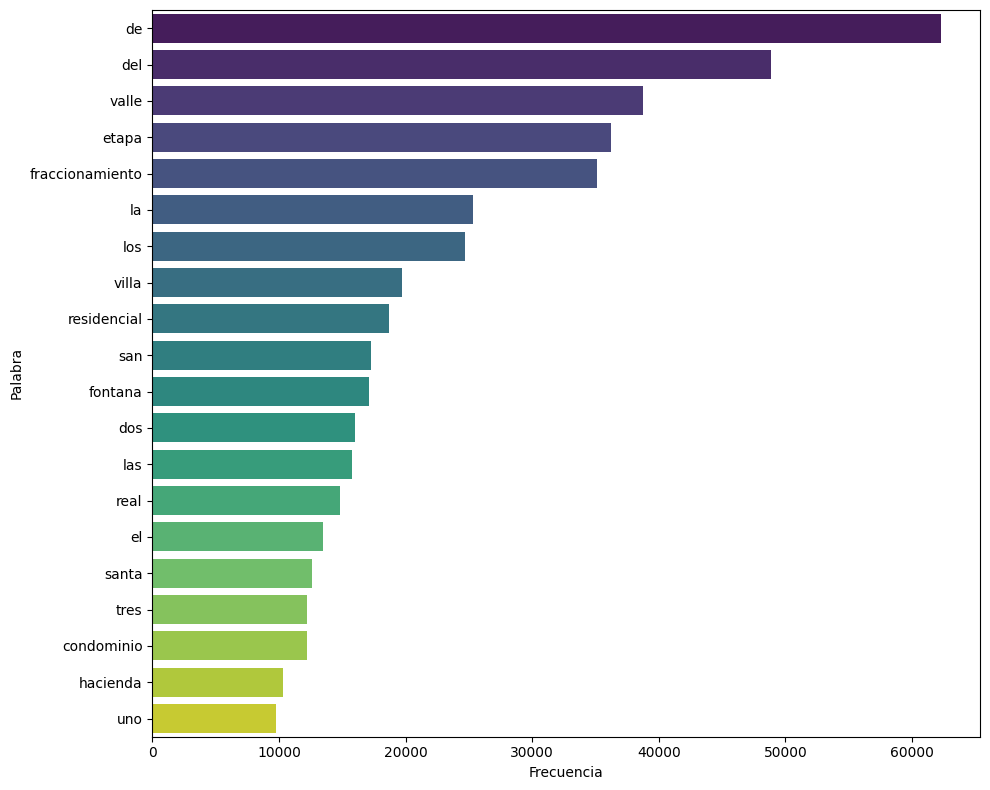

In [50]:
# Generar y mostrar frecuencia de stopwords
graficar_frecuencia_palabras(dic_palabras_comunes, 20)


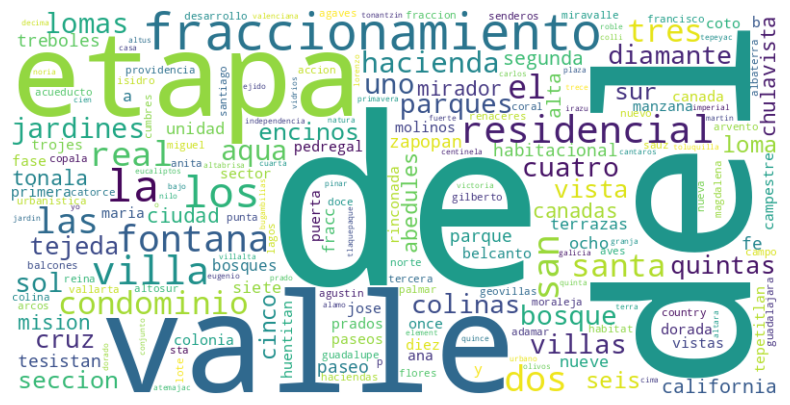

In [51]:
# Generar y mostrar la nube de palabras de stopwords
generar_nube_palabras(dic_palabras_comunes)


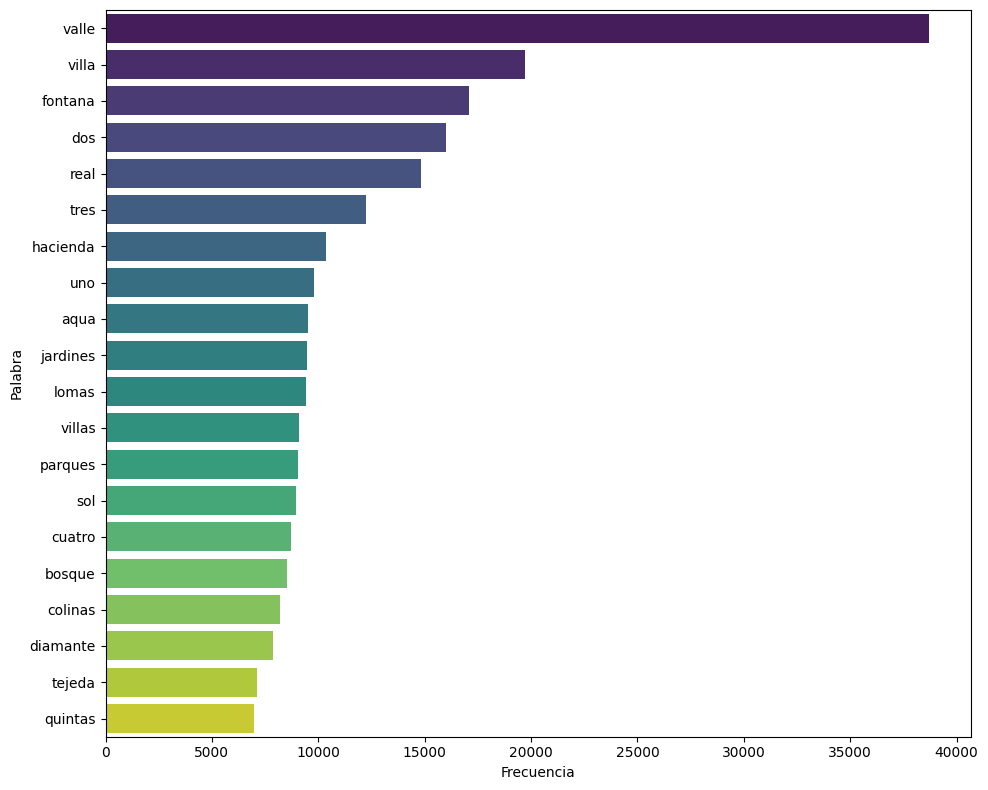

In [52]:
# Generar y mostrar frecuencia de palabras comunes del dic filtrado
graficar_frecuencia_palabras(dic_palabras_filtrado_SHF, 20)


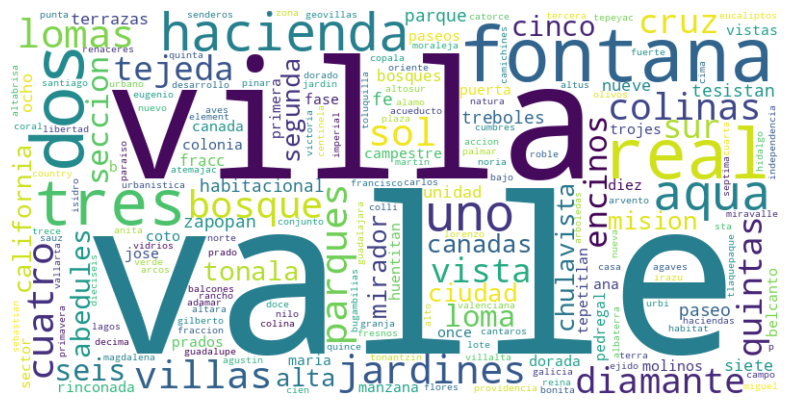

In [53]:
# Generar y mostrar la nube de palabras sin stopwords
generar_nube_palabras(dic_palabras_filtrado_SHF)

In [54]:
# Repetimos para SEPOMEX

# Obtener diccionario de palabras comunes
dic_palabras_comunes = obtener_diccionario_palabras_comunes(SEPOMEX, 'd_asenta_split')

# Gestionar stopwords especiales
stop_words_adicionales = {'fraccionamiento', 'condominio', 'residencial', 'san', 'santa', 'agua', 'etapa'}
stop_words_a_eliminar = {'somos', 'era', 'eras', 'uno'}
stop_words = gestionar_stopwords_especiales(stop_words_adicionales, stop_words_a_eliminar)

# # Filtrar diccionario de palabras comunes eliminando stopwords
dic_palabras_filtrado_SEPOMEX = {word: count for word, count in dic_palabras_comunes.items() if word.lower() not in stop_words}

# Agregamos al DF columna sin stopwords
agregar_columna_sin_stopwords(SEPOMEX, 'd_asenta_split', stop_words_adicionales, stop_words_a_eliminar)

# Agregamos otra columna para tener todo el procesamiento: sin stopwords y con stemming
token_stemming(SEPOMEX, 'd_asenta_split_sin_stopwords')

d_codigo                  d_asenta    d_tipo_asenta  \
0        44100        guadalajara centro          Colonia   
1        44110         vallarta poniente  Fraccionamiento   
2        44130            arcos vallarta          Colonia   
3        44130                     arcos  Fraccionamiento   
4        44140             obrera centro          Colonia   
...        ...                       ...              ...   
6067     49990  villa morelos el carrizo        Ranchería   
6068     49990              los platanos          Colonia   
6069     49994                    zipoco        Ranchería   
6070     49994               las parotas        Ranchería   
6071     49996      abasolo la otra casa        Ranchería   

                  D_mnpio d_estado     d_ciudad   d_CP  c_estado  c_oficina  \
0             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
1             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
2             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
3             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
4             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
...                   ...      ...          ...    ...       ...        ...   
6067  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6068  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6069  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6070  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6071  Santa María del Oro  Jalisco          NaN  49541        14      49541   

      c_CP  c_tipo_asenta  c_mnpio  id_asenta_cpcons  d_zona  c_cve_ciudad  \
0      NaN              9       39                 3  Urbano           3.0   
1      NaN             21       39                 5  Urbano           3.0   
2      NaN              9       39                 7  Urbano           3.0   
3      NaN             21       39               200  Urbano           3.0   
4      NaN              9       39                 8  Urbano           3.0   
...    ...            ...      ...               ...     ...           ...   
6067   NaN             29       56                 1   Rural           NaN   
6068   NaN              9       56              4873   Rural           NaN   
6069   NaN             29       56              4900   Rural           NaN   
6070   NaN             29       56              4906   Rural           NaN   
6071   NaN             29       56                 2   Rural           NaN   

               d_asenta_original                 d_asenta_split  \
0             Guadalajara Centro          [guadalajara, centro]   
1              Vallarta Poniente           [vallarta, poniente]   
2                 Arcos Vallarta              [arcos, vallarta]   
3                          Arcos                        [arcos]   
4                  Obrera Centro               [obrera, centro]   
...                          ...                            ...   
6067  Villa Morelos (El Carrizo)  [villa, morelos, el, carrizo]   
6068                Los Plátanos                [los, platanos]   
6069                      Zipoco                       [zipoco]   
6070                 Las Parotas                 [las, parotas]   
6071      Abasolo (La Otra Casa)      [abasolo, la, otra, casa]   

     d_asenta_split_sin_stopwords d_asenta_split_sin_stopwords_stemmed  
0              guadalajara centro                       guadalaj centr  
1               vallarta poniente                      vallart ponient  
2                  arcos vallarta                        arcos vallart  
3                           arcos                                arcos  
4                   obrera centro                          obrer centr  
...                           ...                                  ...  
6067        villa morelos carrizo                    vill morel carriz 

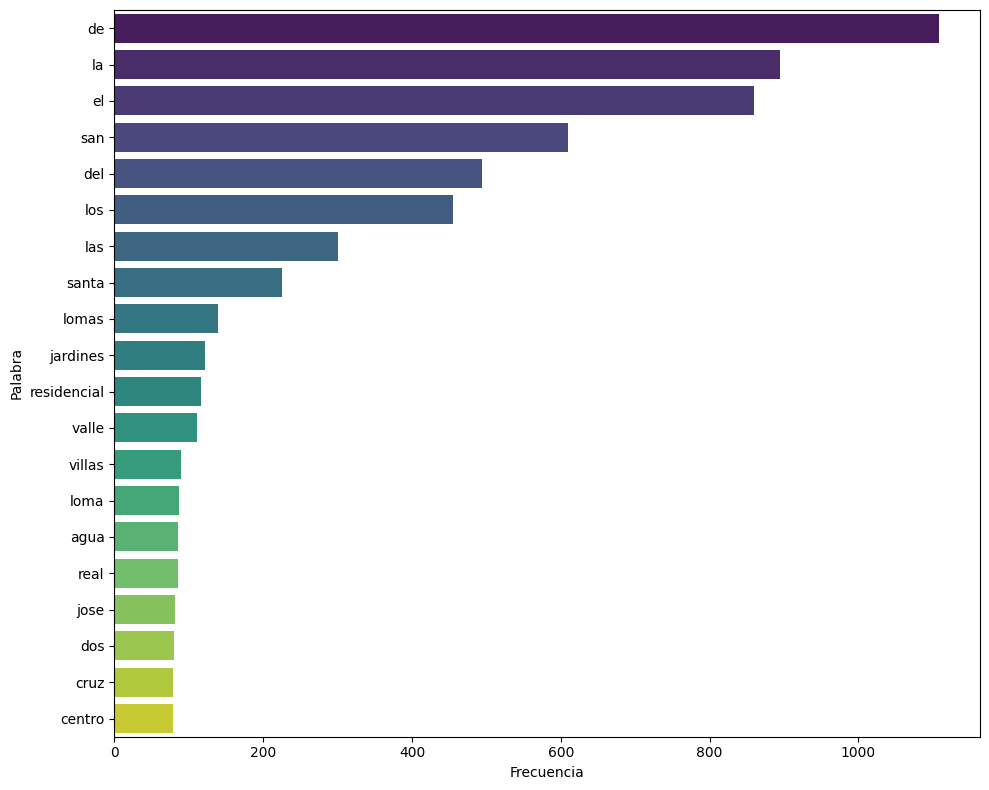

In [55]:
# Generar y mostrar frecuencia de stopwords
graficar_frecuencia_palabras(dic_palabras_comunes, 20)


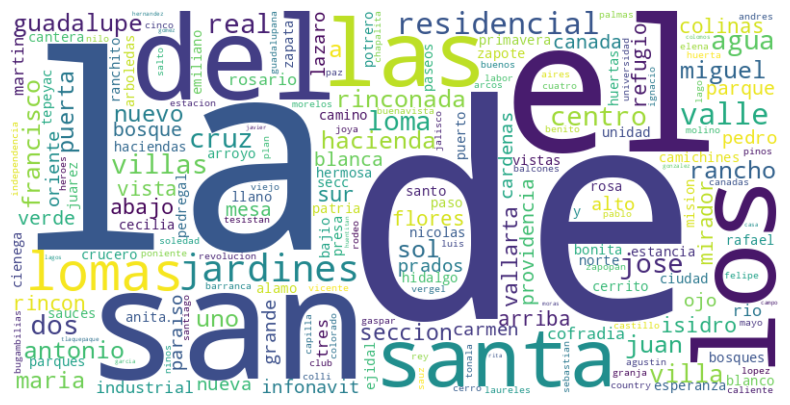

In [56]:
# Generar y mostrar la nube de palabras de stopwords
generar_nube_palabras(dic_palabras_comunes)


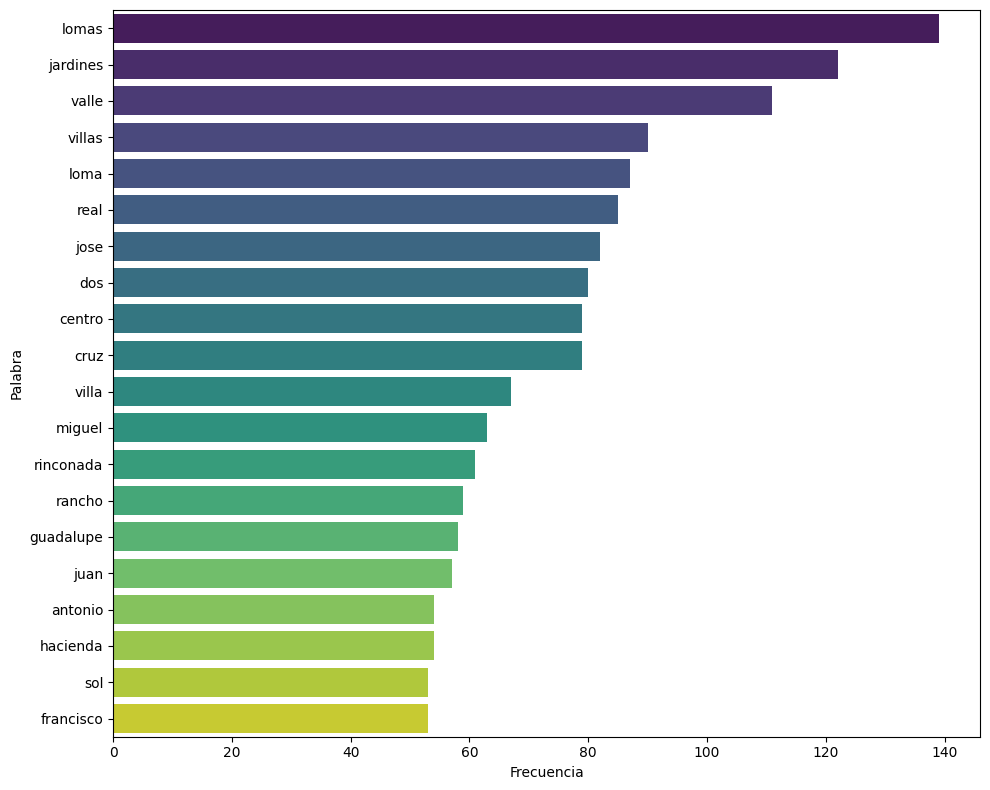

In [57]:
# Generar y mostrar frecuencia de palabras comunes del dic filtrado
graficar_frecuencia_palabras(dic_palabras_filtrado_SEPOMEX, 20)


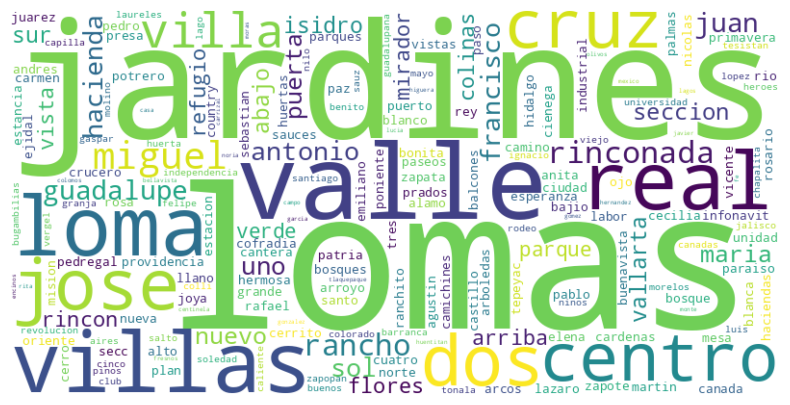

In [58]:
# Generar y mostrar la nube de palabras sin stopwords
generar_nube_palabras(dic_palabras_filtrado_SEPOMEX)

### Algunos insigths exploratorios

<ipython-input-59-355c5c66c17b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(SEPOMEX, x='d_codigo', y='d_zona', inner='box', palette='Dark2')


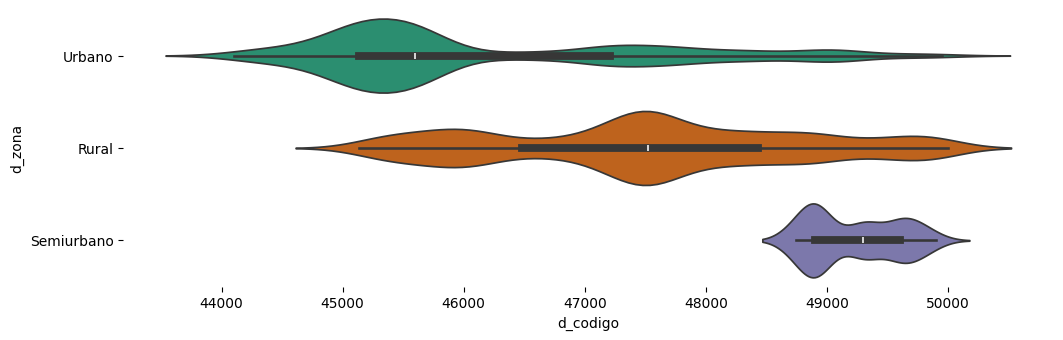

In [59]:
# Se observa la distribución de d_zona vs d_codigo
# Una gran parte de la distribución de CP se concentra por la zona
# Posiblemente las primeras colinias en registrar CP fueron Urbano,
# posteriormente rural y finalmente semi urbana considerando la númeración CP


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(SEPOMEX['d_zona'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(SEPOMEX, x='d_codigo', y='d_zona', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Codigo postal que no tengo en SEPOMEX y proporción de nombres de colonias del SHF presentes en SEPOMEX

In [60]:
# Calcula el conjunto de códigos postales únicos en cada DataFrame
SHF['zip_code'] = SHF['zip_code'].astype(str)
SEPOMEX['d_codigo'] = SEPOMEX['d_codigo'].astype(str)

In [ ]:
# Realizar un merge para identificar los registros de SHF que no están en SEPOMEX
merged_df = SHF.merge(SEPOMEX, how='left', left_on='zip_code', right_on='d_codigo', indicator=True)

# Filtrar los registros que están solo en SHF
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF) * 100

print(f"Porcentaje de CP del SHF no presentes en el SEPOMEX: {porcentaje_no_encontrados:.4f}%")

Colonias del SHF no presentes en SHF (Datos crudos)

In [ ]:
# Porcentaje de colonias en SEPOMEX, exactitud
# Realizar un merge para identificar los registros de SHF que no están en SEPOMEX
merged_df = SHF.merge(SEPOMEX, how='left', left_on='settlement_original', right_on='d_asenta_original', indicator=True)

# Filtrar los registros que están solo en SHF
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF) * 100

print(f"Porcentaje de colonias del SHF no presentes en el SEPOMEX (Sin preprocesar): {porcentaje_no_encontrados:.4f}%")

Colonias del SHF no presentes en SHF (Datos limpios sin stemming)

In [ ]:
# Porcentaje de colonias en SEPOMEX, exactitud
# Realizar un merge para identificar los registros de SHF que no están en SEPOMEX
merged_df = SHF.merge(SEPOMEX, how='left', left_on='settlement_split_sin_stopwords',
                      right_on='d_asenta_split_sin_stopwords', indicator=True)

# Filtrar los registros que están solo en SHF
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF) * 100

print(f"Porcentaje de colonias del SHF no presentes en el SEPOMEX (Sin stemming): {porcentaje_no_encontrados:.4f}%")

Colonias del SHF no presentes en SHF (Datos limpios con stemming)

In [ ]:
# Porcentaje de colonias en SEPOMEX, exactitud
# Realizar un merge para identificar los registros de SHF que no están en SEPOMEX
merged_df = SHF.merge(SEPOMEX, how='left',
                      left_on='settlement_split_sin_stopwords_stemmed',
                      right_on='d_asenta_split_sin_stopwords_stemmed', indicator=True)

# Filtrar los registros que están solo en SHF
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF) * 100

print(f"Porcentaje de colonias del SHF no presentes en el SEPOMEX (preprocesado y con stemming): {porcentaje_no_encontrados:.4f}%")

In [ ]:
len(SEPOMEX), 208/len(SHF)*100, len(SHF), len(SHF)*0.9738, len(SHF)*0.419482, len(SHF)*0.407073, len(SHF)*0.5667,

Conclusiones de preprocesamiento:

1. **Códigos Postales**: Hay 208 códigos postales del SHF que no están presentes en el catálogo SEPOMEX, lo que representa un 0.073% de los datos totales.

2. **Colonias**: Existen 278,503 colonias del SHF que no se encuentran en el SEPOMEX, lo que corresponde al 97.38% del total de 285,993 registros.

3. **Preprocesamiento de Datos**: Tras preprocesar los datos del SHF, los registros de colonias no presentes disminuyen a 119,968, representando el 41.95% del total. Esto incrementa la homologación exacta en más de un 55.43%.

4. **Stemming**: Al aplicar stemming a los datos del SHF, los registros de colonias no presentes se reducen a 116,420, lo que equivale al 40.71% del total. Esto significa que casi el 60% de los registros totales se pueden homologar de manera directa.

5. **Combinación de Técnicas**: Utilizando tanto el preprocesamiento como el stemming, los registros del SHF no encontrados en SEPOMEX disminuyen del 97.38% al 40.71%, lo que representa un aumento del 56.67% (162,072 registros) en la homologación exacta.


### Mismo análisis pero con valores únicos del SHF

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SHF_subset = SHF.drop_duplicates(subset=['settlement_original', 'zip_code'])

# Calcula el porcentaje
porcentaje_unicos = len(SHF_subset)/len(SHF) * 100

print(f"Porcentaje de colonias únicas del SHF: {porcentaje_unicos:.4f}%")

len(SHF_subset), len(SHF)

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SEPOMEX_subset = SEPOMEX.drop_duplicates(subset=['d_asenta_original', 'd_CP'])

# Calcula el porcentaje
porcentaje_unicos = len(SEPOMEX_subset)/len(SEPOMEX) * 100

print(f"Porcentaje de colonias únicas del SEPOMEX: {porcentaje_unicos:.4f}%")

len(SEPOMEX_subset), len(SEPOMEX)

In [ ]:
# Realizar un merge para identificar los registros de SHF_subset que no están en SEPOMEX
merged_df = SHF_subset.merge(SEPOMEX_subset, how='left', left_on='zip_code', right_on='d_codigo', indicator=True)

# Filtrar los registros que están solo en SHF_subset
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF_subset no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF_subset) * 100

print(f"Porcentaje de CP del SHF_subset no presentes en el SEPOMEX: {porcentaje_no_encontrados:.4f}%")

In [ ]:
# Porcentaje de colonias en SEPOMEX, exactitud
# Realizar un merge para identificar los registros de SHF_subset que no están en SEPOMEX
merged_df = SHF_subset.merge(SEPOMEX_subset, how='left', left_on='settlement_original', right_on='d_asenta_original', indicator=True)

# Filtrar los registros que están solo en SHF_subset
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF_subset no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF_subset) * 100

print(f"Porcentaje de colonias del SHF_subset no presentes en el SEPOMEX (Sin preprocesar): {porcentaje_no_encontrados:.4f}%")

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SHF_subset = SHF.drop_duplicates(subset=['settlement_split_sin_stopwords', 'zip_code'])

# Calcula el porcentaje
porcentaje_unicos = len(SHF_subset)/len(SHF) * 100

print(f"Porcentaje de colonias únicas del SHF: {porcentaje_unicos:.4f}%")

len(SHF_subset), len(SHF)

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SEPOMEX_subset = SEPOMEX.drop_duplicates(subset=['d_asenta_split_sin_stopwords', 'd_CP'])

# Calcula el porcentaje
porcentaje_unicos = len(SEPOMEX_subset)/len(SEPOMEX) * 100

print(f"Porcentaje de colonias únicas del SEPOMEX: {porcentaje_unicos:.4f}%")

len(SEPOMEX_subset), len(SEPOMEX)

In [ ]:
# Porcentaje de colonias en SEPOMEX, exactitud
# Realizar un merge para identificar los registros de SHF_subset que no están en SEPOMEX
merged_df = SHF_subset.merge(SEPOMEX_subset, how='left', left_on='settlement_split_sin_stopwords',
                      right_on='d_asenta_split_sin_stopwords', indicator=True)

# Filtrar los registros que están solo en SHF_subset
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF_subset no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF_subset) * 100

print(f"Porcentaje de colonias del SHF_subset no presentes en el SEPOMEX (Sin stemming): {porcentaje_no_encontrados:.4f}%")

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SHF_subset = SHF.drop_duplicates(subset=['settlement_split_sin_stopwords_stemmed', 'zip_code'])

# Calcula el porcentaje
porcentaje_unicos = len(SHF_subset)/len(SHF) * 100

print(f"Porcentaje de colonias únicas del SHF: {porcentaje_unicos:.4f}%")

len(SHF_subset), len(SHF)

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SEPOMEX_subset = SEPOMEX.drop_duplicates(subset=['d_asenta_split_sin_stopwords_stemmed', 'd_CP'])

# Calcula el porcentaje
porcentaje_unicos = len(SEPOMEX_subset)/len(SEPOMEX) * 100

print(f"Porcentaje de colonias únicas del SEPOMEX: {porcentaje_unicos:.4f}%")

len(SEPOMEX_subset), len(SEPOMEX)

In [ ]:
# Porcentaje de colonias en SEPOMEX, exactitud
# Realizar un merge para identificar los registros de SHF_subset que no están en SEPOMEX
merged_df = SHF_subset.merge(SEPOMEX_subset, how='left',
                      left_on='settlement_split_sin_stopwords_stemmed',
                      right_on='d_asenta_split_sin_stopwords_stemmed', indicator=True)

# Filtrar los registros que están solo en SHF_subset
not_in_sepomex = merged_df[merged_df['_merge'] == 'left_only']

# Obtener el conteo de estos registros
conteo_no_encontrados = len(not_in_sepomex)

print(f"Conteo de registros del SHF_subset no presentes en el SEPOMEX: {conteo_no_encontrados}")

# Calcula el porcentaje
porcentaje_no_encontrados = conteo_no_encontrados / len(SHF_subset) * 100

print(f"Porcentaje de colonias del SHF_subset no presentes en el SEPOMEX (preprocesado y con stemming): {porcentaje_no_encontrados:.4f}%")

In [ ]:
len(SHF_subset), len(SHF_subset)*0.2218

Conclusiones de preprocesamiento para registros únicos del SHF:

1. **Códigos Postales**: Hay 15 códigos postales del SHF_subset que no están presentes en el catálogo SEPOMEX, lo que representa un 0.055% de los datos únicos totales.

2. **Colonias**: Existen 33,884 colonias del SHF_subset que no se encuentran de manera exacta en el SEPOMEX, lo que corresponde al 97.019% del total de 34,925 registros únicos.

3. **Preprocesamiento de Datos**: Tras preprocesar los datos del SHF_subset, los registros de colonias no presentes disminuyen a 17,810, representando el 50.99% del total inicial de 34,925. Esto incrementa la homologación exacta en más de un 46.029%

4. **Stemming**: Al aplicar stemming a los datos del SHF_subset, los registros de colonias no presentes se reducen a 17,260, lo que equivale al 49.42% del total inicial de 34,925. Esto significa que casi el 50% de los registros únicos totales se pueden homologar de manera directa.

5. **Combinación de Técnicas**: Utilizando tanto el preprocesamiento como el stemming, los registros del SHF_subset no encontrados en SEPOMEX disminuyen del 97.02\% (33,884) al 47.6\%(16,624), lo que representa un aumento del 22.18\% en la homologación exacta.


En conclusión general tanto para datos completos del SHF como manejando solo sus valores únicos en colonia y zipcode, se aumenta alrededor de 10% de homologación directa tan solo usando un preprocesamiento de los datos.

In [ ]:
SHF.to_csv('SHF_procesado.csv', index=False)
SEPOMEX.to_csv('SEPOMEX_procesado.csv', index=False)

In [ ]:
# Cargar el DataFrame desde un archivo

# SHF = pd.read_csv('SHF_procesado.csv')
# SEPOMEX = pd.read_csv('SEPOMEX_procesado.csv')

# SHF = pd.read_excel('SHF_procesado.xlsx')

## Cálculo de distancias entre strings

Incluye el manejo y funciones para obener medidas de disimilaridad entre los strings de colonias. Se realizan para las siguientes distancias:

1. Levenshtein distance
2. Levenshtein generalizada
3. Fuzzy-ratio
4. Jaccard distance
5. Cosine distance

### Selección de muestra para pruebas

Se obtiene un conjunto de entrenamiento para la implementación de las diferentes distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code', que correponde a 27,083 registros (9.46% del total). SEPOMEX se queda con todos los registros (6072).

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SHF_subset = SHF.drop_duplicates(subset=['settlement_original', 'zip_code'])

# Calcula el porcentaje
porcentaje_unicos = len(SHF_subset)/len(SHF) * 100

print(f"Porcentaje de colonias únicas del SHF: {porcentaje_unicos:.4f}%")

len(SHF_subset), len(SHF)

In [ ]:
# Función para calcular el tamaño de muestra representativa
def calcular_tamano_muestra(N, Z=1.96, P=0.5, E=0.05):
    n = (Z**2 * P * (1 - P)) / E**2
    n_ajustado = n / (1 + (n - 1) / N)
    return int(np.ceil(n_ajustado))

# Tamaño de la población
N = len(SHF_subset)

# Calcular el tamaño de la muestra representativa
tamano_muestra = calcular_tamano_muestra(N)

# Seleccionar una muestra aleatoria
muestra_representativa = SHF_subset.sample(n=tamano_muestra, random_state=42)

# Guardar la muestra representativa en un nuevo archivo CSV
ruta_muestra = 'muestra_representativa.csv'
muestra_representativa.to_csv(ruta_muestra, index=False)

print(f"Tamaño de la población: {N}")
print(f"Tamaño de la muestra representativa: {tamano_muestra}")

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SHF_subset = SHF.drop_duplicates(subset=['settlement', 'zip_code'])

# Calcula el porcentaje
porcentaje_unicos = len(SHF_subset)/len(SHF) * 100

print(f"Porcentaje de colonias únicas del SHF: {porcentaje_unicos:.4f}%")

len(SHF_subset), len(SHF)

In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SEPOMEX_subset = SEPOMEX.drop_duplicates(subset=['d_asenta'])#, 'd_CP'])

# Calcula el porcentaje
porcentaje_unicos = len(SEPOMEX_subset)/len(SEPOMEX) * 100

print(f"Porcentaje de colonias únicas del SEPOMEX: {porcentaje_unicos:.4f}%")

len(SEPOMEX_subset), len(SEPOMEX)

In [ ]:
# from sklearn.model_selection import train_test_split

# Divide el SHF_muestra en conjuntos de entrenamiento (80%) y prueba/validación (20%)
SHF_train, SHF_test_valid = train_test_split(SHF_subset, test_size=0.998, random_state=42)

# Divide el conjunto de prueba/validación en prueba (50% de 20%) y validación (50% de 20%)
SHF_test, SHF_valid = train_test_split(SHF_test_valid, test_size=0.50, random_state=42)

# Mostrar el tamaño de los conjuntos para verificación
print(f"Tamaño del conjunto original: {len(SHF_subset)}")
print(f"Tamaño del conjunto de entrenamiento: {len(SHF_train)}")
print(f"Tamaño del conjunto de prueba: {len(SHF_test)}")
print(f"Tamaño del conjunto de validación: {len(SHF_valid)}")


In [ ]:
SHF_train.to_csv('SHF_train.csv', index=False)

### 1. Leveshtein distance

In [ ]:
# Definimos una función para calcular la distancia de Levenshtein usando la librería python-Levenshtein
def levenshtein1(str1, str2):
    return Levenshtein.distance(str1, str2)

In [ ]:
# Ejemplo de uso
string1 = 'urbano mezquitan country'
string2 = 'mezquitan country'

levenshtein1(string1, string2)

7

In [ ]:
# Función para calcular la distancia de Levenshtein usando la librería difflib
def levenshtein2(s1, s2):
    return 1-SequenceMatcher(None, s1, s2).ratio()

In [ ]:
# Ejemplo de uso
string1 = 'urbano mezquitan country'
string2 = 'mezquitan country'

levenshtein2(string1, string2)

0.1707317073170732

In [ ]:
# Función que proporciona la matriz de distancias de similaridad/disimilaridad entre string, desde dataframes

def calcular_matriz_distancias(df1, col1, df2, col2, funcion_distancia):
    """
    Calcula la matriz de distancias entre dos columnas específicas de dos DataFrames usando una métrica de distancia dada.

    Parámetros:
    df1 (DataFrame): Primer DataFrame.
    col1 (str): Nombre de la columna en el primer DataFrame.
    df2 (DataFrame): Segundo DataFrame.
    col2 (str): Nombre de la columna en el segundo DataFrame.
    funcion_distancia (función): Función para calcular la distancia entre dos cadenas de texto.

    Retorna:
    DataFrame: DataFrame con las distancias calculadas y las columnas originales.
    """
    resultados_distancia = []

    # Iteramos sobre cada fila de df1 y todas las filas de df2
    for _, row_df1 in df1.iterrows():
        for _, row_df2 in df2.iterrows():
            # Calculamos la distancia entre las dos columnas especificadas
            distancia = funcion_distancia(row_df1[col1], row_df2[col2])

            # Guardamos los resultados en la lista
            resultados_distancia.append({
                'index_df1': row_df1.name, # Es necesario guardar los indices porque df2 ya los indica
                'index_df2': row_df2.name,
                f'{col1}': row_df1[col1],
                f'{col2}': row_df2[col2],
                'distancia': distancia
            })

    # Convertimos la lista de resultados a DataFrame
    matriz_distancia = pd.DataFrame(resultados_distancia)

    return matriz_distancia

In [ ]:
distance_1 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', levenshtein1)
distance_2 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', levenshtein1)
distance_3 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', levenshtein1)
distance_4 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', levenshtein1)
distance_5 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', levenshtein1)
distance_6 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', levenshtein1)

### Levenshtein paralelizada

In [ ]:
# Calcular la distancia de Levenshtein lista para parelizar usando la librería python-Levenshtein

# Función para calcular la distancia de Levenshtein
def levenshtein1_fast(args):
    s1, s2 = args
    return Levenshtein.distance(s1, s2)

In [ ]:
# Calcular la distancia de Levenshtein lista para parelizar usando la librería difflib

# Función para calcular la distancia de Levenshtein
def levenshtein2_fast(args):
    s1, s2 = args
    return SequenceMatcher(None, s1, s2).ratio()

In [ ]:
# Función que proporciona la matriz de distancias de similaridad/disimilaridad entre string, desde dataframes

def calcular_matriz_distancias_paralelo(df1, col1, df2, col2, funcion_distancia):
    """
    Calcula la matriz de distancias entre dos columnas específicas de dos DataFrames usando una métrica de distancia dada de forma paralela.

    Parámetros:
    df1 (DataFrame): Primer DataFrame.
    col1 (str): Nombre de la columna en el primer DataFrame.
    df2 (DataFrame): Segundo DataFrame.
    col2 (str): Nombre de la columna en el segundo DataFrame.
    funcion_distancia (función): Función para calcular la distancia entre dos cadenas de texto.

    Retorna:
    DataFrame: DataFrame con las distancias calculadas y las columnas originales.
    """
    # Preparar los datos para el cálculo paralelo
    pairs = [(row_df1[col1], row_df2[col2]) for _, row_df1 in df1.iterrows() for _, row_df2 in df2.iterrows()]

    # Usar multiprocessing para paralelizar el cálculo
    with Pool(cpu_count()) as pool:
        distancias = pool.starmap(funcion_distancia, pairs)

    # Formatear los resultados en un DataFrame
    resultados_distancia = []
    idx = 0
    for _, row_df1 in df1.iterrows():
        for _, row_df2 in df2.iterrows():
            resultados_distancia.append({
                'index_df1': row_df1.name, # Es necesario guardar los indices porque df2 ya los indica
                'index_df2': row_df2.name,
                f'{col1}': row_df1[col1],
                f'{col2}': row_df2[col2],
                'distancia': distancias[idx]
            })
            idx += 1

    matriz_distancia = pd.DataFrame(resultados_distancia)
    return matriz_distancia

### 2. Levenshtein generalizada

Ejercicio cambiando los pesos de las operaciones

In [ ]:
Levenshtein.distance("lewenstein", "levenshteinyrysibddkkskkaal", weights=(2,1,2)) # (insertion, deletion, substitution)

36

In [ ]:
Levenshtein.distance("levenshteinyrysibddkkskkaal", "lewenstein", weights=(2,1,2))

19

In [ ]:
# Definimos una función para calcular la distancia de Levenshtein usando la librería python-Levenshtein
# Esta función asigna mayor peso a inserción
def levenshtein1_insertion(str1, str2):
    return Levenshtein.distance(str1, str2, weights=(2,1,1))

In [ ]:
# Ejemplo de uso
string1 = 'urbano mezquitan country'
string2 = 'mezquitan country'

levenshtein1_insertion(string1, string2)

7

In [ ]:
distance_7 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', levenshtein1_insertion)
distance_8 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', levenshtein1_insertion)
distance_9 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', levenshtein1_insertion)


In [ ]:
# Definimos una función para calcular la distancia de Levenshtein usando la librería python-Levenshtein
# Esta función asigna mayor peso a eliminación
def levenshtein1_delation(str1, str2):
    return Levenshtein.distance(str1, str2, weights=(1,2,1))

In [ ]:
# Ejemplo de uso
string1 = 'urbano mezquitan country'
string2 = 'mezquitan country'

levenshtein1_delation(string1, string2)

14

In [ ]:
distance_10 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', levenshtein1_delation)
distance_11 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', levenshtein1_delation)
distance_12 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', levenshtein1_delation)


In [ ]:
# Definimos una función para calcular la distancia de Levenshtein usando la librería python-Levenshtein
# Esta función asigna mayor peso a sustitución
def levenshtein1_sustitution(str1, str2):
    return Levenshtein.distance(str1, str2, weights=(1,1,2))

In [ ]:
# Ejemplo de uso
string1 = 'urbano mezquitan country'
string2 = 'mezquitan country'

levenshtein1_sustitution(string1, string2)

7

In [ ]:
distance_13 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', levenshtein1_sustitution)
distance_14 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', levenshtein1_sustitution)
distance_15 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', levenshtein1_sustitution)

Quedaría validar si alguna combinación ofrece mejores resultados y cuáles serían los pesos adecuados.

### 3. Fuzzy-ratio

Fuzzy ratio, proporciona un valor de similaridad entre dos string, por ejemplo entre Roma y roma el ratio es del 75 porque le hace falta un 25% de cambio para llegar a la otra palabra.

In [ ]:
import Levenshtein

In [ ]:
# Definir una función para calcular la Fuzzy ratio, da una proporción
# import difflib
def fuzzy_ratio(str1, str2):
    return 1-fuzz.ratio(str1, str2)/100

In [ ]:
# Ejemplo de uso
string1 = 'Kurtis K D'
string2 = 'Kurtis K D Pykes'

fuzzy_ratio(string1, string2)

0.22999999999999998

In [ ]:
distance_16 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', fuzzy_ratio)
distance_17 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', fuzzy_ratio)
distance_18 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', fuzzy_ratio)

In [ ]:
# Definir una función para calcular la Fuzzy partial ratio, da una proporción
def fuzzy_partial_ratio(str1, str2):
    return 1-fuzz.partial_ratio(str1, str2)/100

In [ ]:
# Ejemplo de uso
string1 = 'Kurtis K D'
string2 = 'Kurtis K D Pykes'

fuzzy_partial_ratio(string1, string2)

0.0

In [ ]:
distance_19 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', fuzzy_partial_ratio)
distance_20 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', fuzzy_partial_ratio)
distance_21 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', fuzzy_partial_ratio)

In [ ]:
# Definir una función para calcular la Fuzzy partial ratio, da una proporción
def fuzzy_sort_ratio(str1, str2):
    return 1-fuzz.token_sort_ratio(str1, str2)/100

In [ ]:
# Ejemplo de uso
string1 = 'Kurtis Pykes K D'
string2 = 'Kurtis K D Pykes'

fuzzy_sort_ratio(string1, string2)

0.0

In [ ]:
distance_22 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', fuzzy_sort_ratio)
distance_23 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', fuzzy_sort_ratio)
distance_24 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', fuzzy_sort_ratio)

In [ ]:
# Definir una función para calcular la Fuzzy partial ratio, da una proporción
def fuzzy_set_ratio(str1, str2):
    return 1-fuzz.token_set_ratio(str1, str2)/100

In [ ]:
# Ejemplo de uso
string1 = 'Kurtis Pykes'
string2 = 'Kurtis K D Pykes'

fuzzy_set_ratio(string1, string2)

0.0

In [ ]:
distance_25 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', fuzzy_set_ratio)
distance_26 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', fuzzy_set_ratio)
distance_27 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', fuzzy_set_ratio)

### 4. Jaccard distance

calcular_distancia_jaccard convierte las cadenas en conjuntos de caracteres únicos y calcula el índice de Jaccard como la intersección dividida por la unión de los conjuntos. La distancia de Jaccard es 1 menos el índice de Jaccard.

In [ ]:
def jaccard(str1, str2):
    # Convertir las cadenas a conjuntos de caracteres únicos
    set1, set2 = set(str1), set(str2)
    # Calcular la intersección y la unión
    interseccion = len(set1 & set2)
    union = len(set1 | set2)
    # Calcular el índice de Jaccard
    jaccard_index = interseccion / union if union != 0 else 0
    # La distancia de Jaccard es 1 menos el índice de Jaccard
    return 1 - jaccard_index

In [ ]:
# Ejemplo de uso
string1 = 'Kurtis K D Pykes'
string2 = 'Kurtis KD'

jaccard(string1, string2)

0.33333333333333337

In [ ]:
distance_28 = calcular_matriz_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', jaccard)
distance_29 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', jaccard)
distance_30 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed', jaccard)

### 5. Cosine distance

calcular_distancia_coseno utiliza un vectorizador TF-IDF para convertir las cadenas en vectores TF-IDF y luego calcula la distancia del coseno entre estos vectores.

In [ ]:
# Definimos la función que calcula la cosine distance usando cosine_distance de scikit-learn y primero obtiene los vectores TF-IDF

def coseno(str1, str2):
    # Crear un vectorizador TF-IDF
    vectorizer = TfidfVectorizer().fit([str1, str2])
    # Transformar las cadenas en vectores TF-IDF
    tfidf_matrix = vectorizer.transform([str1, str2])
    # Calcular la distancia del coseno
    return cosine_distances(tfidf_matrix)[0, 1] # Realiza el cálculo vectorizado es más rápido de usar cosine de SciPy

In [ ]:
# Ejemplo de uso
string1 = 'Kurtis K D Pykes'
string2 = 'Kurtis KD'

coseno(string1, string2)

0.6639030727237425

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_distances

# Crear el vectorizador TF-IDF y ajustarlo con los datos combinados de SHF y SEPOMEX
vectorizer = TfidfVectorizer().fit(SHF_train['settlement'].tolist() + SEPOMEX_subset['d_asenta'].tolist())

# Transformar las columnas de texto en matrices TF-IDF
tfidf_SHF = vectorizer.transform(SHF_train['settlement'])
tfidf_SEPOMEX = vectorizer.transform(SEPOMEX_subset['d_asenta'])

# Convertir los DataFrames a listas para obtener los índices
SHF_indices = SHF_train.index.tolist()
SEPOMEX_indices = SEPOMEX_subset.index.tolist()


In [ ]:
# Función para calcular la matriz de distancias coseno
def calcular_matriz_distancias_coseno(tfidf_SHF, tfidf_SEPOMEX, SHF_indices, SEPOMEX_indices):
    distancias = cosine_distances(tfidf_SHF, tfidf_SEPOMEX)

    resultados_distancia = []
    for i, idx_SHF in enumerate(SHF_indices):
        for j, idx_SEPOMEX in enumerate(SEPOMEX_indices):
            resultados_distancia.append({
                'index_df1': idx_SHF,
                'index_df2': idx_SEPOMEX,
                'settlement': SHF_train.at[idx_SHF, 'settlement'],
                'd_asenta': SEPOMEX_subset.at[idx_SEPOMEX, 'd_asenta'],
                'distancia': distancias[i, j]
            })

    matriz_distancia = pd.DataFrame(resultados_distancia)
    return matriz_distancia


In [ ]:
# Calcular la matriz de distancias
distance_31 = calcular_matriz_distancias_coseno(tfidf_SHF, tfidf_SEPOMEX, SHF_indices, SEPOMEX_indices)

In [ ]:
# Crear el vectorizador TF-IDF y ajustarlo con los datos combinados de SHF y SEPOMEX
vectorizer = TfidfVectorizer().fit(SHF_train['settlement_split_sin_stopwords'].tolist() + SEPOMEX_subset['d_asenta_split_sin_stopwords'].tolist())

# Transformar las columnas de texto en matrices TF-IDF
tfidf_SHF = vectorizer.transform(SHF_train['settlement_split_sin_stopwords'])
tfidf_SEPOMEX = vectorizer.transform(SEPOMEX_subset['d_asenta_split_sin_stopwords'])

In [ ]:
# Función para calcular la matriz de distancias coseno
def calcular_matriz_distancias_coseno(tfidf_SHF, tfidf_SEPOMEX, SHF_indices, SEPOMEX_indices):
    distancias = cosine_distances(tfidf_SHF, tfidf_SEPOMEX)

    resultados_distancia = []
    for i, idx_SHF in enumerate(SHF_indices):
        for j, idx_SEPOMEX in enumerate(SEPOMEX_indices):
            resultados_distancia.append({
                'index_df1': idx_SHF,
                'index_df2': idx_SEPOMEX,
                'settlement_split_sin_stopwords': SHF_train.at[idx_SHF, 'settlement'],
                'd_asenta_split_sin_stopwords': SEPOMEX_subset.at[idx_SEPOMEX, 'd_asenta'],
                'distancia': distancias[i, j]
            })

    matriz_distancia = pd.DataFrame(resultados_distancia)
    return matriz_distancia

In [ ]:
# Calcular la matriz de distancias
distance_32 = calcular_matriz_distancias_coseno(tfidf_SHF, tfidf_SEPOMEX, SHF_indices, SEPOMEX_indices)

In [ ]:
# Crear el vectorizador TF-IDF y ajustarlo con los datos combinados de SHF y SEPOMEX
vectorizer = TfidfVectorizer().fit(SHF_train['settlement_split_sin_stopwords_stemmed'].tolist() + SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed'].tolist())

# Transformar las columnas de texto en matrices TF-IDF
tfidf_SHF = vectorizer.transform(SHF_train['settlement_split_sin_stopwords_stemmed'])
tfidf_SEPOMEX = vectorizer.transform(SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed'])

In [ ]:
# Función para calcular la matriz de distancias coseno
def calcular_matriz_distancias_coseno(tfidf_SHF, tfidf_SEPOMEX, SHF_indices, SEPOMEX_indices):
    distancias = cosine_distances(tfidf_SHF, tfidf_SEPOMEX)

    resultados_distancia = []
    for i, idx_SHF in enumerate(SHF_indices):
        for j, idx_SEPOMEX in enumerate(SEPOMEX_indices):
            resultados_distancia.append({
                'index_df1': idx_SHF,
                'index_df2': idx_SEPOMEX,
                'settlement_split_sin_stopwords_stemmed': SHF_train.at[idx_SHF, 'settlement'],
                'd_asenta_split_sin_stopwords_stemmed': SEPOMEX_subset.at[idx_SEPOMEX, 'd_asenta'],
                'distancia': distancias[i, j]
            })

    matriz_distancia = pd.DataFrame(resultados_distancia)
    return matriz_distancia

In [ ]:
# Calcular la matriz de distancias
distance_33 = calcular_matriz_distancias_coseno(tfidf_SHF, tfidf_SEPOMEX, SHF_indices, SEPOMEX_indices)

## Generación de lista de las 5 colonias más cercanas

In [ ]:
# Función que Obtiene la distancias mínimas entre las columnas especificadas de dos DataFrames
# y asigna el resultado a una nueva columna en el DF1 (SHF)

def obtener_top5_distancias(df1, col1_df1, df2, col1_df2, matriz_distancias):
    """
    Obtiene la distancias mínimas entre las columnas especificadas de dos DataFrames
    y asigna el resultado a una nueva columna en los DataFrames originales.

    Parámetros:
    df1 (DataFrame): Primer DataFrame.
    df2 (DataFrame): Segundo DataFrame.
    matriz_distancias (DataFrame): DataFrame con la matriz de distancias.
    col1_df1 (str): Nombre de la columna en el primer DataFrame.
    col1_df2 (str): Nombre de la columna en el segundo DataFrame.

    Retorna:
    df1 (DataFrame): Primer DataFrame con una nueva columna con el top 5 de distancias mínimas.
    df2 (DataFrame): Segundo DataFrame con una nueva columna con el top 5 de distancias mínimas.
    """
    # from collections import defaultdict

    # Diccionario para almacenar los top 5 de distancias mínimas
    top5_dict = defaultdict(list)

    # Agrupar la matriz de distancias por la columna del primer DataFrame
    for name, group in matriz_distancias.groupby(col1_df1):
        # Ordenar por distancia y seleccionar las 5 menores
        top5 = group.nsmallest(5, 'distancia')

        # Almacenar en el diccionario
        top5_dict[name] = {row[col1_df2]: row['distancia'] for _, row in top5.iterrows()}

    # Asignar el top 5 al DataFrame original usando loc
    df1.loc[:, f'top_{col1_df1}'] = df1[col1_df1].map(top5_dict)


    return df1, df2

In [ ]:
# Ejemplo de uso Levenstein 1

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top5_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', distance_1)

df1_result[['settlement', 'top_settlement']]

settlement  \
rownames                                                      
1457739   fracc residencial las villas condominio real d...   
1241193                                   aurea residencial   
1040098                             colonia sector libertad   
1497931   fraccionamiento valle de cincuenta sol etapa d...   
1371246                                  senderosdesantiago   
1512418                accion ubanistica parque de las aves   
1269461                                   lomas san agustin   
1022118                                coordenada lafayette   
1336099         residencial san pedro colonia rancho blanco   
1306791                 fresnos dos etapa cinco sub etapa e   
1486871   valle de los molinos dos etapa tres condominio...   
1459233                unidad habitacional arcos de zapopan   
1390524                   fraccionamiento hacienda del real   
1266710           lomas de san agustin cuatro segunda etapa   
1225849                     chulavista doce o doceava etapa   
1438208                     condominio rinconada del hipico   
1347275   desarrollo geovillas los olivos condominio brezos   
1463496   colonia desarrollo habitacional y unifamiliar ...   
1042534          san miguel de huentitan el alto dos a secc   
1228327                 fracc hacienda santa fe sexta etapa   
1364127   parques san martin de las flores etapa seis y ...   
1383606   mirador de los conejos colonia san jose condom...   
1282686               desarrollo geovillas la arbolada plus   
1520644    fraccionamiento el campestre condominio mascardi   
1035083                                   fracc verde valle   
1038596                                           la huerta   
1036838                   italia providencia sector hidalgo   
1233516   valle de las flores condominio valle de las az...   
1338965   exejido san martin de las flores lomas del tap...   
1525252         residencial del bosque condominio el bosque   
1500860   fraccionamiento accion urbanistica al viento r...   
1347724                                            la bella   
1363232                                           tateposco   
1254326   fraccionamiento valle de los encinos tres etap...   
1262482                                  las trojes paq uno   
1044975   fraccionamiento villas del nilo condominio man...   
1286323                          geovillas la arbolada cien   
1375255                                  paseo de la canada   
1226022                   rancho los ocampo cond los ocampo   
1224343                      chulavista diecisieteava etapa   
1034164            fraccionamiento el alamo segunda seccion   
1038325          rinconada santa rita condominio santa rita   
1371428                                colonia la hortaliza   
1278798   fraccionamiento hacienda santa fe treinta y oc...   
1036720           providencia fraccionamiento lomas colomos   
1473666   fraccionamiento valle esmeralda condominio val...   
1456260                                          zotogrande   
1500534               los molinos cinco cinco primera etapa   
1044935   villas del nilo del sector reforma condominio ...   
1254676                        fraccionamiento los abedules   
1333511                                           silos dos   
1333781   paseo de los agaves etapa cinco cinco b condom...   
1442176   residencial plaza guadalupe dos a seccion cond...   

                                             top_settlement  
rownames                                                     
1457739   {'residencial camichines condomio del sol': 29...  
1241193   {'aurea residencial': 0, 'foret residencial': ...  
1040098   {'colonia no nueve': 12, 'colonia del sur': 12...  
1497931   {'san miguel de huentitan el alto uno a secc':...  
1371246   {'senderos de santiago': 2, 'senderos del lago...  
1512418   {'parque de las aves': 18, 'san gaspar de las ...  
1269461   {'lomas de san agustin': 3, 'lomas santa rita'...  
1022118   {'lafayette': 1

In [ ]:
# Ejemplo de uso Levenstein 2

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top5_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX, 'settlement_split_sin_stopwords', distance_2)

# df1_result[['settlement', 'top_settlement']]

In [ ]:
# Ejemplo de uso usando Jaccard

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result_jaccard, df2_result = obtener_top5_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX, 'settlement_split_sin_stopwords', distance_14)

df1_result_jaccard[['settlement','top_settlement']]

settlement  \
rownames                                                      
1457739   fracc residencial las villas condominio real d...   
1241193                                   aurea residencial   
1040098                             colonia sector libertad   
1497931   fraccionamiento valle de cincuenta sol etapa d...   
1371246                                  senderosdesantiago   
1512418                accion ubanistica parque de las aves   
1269461                                   lomas san agustin   
1022118                                coordenada lafayette   
1336099         residencial san pedro colonia rancho blanco   
1306791                 fresnos dos etapa cinco sub etapa e   
1486871   valle de los molinos dos etapa tres condominio...   
1459233                unidad habitacional arcos de zapopan   
1390524                   fraccionamiento hacienda del real   
1266710           lomas de san agustin cuatro segunda etapa   
1225849                     chulavista doce o doceava etapa   
1438208                     condominio rinconada del hipico   
1347275   desarrollo geovillas los olivos condominio brezos   
1463496   colonia desarrollo habitacional y unifamiliar ...   
1042534          san miguel de huentitan el alto dos a secc   
1228327                 fracc hacienda santa fe sexta etapa   
1364127   parques san martin de las flores etapa seis y ...   
1383606   mirador de los conejos colonia san jose condom...   
1282686               desarrollo geovillas la arbolada plus   
1520644    fraccionamiento el campestre condominio mascardi   
1035083                                   fracc verde valle   
1038596                                           la huerta   
1036838                   italia providencia sector hidalgo   
1233516   valle de las flores condominio valle de las az...   
1338965   exejido san martin de las flores lomas del tap...   
1525252         residencial del bosque condominio el bosque   
1500860   fraccionamiento accion urbanistica al viento r...   
1347724                                            la bella   
1363232                                           tateposco   
1254326   fraccionamiento valle de los encinos tres etap...   
1262482                                  las trojes paq uno   
1044975   fraccionamiento villas del nilo condominio man...   
1286323                          geovillas la arbolada cien   
1375255                                  paseo de la canada   
1226022                   rancho los ocampo cond los ocampo   
1224343                      chulavista diecisieteava etapa   
1034164            fraccionamiento el alamo segunda seccion   
1038325          rinconada santa rita condominio santa rita   
1371428                                colonia la hortaliza   
1278798   fraccionamiento hacienda santa fe treinta y oc...   
1036720           providencia fraccionamiento lomas colomos   
1473666   fraccionamiento valle esmeralda condominio val...   
1456260                                          zotogrande   
1500534               los molinos cinco cinco primera etapa   
1044935   villas del nilo del sector reforma condominio ...   
1254676                        fraccionamiento los abedules   
1333511                                           silos dos   
1333781   paseo de los agaves etapa cinco cinco b condom...   
1442176   residencial plaza guadalupe dos a seccion cond...   

                                             top_settlement  
rownames                                                     
1457739   {'residencial camichines condomio del sol': 29...  
1241193   {'aurea residencial': 0, 'foret residencial': ...  
1040098   {'colonia no nueve': 12, 'colonia del sur': 12...  
1497931   {'san miguel de huentitan el alto uno a secc':...  
1371246   {'senderos de santiago': 2, 'senderos del lago...  
1512418   {'parque de las aves': 18, 'san gaspar de las ...  
1269461   {'lomas de san agustin': 3, 'lomas santa rita'...  
1022118   {'lafayette': 1

In [ ]:
# Ejemplo de uso usando Cosine usando vectorización TF-IDF

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result_cosine, df2_result = obtener_top5_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', distance_16)

# df1_result_cosine[['settlement', 'top_settlement']]

Iterando por las distintas distancias que tenemos

In [ ]:
# Lista de matrices de distancia (ejemplo: distance_1, distance_2, ..., distance_16)
distance_matrices = [distance_2]  # Asegúrate de añadir todas tus matrices

# Columnas que deseas comparar
column_combinations = [
    ('settlement_split_sin_stopwords', 'd_asenta_split_sin_stopwords')
    # Añade más combinaciones según sea necesario
]

# Crear un DataFrame para almacenar los resultados
distancias_df = SHF_train.copy()

# Iterar a través de cada combinación de columnas y matriz de distancia
for i, (col1_df1, col1_df2) in enumerate(column_combinations):
    for j, distance_matrix in enumerate(distance_matrices, start=1):
        df1_result, df2_result = obtener_top5_distancias(SHF_train, col1_df1, SEPOMEX, col1_df2, distance_matrix)
        distancias_df[f'top_{col1_df1}_distance_{j}'] = df1_result[f'top_{col1_df1}']


In [ ]:
distancias_df[['settlement', 'top_settlement_split_sin_stopwords_distance_1']]#, 'top_settlement_distance_2']]

settlement  \
rownames                                                      
1457739   fracc residencial las villas condominio real d...   
1241193                                   aurea residencial   
1040098                             colonia sector libertad   
1497931   fraccionamiento valle de cincuenta sol etapa d...   
1371246                                  senderosdesantiago   
1512418                accion ubanistica parque de las aves   
1269461                                   lomas san agustin   
1022118                                coordenada lafayette   
1336099         residencial san pedro colonia rancho blanco   
1306791                 fresnos dos etapa cinco sub etapa e   
1486871   valle de los molinos dos etapa tres condominio...   
1459233                unidad habitacional arcos de zapopan   
1390524                   fraccionamiento hacienda del real   
1266710           lomas de san agustin cuatro segunda etapa   
1225849                     chulavista doce o doceava etapa   
1438208                     condominio rinconada del hipico   
1347275   desarrollo geovillas los olivos condominio brezos   
1463496   colonia desarrollo habitacional y unifamiliar ...   
1042534          san miguel de huentitan el alto dos a secc   
1228327                 fracc hacienda santa fe sexta etapa   
1364127   parques san martin de las flores etapa seis y ...   
1383606   mirador de los conejos colonia san jose condom...   
1282686               desarrollo geovillas la arbolada plus   
1520644    fraccionamiento el campestre condominio mascardi   
1035083                                   fracc verde valle   
1038596                                           la huerta   
1036838                   italia providencia sector hidalgo   
1233516   valle de las flores condominio valle de las az...   
1338965   exejido san martin de las flores lomas del tap...   
1525252         residencial del bosque condominio el bosque   
1500860   fraccionamiento accion urbanistica al viento r...   
1347724                                            la bella   
1363232                                           tateposco   
1254326   fraccionamiento valle de los encinos tres etap...   
1262482                                  las trojes paq uno   
1044975   fraccionamiento villas del nilo condominio man...   
1286323                          geovillas la arbolada cien   
1375255                                  paseo de la canada   
1226022                   rancho los ocampo cond los ocampo   
1224343                      chulavista diecisieteava etapa   
1034164            fraccionamiento el alamo segunda seccion   
1038325          rinconada santa rita condominio santa rita   
1371428                                colonia la hortaliza   
1278798   fraccionamiento hacienda santa fe treinta y oc...   
1036720           providencia fraccionamiento lomas colomos   
1473666   fraccionamiento valle esmeralda condominio val...   
1456260                                          zotogrande   
1500534               los molinos cinco cinco primera etapa   
1044935   villas del nilo del sector reforma condominio ...   
1254676                        fraccionamiento los abedules   
1333511                                           silos dos   
1333781   paseo de los agaves etapa cinco cinco b condom...   
1442176   residencial plaza guadalupe dos a seccion cond...   

              top_settlement_split_sin_stopwords_distance_1  
rownames                                                     
1457739   {'real camichin': 13, 'villas zalatitan': 14, ...  
1241193   {'aurea': 0, 'aurora': 2, 'laurel': 2, 'arena'...  
1040098   {'colonia lindavista': 12, 'colonia madero pre...  
1497931   {'ignacio cincuenta vallarta': 21, 'circunvala...  
1371246   {'senderos santiago': 2, 'senderos tesistan': ...  
1512418   {'cienega huaistita quesos': 17, 'rinconada pa...  
1269461   {'lomas agustin': 0, 'villas agustin': 4, 'vis...  
1022118   {'canada infant

In [ ]:
distancias_df.to_csv('SHF_train_ypred.csv', index=False)


## Homologación a partir de una matriz especificada

In [ ]:
# Función para asignar distancia mínima, asignación más cercana, y asignación desde el formato original

def obtener_top1_distancias(df1, col1_df1, df2, col1_df2, columna_extra, matriz_distancias):
    """
    Obtiene el top 5 de distancias mínimas entre las columnas especificadas de dos DataFrames
    y asigna el resultado a una nueva columna en los DataFrames originales.

    Parámetros:
    df1 (DataFrame): Primer DataFrame.
    df2 (DataFrame): Segundo DataFrame.
    matriz_distancias (DataFrame): DataFrame con la matriz de distancias.
    col1_df1 (str): Nombre de la columna en el primer DataFrame.
    col1_df2 (str): Nombre de la columna en el segundo DataFrame.

    Retorna:
    df1 (DataFrame): Primer DataFrame con una nueva columna con el top 5 de distancias mínimas.
    df2 (DataFrame): Segundo DataFrame con una nueva columna con el top 5 de distancias mínimas.
    """
    # from collections import defaultdict

    # Diccionario para almacenar las distancias mínimas
    top1_dict = {}

    # Agrupar la matriz de distancias por la columna del primer DataFrame
    for name, group in matriz_distancias.groupby(col1_df1):
        # Seleccionar la fila con la distancia mínima
        top1 = group.nsmallest(1, 'distancia').iloc[0]

        # Almacenar en el diccionario
        top1_dict[name] = {
            'distancia': top1['distancia'],
            col1_df2: top1[col1_df2],
            'Asignación': df2.loc[top1['index_df2'], columna_extra]
        }

    # Asignar los resultados al DataFrame original
    df1['distancia_minima'] = df1[col1_df1].map(lambda x: top1_dict.get(x, {}).get('distancia'))
    df1[f'{col1_df2}_min'] = df1[col1_df1].map(lambda x: top1_dict.get(x, {}).get(col1_df2))
    df1[f'Asignación_{columna_extra}'] = df1[col1_df1].map(lambda x: top1_dict.get(x, {}).get('Asignación'))

    return df1, df2

In [ ]:
SEPOMEX_subset.loc[1652, 'd_asenta_original']

'Mártires del 28'

In [ ]:
# Ejemplo de uso Levenstein 1

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_1)

df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                               Asignación_d_asenta_original  distancia_minima  
rownames                                                                       
1457739             Residencial Camichines Condomio del Sol                29  
1241193                                   Áurea Residencial                 0  
1040098                                       Colonia No. 9                12  
1497931             San Miguel de Huentitán El Alto 1a Secc                52  
1371246                                Senderos de Santiago                 2  
1512418       

## Threshold

Fijar un umbral que sea independiente a normalización. Como un ratio entre los string directamente.

La estrategía que se utiliza será con quantiles de la mejor métrica

In [ ]:
def normalizar(columna):
    """Función para normalizar una columna de un DataFrame al rango de 0 a 1."""
    scaler = MinMaxScaler()
    columna_normalizada = scaler.fit_transform(columna.values.reshape(-1, 1))
    return columna_normalizada

# Ejemplo de cómo utilizar la función con un DataFrame
# Supongamos que tienes un DataFrame llamado df y quieres normalizar la columna 'distancia'

# df['distancia'] = normalizar(df['distancia'])

# Ahora la columna 'distancia' en el DataFrame df estará normalizada en el rango de 0 a 1


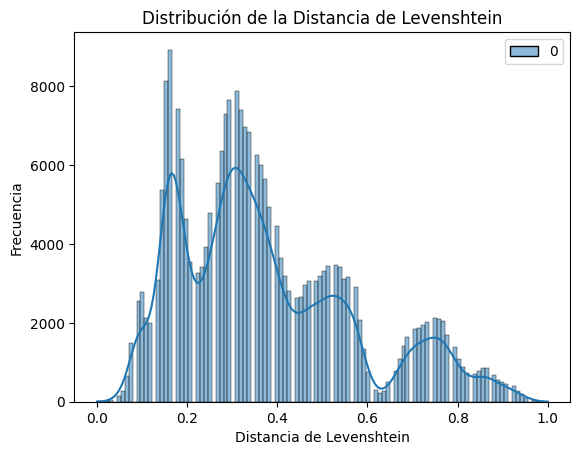

In [ ]:
# KDE de Levenstein
sns.histplot(normalizar(distance_1['distancia']), kde=True)
plt.title('Distribución de la Distancia de Levenshtein')
plt.xlabel('Distancia de Levenshtein')
plt.ylabel('Frecuencia')
plt.show()


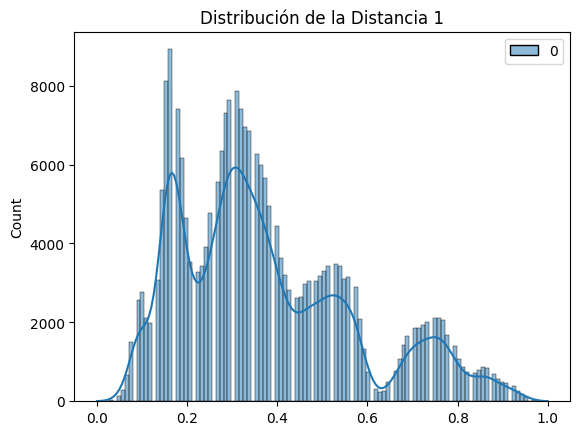

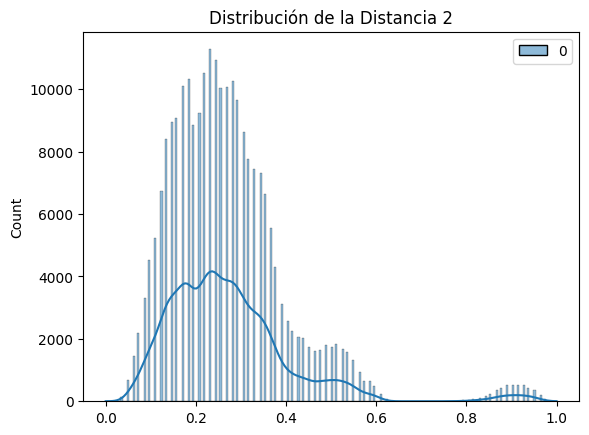

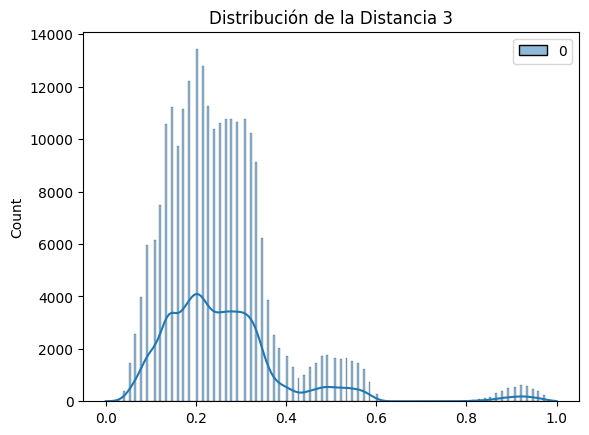

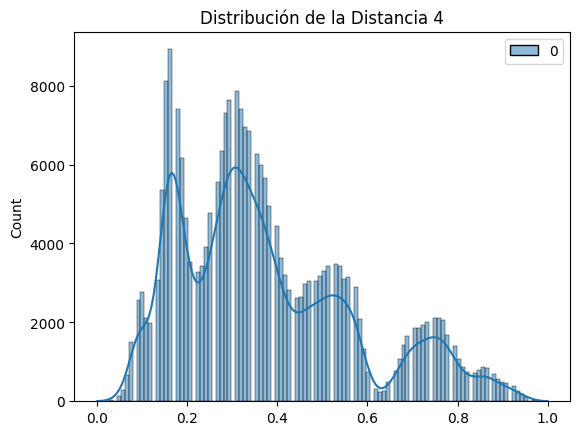

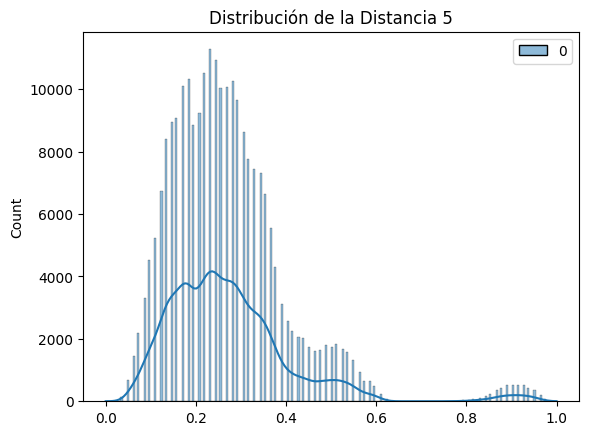

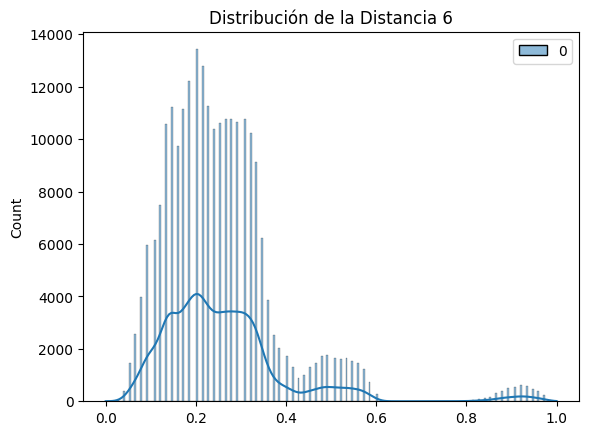

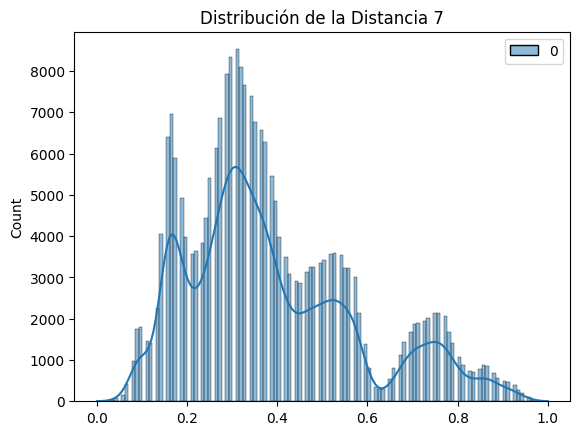

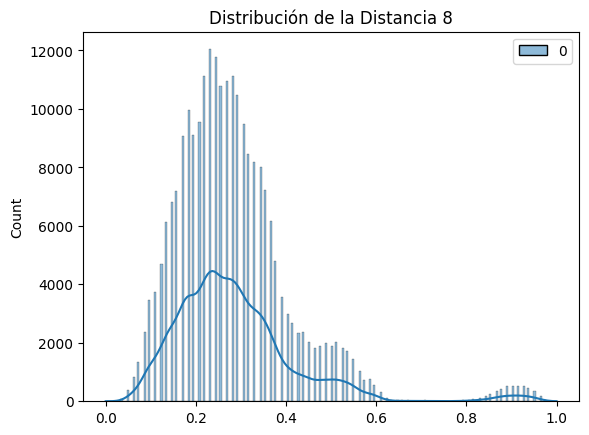

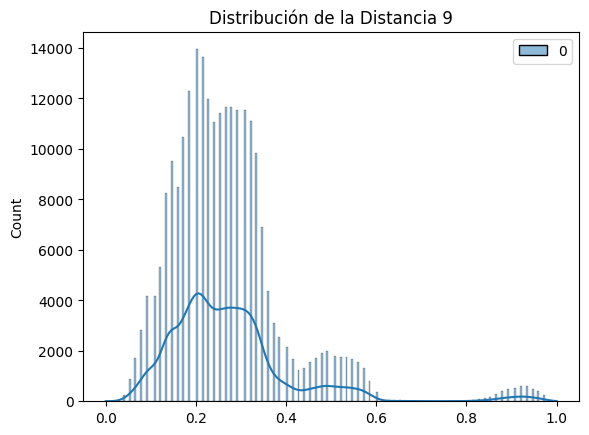

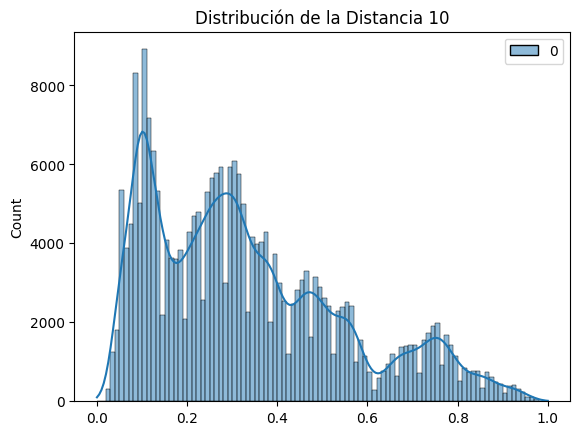

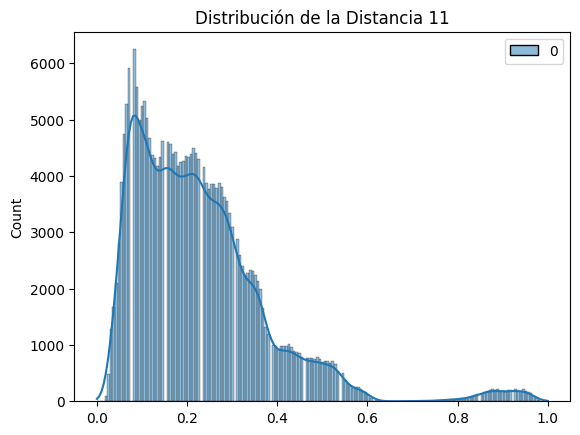

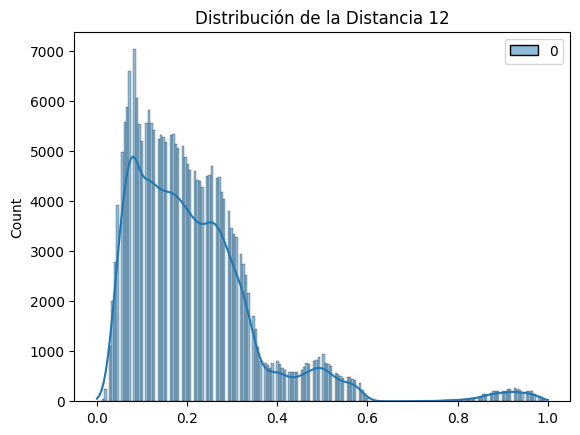

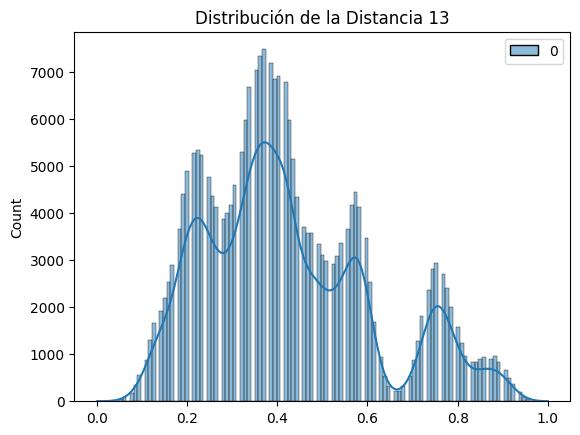

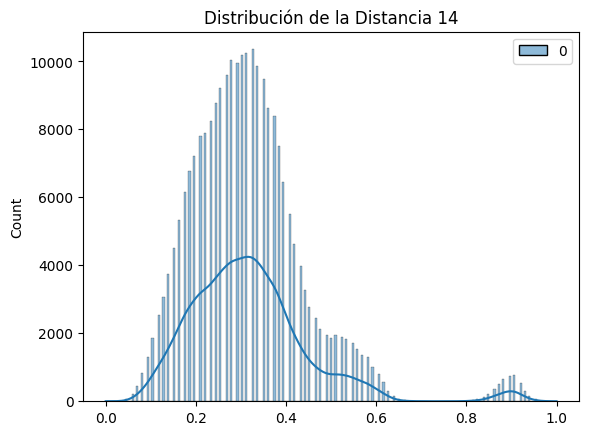

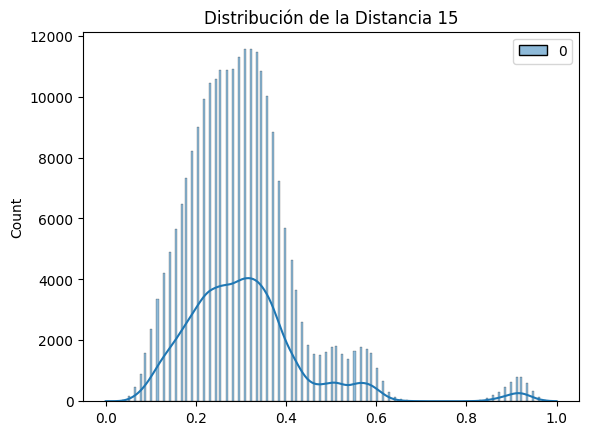

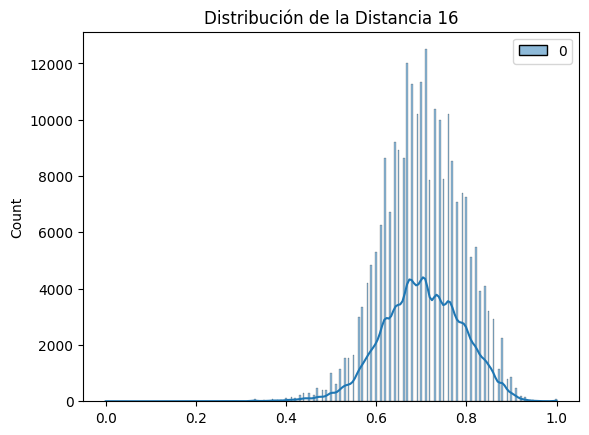

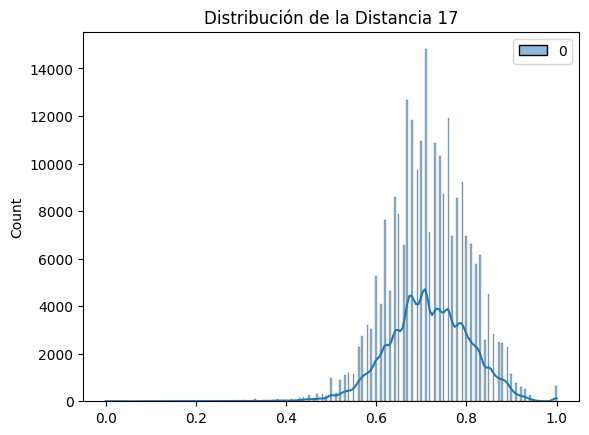

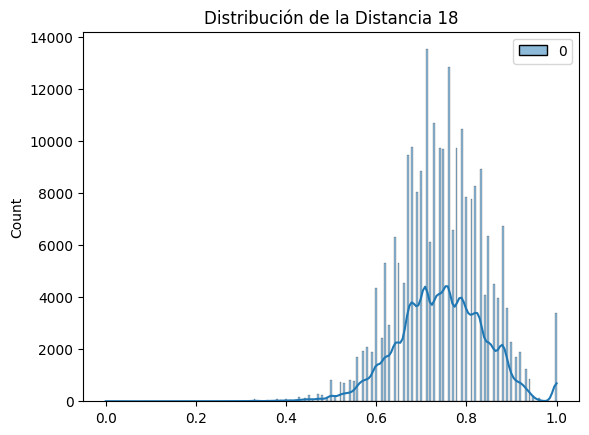

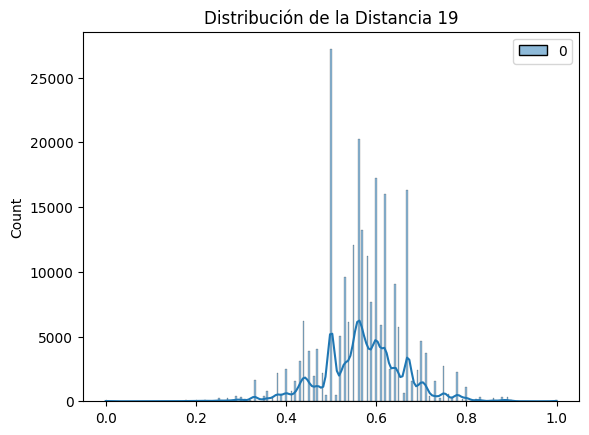

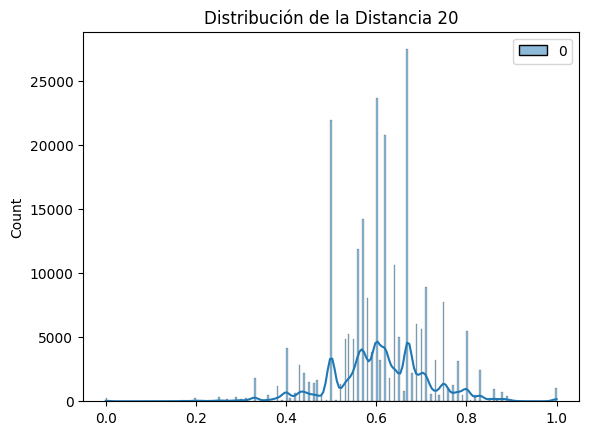

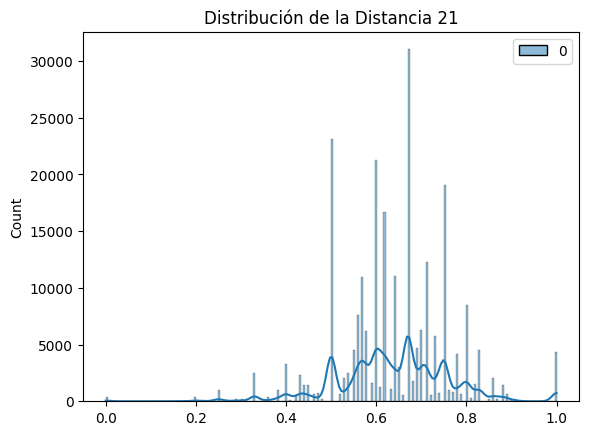

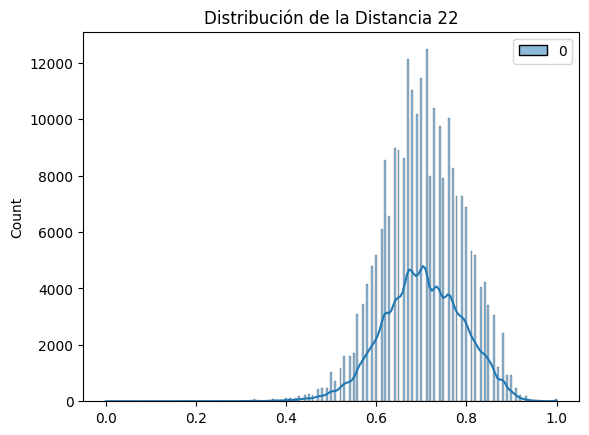

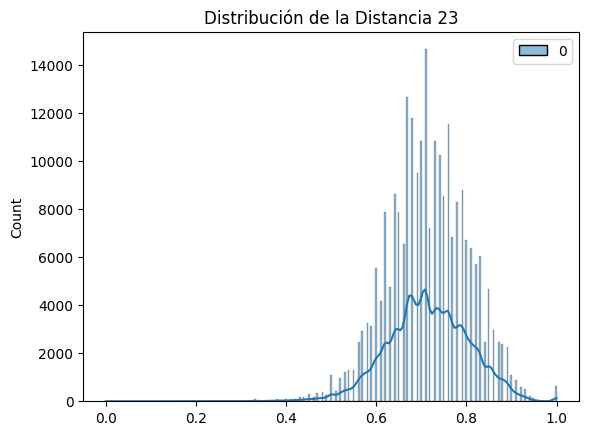

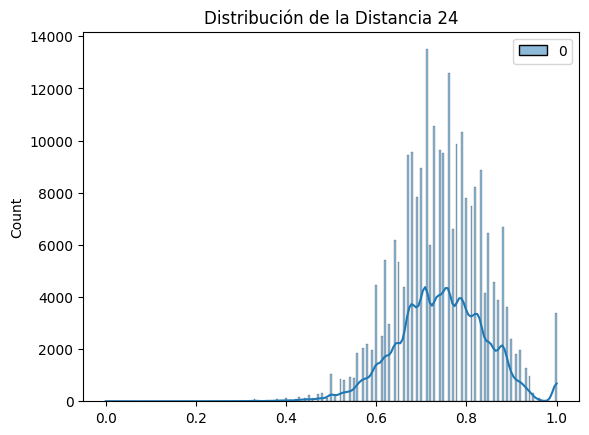

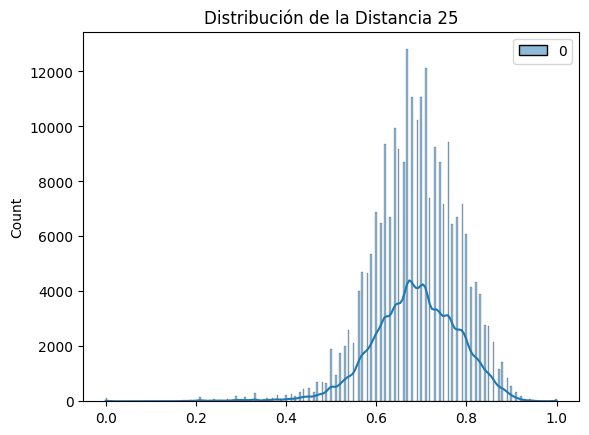

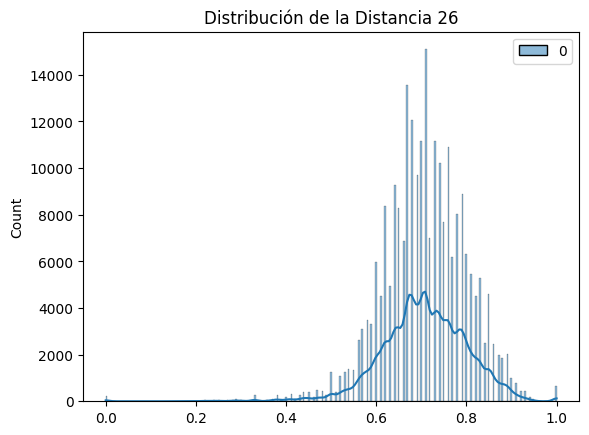

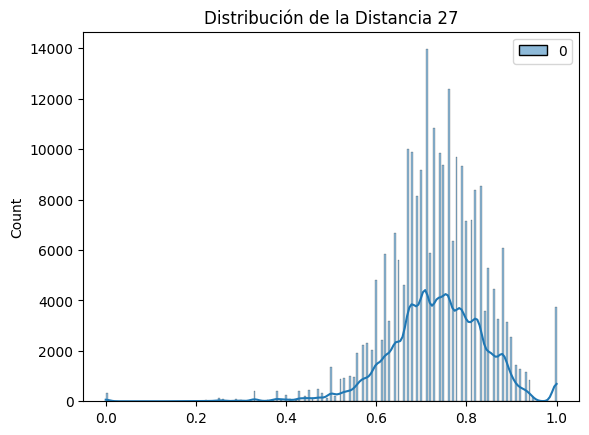

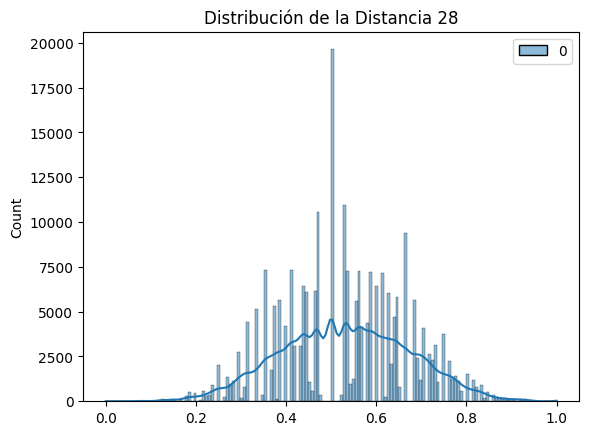

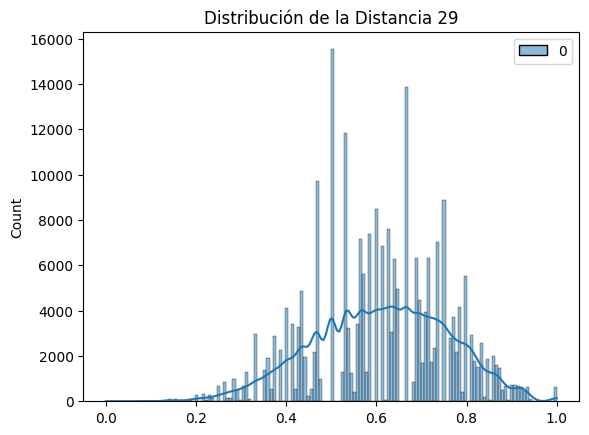

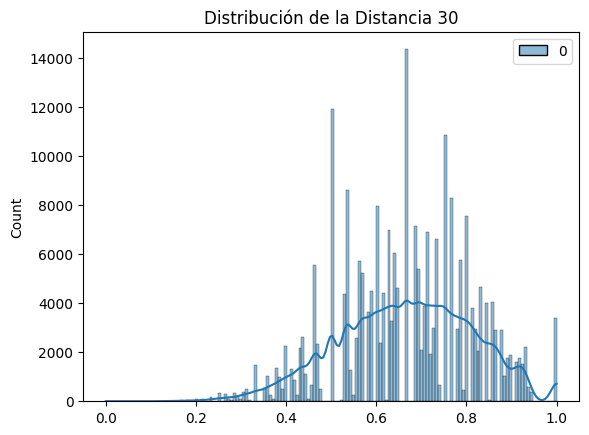

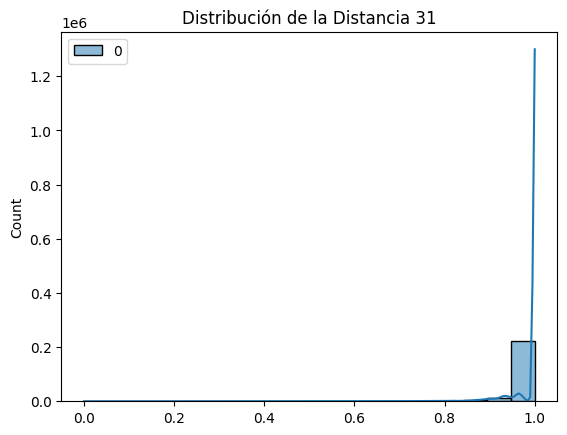

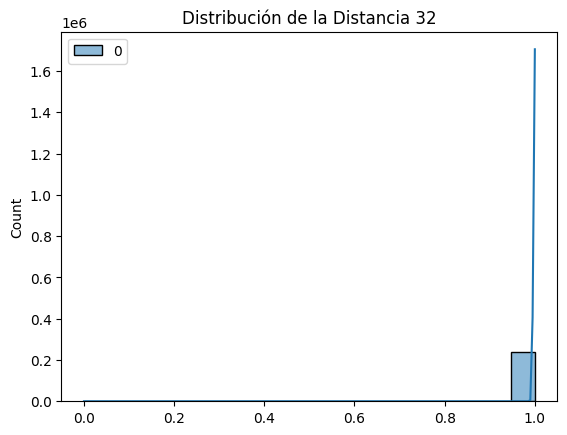

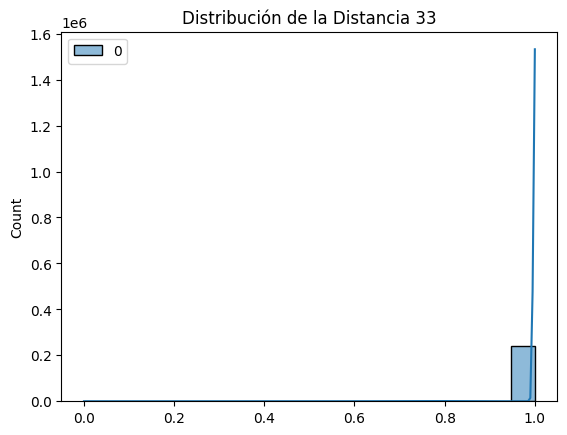

In [ ]:
# Iterar del 1 al 33
for i in range(1, 34):
    # Suponiendo que distance_i es el nombre de tus conjuntos de datos, por ejemplo, distance_1, distance_2, etc.
    dataset_name = f"distance_{i}"

    # Obtener los datos del conjunto de datos actual (distance_i)
    current_data = globals()[dataset_name]['distancia']

    # Graficar la distribución
    sns.histplot(normalizar(current_data), kde=True)
    plt.title(f'Distribución de la Distancia {i}')
    plt.show()

Selección del umbral con percentiles

In [ ]:
# Iterar del 1 al 33
for i in range(1, 34):
    # Suponiendo que distance_i es el nombre de tus conjuntos de datos, por ejemplo, distance_1, distance_2, etc.
    dataset_name = f"distance_{i}"

    # Obtener el DataFrame correspondiente al conjunto de datos actual (distance_i)
    current_df = globals()[dataset_name]

    # Normalizar la columna 'distancia'
    scaler = MinMaxScaler()
    current_df['distancia_normalized'] = scaler.fit_transform(current_df['distancia'].values.reshape(-1, 1))

    # Calcular el umbral basado en el percentil 95 de la columna 'distancia' normalizada
    threshold = np.quantile(current_df['distancia_normalized'], 0.95)

    print(f"Threshold para medida {i}: {threshold:.4f}")


Threshold para medida 1: 0.7692
Threshold para medida 2: 0.5244
Threshold para medida 3: 0.5200
Threshold para medida 4: 0.7692
Threshold para medida 5: 0.5244
Threshold para medida 6: 0.5200
Threshold para medida 7: 0.7802
Threshold para medida 8: 0.5244
Threshold para medida 9: 0.5333
Threshold para medida 10: 0.7709
Threshold para medida 11: 0.5000
Threshold para medida 12: 0.5000
Threshold para medida 13: 0.7872
Threshold para medida 14: 0.5465
Threshold para medida 15: 0.5513
Threshold para medida 16: 0.8400
Threshold para medida 17: 0.8600
Threshold para medida 18: 0.8900
Threshold para medida 19: 0.7100
Threshold para medida 20: 0.8000
Threshold para medida 21: 0.8300
Threshold para medida 22: 0.8500
Threshold para medida 23: 0.8600
Threshold para medida 24: 0.9000
Threshold para medida 25: 0.8400
Threshold para medida 26: 0.8500
Threshold para medida 27: 0.8900
Threshold para medida 28: 0.7647
Threshold para medida 29: 0.8462
Threshold para medida 30: 0.9000
Threshold para medi

Prácticamente para cosine distance el umbral de 95% de distribución sería en distancia 1.

## Métricas
 Establecer una medida de éxito o del error

In [ ]:
distance_31

index_df1  index_df2  \
0        1457739          0   
1        1457739          1   
2        1457739          2   
3        1457739          3   
4        1457739          4   
...          ...        ...   
244378   1442176       6063   
244379   1442176       6064   
244380   1442176       6067   
244381   1442176       6069   
244382   1442176       6071   

                                               settlement  \
0       fracc residencial las villas condominio real d...   
1       fracc residencial las villas condominio real d...   
2       fracc residencial las villas condominio real d...   
3       fracc residencial las villas condominio real d...   
4       fracc residencial las villas condominio real d...   
...                                                   ...   
244378  residencial plaza guadalupe dos a seccion cond...   
244379  residencial plaza guadalupe dos a seccion cond...   
244380  residencial plaza guadalupe dos a seccion cond...   
244381  residencial plaza guadalupe dos a seccion cond...   
244382  residencial plaza guadalupe dos a seccion cond...   

                           d_asenta  distancia  distancia_normalized  
0                guadalajara centro        1.0                   1.0  
1                 vallarta poniente        1.0                   1.0  
2                    arcos vallarta        1.0                   1.0  
3                             arcos        1.0                   1.0  
4                     obrera centro        1.0                   1.0  
...                             ...        ...                   ...  
244378  los arreguines tio arreguin        1.0                   1.0  
244379          santa maria del oro        1.0                   1.0  
244380     villa morelos el carrizo        1.0                   1.0  
244381                       zipoco        1.0                   1.0  
244382         abasolo la otra casa        1.0                   1.0  

[244383 rows x 6 columns]

In [ ]:
# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', 'd_asenta_original', distance_31)

df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                               Asignación_d_asenta_original  distancia_minima  
rownames                                                                       
1457739                                   Real del Camichin          0.469710  
1241193                                   Áurea Residencial          0.000000  
1040098                                            Libertad          0.383112  
1497931                                       Valle del Sol          0.564013  
1371246                                  Guadalajara Centro          1.000000  
1512418       

In [ ]:
# SHF_train_ypred = pd.read_excel('SHF_train_ypred.xlsx',  nrows=54)
SHF_train_ytrue = pd.read_excel('SHF_train_ytrue.xlsx')

In [ ]:
y_pred = df1_result['Asignación_d_asenta_original'] #SHF_train_ypred['y_pred']
y_true = SHF_train_ytrue['y_true']

In [ ]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)


In [ ]:
len(y_true_encoded), len(y_pred_encoded)

(53, 53)

In [ ]:
# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted')
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

# Mostrar un reporte de clasificación completo
report = classification_report(y_true_encoded, y_pred_encoded)
print(report)

Precision: 0.81
Recall: 0.77
F1-score: 0.79
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         0
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0
          12       1.00      1.00      1.00         1
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         0
          15       1.00      1.00      1.00         1
          16       0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWa

In [ ]:
# Lista de matrices de distancia (ejemplo: distance_1, distance_2, ..., distance_16)

# Metricas sin procesar
distance_matrices = [distance_1, distance_4, distance_7, distance_10,
                     distance_13, distance_16, distance_19, distance_22,
                     distance_25, distance_28, distance_31
                     ]  # Asegúrate de añadir todas tus matrices


# Columnas que deseas comparar
column_combinations = [
    ('settlement', 'd_asenta', 'd_asenta_original')
    # Añade más combinaciones según sea necesario
]


# Crear un DataFrame para almacenar los resultados
SHF_train_homologadas = SHF_train.copy()

# Iterar a través de cada combinación de columnas y matriz de distancia
for i, (col1_df1, col1_df2, col_extra) in enumerate(column_combinations):
    for j, distance_matrix in enumerate(distance_matrices, start=1):
        # df1_result, df2_result = obtener_top5_distancias(SHF_train, col1_df1, SEPOMEX, col1_df2, distance_matrix)
        # SHF_train_homologadas[f'top_{col1_df1}_distance_{j}'] = df1_result[f'top_{col1_df1}']
        df1_result, df2_result = obtener_top1_distancias(SHF_train, col1_df1, SEPOMEX_subset, col1_df2, col_extra, distance_matrix)
        SHF_train_homologadas[f'distancia_minima_{j}'] =  df1_result['distancia_minima']
        SHF_train_homologadas[f'{col1_df2}_min_{j}'] =  df1_result[f'{col1_df2}_min']
        SHF_train_homologadas[f'Asignación_{col_extra}_{j}'] =  df1_result[f'Asignación_{col_extra}']

In [ ]:
# Métricas para todas las distancias

# Columnas a iterar
num_columns = 11

# Lista para almacenar los resultados de las métricas
metricas_resultados = []

# Iterar a través de las columnas
for i in range(1, num_columns + 1):
    col_asignacion = f'Asignación_d_asenta_original_{i}'

    # Obtener las predicciones y los verdaderos valores
    y_pred = SHF_train_homologadas[col_asignacion]
    # y_true ya se asignó o cargó previamente

    # Crear un objeto LabelEncoder
    label_encoder = LabelEncoder()

    # Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
    all_labels = np.concatenate((y_true, y_pred))
    label_encoder.fit(all_labels)

    # Transformar y_true y y_pred en etiquetas numéricas
    y_true_encoded = label_encoder.transform(y_true)
    y_pred_encoded = label_encoder.transform(y_pred)

    # Calcular precisión, recall, F1-score y exactitud
    precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

    # Almacenar los resultados en la lista
    metricas_resultados.append({
        'Asignación': col_asignacion,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df


Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585

In [ ]:
SHF_train_homologadas.to_csv('SHF_train_homologadas_preprocesadas.csv', index=False)

In [ ]:
# Lista de matrices de distancia (ejemplo: distance_1, distance_2, ..., distance_16)


# Métricas preprocesamiento
distance_matrices = [distance_2, distance_5, distance_8, distance_11,
                     distance_14, distance_17, distance_20, distance_23,
                     distance_26, distance_29, distance_32
                     ]

# Columnas que deseas comparar
column_combinations = [
    ('settlement_split_sin_stopwords', 'd_asenta_split_sin_stopwords', 'd_asenta_original')
    # Añade más combinaciones según sea necesario
]


# Crear un DataFrame para almacenar los resultados
SHF_train_homologadas = SHF_train.copy()

# Iterar a través de cada combinación de columnas y matriz de distancia
for i, (col1_df1, col1_df2, col_extra) in enumerate(column_combinations):
    for j, distance_matrix in enumerate(distance_matrices, start=1):
        # df1_result, df2_result = obtener_top5_distancias(SHF_train, col1_df1, SEPOMEX, col1_df2, distance_matrix)
        # SHF_train_homologadas[f'top_{col1_df1}_distance_{j}'] = df1_result[f'top_{col1_df1}']
        df1_result, df2_result = obtener_top1_distancias(SHF_train, col1_df1, SEPOMEX, col1_df2, col_extra, distance_matrix)
        SHF_train_homologadas[f'distancia_minima_{j+11}'] =  df1_result['distancia_minima']
        SHF_train_homologadas[f'{col1_df2}_min_{j+11}'] =  df1_result[f'{col1_df2}_min']
        SHF_train_homologadas[f'Asignación_{col_extra}_{j+11}'] =  df1_result[f'Asignación_{col_extra}']

In [ ]:
# Métricas para todas las distancias

# Columnas a iterar
num_columns = 11

# Lista para almacenar los resultados de las métricas
# metricas_resultados = []

# Iterar a través de las columnas
for i in range(1, num_columns + 1):
    col_asignacion = f'Asignación_d_asenta_original_{i+11}'

    # Obtener las predicciones y los verdaderos valores
    y_pred = SHF_train_homologadas[col_asignacion]
    # y_true ya se asignó o cargó previamente

    # Crear un objeto LabelEncoder
    label_encoder = LabelEncoder()

    # Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
    all_labels = np.concatenate((y_true, y_pred))
    label_encoder.fit(all_labels)

    # Transformar y_true y y_pred en etiquetas numéricas
    y_true_encoded = label_encoder.transform(y_true)
    y_pred_encoded = label_encoder.transform(y_pred)

    # Calcular precisión, recall, F1-score y exactitud
    precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

    # Almacenar los resultados en la lista
    metricas_resultados.append({
        'Asignación': col_asignacion,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075

In [ ]:
SHF_train_homologadas.to_csv('SHF_train_homologadas_preprocesadas_sin_stopwords.csv', index=False)

In [ ]:
# Lista de matrices de distancia (ejemplo: distance_1, distance_2, ..., distance_16)

# Métricas preprocesamiento
distance_matrices = [distance_3, distance_6, distance_9, distance_12,
                     distance_15, distance_18, distance_21, distance_24,
                     distance_27, distance_30, distance_33
                     ]

# Columnas que deseas comparar
column_combinations = [
    ('settlement_split_sin_stopwords_stemmed', 'd_asenta_split_sin_stopwords_stemmed', 'd_asenta_original')
    # Añade más combinaciones según sea necesario
]

# Crear un DataFrame para almacenar los resultados
SHF_train_homologadas = SHF_train.copy()

# Iterar a través de cada combinación de columnas y matriz de distancia
for i, (col1_df1, col1_df2, col_extra) in enumerate(column_combinations):
    for j, distance_matrix in enumerate(distance_matrices, start=1):
        # df1_result, df2_result = obtener_top5_distancias(SHF_train, col1_df1, SEPOMEX, col1_df2, distance_matrix)
        # SHF_train_homologadas[f'top_{col1_df1}_distance_{j}'] = df1_result[f'top_{col1_df1}']
        df1_result, df2_result = obtener_top1_distancias(SHF_train, col1_df1, SEPOMEX, col1_df2, col_extra, distance_matrix)
        SHF_train_homologadas[f'distancia_minima_{j+22}'] =  df1_result['distancia_minima']
        SHF_train_homologadas[f'{col1_df2}_min_{j+22}'] =  df1_result[f'{col1_df2}_min']
        SHF_train_homologadas[f'Asignación_{col_extra}_{j+22}'] =  df1_result[f'Asignación_{col_extra}']

In [ ]:
# Métricas para todas las distancias

# Columnas a iterar
num_columns = 11

# Lista para almacenar los resultados de las métricas
# metricas_resultados = []

# Iterar a través de las columnas
for i in range(1, num_columns + 1):
    col_asignacion = f'Asignación_d_asenta_original_{i+22}'

    # Obtener las predicciones y los verdaderos valores
    y_pred = SHF_train_homologadas[col_asignacion]
    # y_true ya se asignó o cargó previamente

    # Crear un objeto LabelEncoder
    label_encoder = LabelEncoder()

    # Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
    all_labels = np.concatenate((y_true, y_pred))
    label_encoder.fit(all_labels)

    # Transformar y_true y y_pred en etiquetas numéricas
    y_true_encoded = label_encoder.transform(y_true)
    y_pred_encoded = label_encoder.transform(y_pred)

    # Calcular precisión, recall, F1-score y exactitud
    precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

    # Almacenar los resultados en la lista
    metricas_resultados.append({
        'Asignación': col_asignacion,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075
22  Asignación_d_asenta_original_23   0.358491  0.339623  0.345912  0.339623
23  Asignación_d_asenta_original_24   0.358491  0.339623  0.345912  0.339623
24  Asignación_d_asenta_original_25   0.377358  0.358491  0.364780  0.358491
25  Asignación_d_asenta_original_26   0.245283  0.207547  0.220126  0.207547
26  Asignación_d_asenta_original_27   0.641509  0.622642  0.628931  0.622642
27  Asignación_d_asenta_original_28   0.471698  0.433962  0.446541  0.433962
28  Asignación_d_asenta_original_29   0.396226  0.377358  0.383648  0.377358
29  Asignación_d_asenta_original_30   0.433962  0.415094  0.421384  0.415094
30  Asignación_d_asenta_original_31   0.415094  0.415094  0.415094  0.415094
31  Asignación_d_asenta_original_32   0.254717  0.245283  0.245283  0.245283
32  Asignación_d_asenta_original_33   0.000000  0.000000  0.000000  0.000000

In [ ]:
SHF_train_homologadas.to_csv('SHF_train_homologadas_preprocesadas_sin_stopwords_stemmed.csv', index=False)

In [ ]:
metricas_df.to_csv('metricas_preprocesadas.csv', index=False)

# Las métricas estan guardas en el orden preprocesadas, sin stopwords y al final las que se hicieron con stemmed adicional a lo anterior

Se observa que distancias que toman que toman encuentra la cantidad de letras como Levenshtein y Jaccard y si mejoran al hacer primero un prepocesamiento, por ejemplo la edición que penaliza más la sustitución en Levenshtein, paso de una presicion_score de de 0.167 a 0.611 y un acuraccy de 0.148 a 0.556 con solo hacer el procesamiento.

Por otro lado las distancias que toman en cuanta el contexto o la relación de parecido entre ambos strings como Fuzzyratio y Cosine disminuye su accuracy y presicion_score de 0.509 a 0.324 y de 0.667 a 0.611, respectivamente.



## Extender a Técnicas de NLP Avanzadas

a. Cosine con otros embeddings

Implementa y compara la distancia del coseno usando embeddings preentrenados (Word2Vec, GloVe).

b. Utilizar embeddings preentrenados

Convierte nombres de colonias en vectores y compara usando distancia del coseno.


### Embedding GloVe y cosine distance

Los vectores GloVe (Global Vectors for Word Representation) son embeddings de palabras preentrenados que se pueden utilizar para representar palabras en un espacio vectorial de manera que las palabras con contextos similares estén cerca unas de otras. Los vectores GloVe se pueden descargar y utilizar en tus propios proyectos de procesamiento de lenguaje natural.




In [ ]:
#Se obtiene un conjunto de entrenamiento para la implementación de las diferentes
#distancias a partir del SHF_subset que contiene los valores únicos de 'settlement', 'zip_code'
SEPOMEX_subset = SEPOMEX.drop_duplicates(subset=['d_asenta'])#, 'd_CP'])

# Calcula el porcentaje
porcentaje_unicos = len(SEPOMEX_subset)/len(SEPOMEX) * 100

print(f"Porcentaje de colonias únicas del SEPOMEX: {porcentaje_unicos:.4f}%")

len(SEPOMEX_subset), len(SEPOMEX)

Porcentaje de colonias únicas del SEPOMEX: 75.9387%


(4611, 6072)

In [ ]:
# Ruta al archivo de vectores GloVe descomprimido
glove_file = 'glove.6B.100d.txt'

# Convertir el archivo GloVe al formato de gensim
glove_model = gensim.models.KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

# Ahora se puede usar glove_model para obtener vectores de palabras
vector = glove_model['word']
print(vector)


[ 0.1233    0.55741   0.74203  -0.06547  -0.33485   0.81541  -0.16384
 -1.0327    0.41834  -0.012764 -0.60695   0.30146   0.35976   0.41161
  0.03381  -0.091115  0.35077  -0.24798  -0.13128   0.19869   0.046961
  0.014633 -0.39851  -0.11829  -0.27432  -0.032518 -0.23637  -0.072372
 -0.04237  -0.11159   0.12129   0.64011  -0.50275  -0.21584   0.30097
 -0.041772 -0.47972  -0.12897   0.6964   -0.27594  -0.29149   0.088033
  0.12874  -0.15249  -0.20548   0.029435  0.055133 -0.12994  -0.33869
 -0.61891   0.4743    0.60288   1.0209    0.48663  -1.0587   -1.9711
 -0.41751   0.12457   1.304     0.26925   0.28003   0.91141  -0.62217
 -0.70356   1.0379   -0.095316  0.54085  -0.36123  -0.10311  -0.31059
 -0.61454   0.63799   0.18329  -0.49599   0.3607    0.70414  -0.28096
  0.1062   -0.64866  -0.28698  -0.26623  -1.4502   -0.69456  -0.48722
 -1.6753    0.40353  -0.085219 -0.85528   0.65113   0.019457 -0.20924
  0.18864  -0.12794   0.41757   0.097439 -0.58381  -0.38945  -0.15608
  0.014198  0.6563

In [ ]:
# Alternativa para cargar los vectores GloVe en un diccionario
def load_glove_vectors(glove_file):
    glove_vectors = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_vectors[word] = vector
    return glove_vectors

# Cargar los vectores
glove_vectors = load_glove_vectors(glove_file)

Ejemplo

In [ ]:
# Definimos una nueva función cosine de similaridad entre vectores, se pasan directamente como vectores.  Se usa cosine de Skilearn en vez de SciPy

# def cosine_similarity(vec1, vec2):
#     return cosine_distances(vec1, vec2)

def cosine_similarity(vec1, vec2):
    vector = np.array([vec1, vec2])
    return cosine_distances(vector)[0,1]

word1 = 'king'
word2 = 'queen'

vector1 = glove_model[word1]
vector2 = glove_model[word2]

disimilarity = cosine_similarity(vector1, vector2)
print(f'disimilarity between {word1} and {word2}: {disimilarity}')


disimilarity between king and queen: 0.24923110008239746


In [ ]:
# Definimos una función para pasar de texto a vector dado un glove vector

def text_to_glove_vector(text, glove_vectors):
    words = text.split()
    vectors = [glove_vectors[word] for word in words if word in glove_vectors]
    if not vectors:
        return np.zeros(100)  # Devuelve un vector de ceros si ninguna palabra está en GloVe
    return np.mean(vectors, axis=0)

# Ejemplo
colonia1 = 'neighbour'
colonia2 = 'neighbour' # si no aparece en Glove automaticamente lo vuelve cero

vector_colonia1 = text_to_glove_vector(colonia1, glove_model)
vector_colonia2 = text_to_glove_vector(colonia2, glove_model)

similarity_colonias = cosine_similarity(vector_colonia1, vector_colonia2)
print(f'Similarity between "{colonia1}" and "{colonia2}": {similarity_colonias}')


Similarity between "neighbour" and "neighbour": 0.0


In [ ]:
# Aplicarlo a cada renglon de las columnas de interés para obtener los vectores correspondiente

def obtener_embedding_glove(palabra, glove_vectors):
    return glove_vectors.get(palabra, np.zeros(100))

In [ ]:
SHF_train['settlement']

rownames
1457739    fracc residencial las villas condominio real d...
1241193                                    aurea residencial
1040098                              colonia sector libertad
1497931    fraccionamiento valle de cincuenta sol etapa d...
1371246                                   senderosdesantiago
1512418                 accion ubanistica parque de las aves
1269461                                    lomas san agustin
1022118                                 coordenada lafayette
1336099          residencial san pedro colonia rancho blanco
1306791                  fresnos dos etapa cinco sub etapa e
1486871    valle de los molinos dos etapa tres condominio...
1459233                 unidad habitacional arcos de zapopan
1390524                    fraccionamiento hacienda del real
1266710            lomas de san agustin cuatro segunda etapa
1225849                      chulavista doce o doceava etapa
1438208                      condominio rinconada del hipico
1347275    desa

In [ ]:
# Se les aplica una limpieza y minúculas a las columanas de colonias

# SHF_train = aplicar_limpieza_puntuacion(SHF_train, 'settlement')
# SHF_train = minusculas(SHF_train, 'settlement')

# SEPOMEX_subset = aplicar_limpieza_puntuacion(SEPOMEX_subset, 'd_asenta')
# SEPOMEX_subset = minusculas(SEPOMEX_subset, 'd_asenta')

# Convertir nombres de colonias a vectores usando GloVe
SHF_train['settlement_embedding_ok'] = SHF_train['settlement'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))
SEPOMEX_subset['d_asenta_embedding_ok'] = SEPOMEX_subset['d_asenta'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))


<ipython-input-169-e71a0a686221>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['d_asenta_embedding_ok'] = SEPOMEX_subset['d_asenta'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))


In [ ]:
def calcular_matriz_distancias(df1, col1, col1_original, df2, col2, col2_original, funcion_distancia):
    """
    Calcula la matriz de distancias del coseno entre dos columnas específicas de dos DataFrames.

    Parámetros:
    df1 (DataFrame): Primer DataFrame con embeddings en col1.
    col1 (str): Nombre de la columna de embeddings en el primer DataFrame.
    df2 (DataFrame): Segundo DataFrame con embeddings en col2.
    col2 (str): Nombre de la columna de embeddings en el segundo DataFrame.

    Retorna:
    DataFrame: DataFrame con las distancias del coseno y las columnas originales.
    """
    resultados_distancia = []

    # Iteramos sobre cada fila de df1 y todas las filas de df2 para guardar los resultados
    for i, row_df1 in df1.iterrows():
        for j, row_df2 in df2.iterrows():
            distancia = funcion_distancia(row_df1[col1], row_df2[col2])

            resultados_distancia.append({
                'index_df1': row_df1.name, # Es necesario guardar los indices porque df2 ya los indica
                'index_df2': row_df2.name,
                f'{col1_original}': row_df1[col1_original],
                f'{col2_original}': row_df2[col2_original],
                'distancia': distancia
            })

    # Convertimos la lista de resultados a DataFrame
    matriz_distancia = pd.DataFrame(resultados_distancia)

    return matriz_distancia

In [ ]:
# Ejemplo de uso
# Asegúrate de que df1[col1] y df2[col2] tienen las columnas de embeddings ya calculadas y en formato de lista de vectores

# Calcula la matriz de distancias del coseno
distance_34 = calcular_matriz_distancias(SHF_train, 'settlement_embedding_ok', 'settlement', SEPOMEX_subset, 'd_asenta_embedding_ok', 'd_asenta', cosine_similarity)


In [ ]:
distance_34

index_df1  index_df2  \
0        1457739          0   
1        1457739          1   
2        1457739          2   
3        1457739          3   
4        1457739          4   
...          ...        ...   
244378   1442176       6063   
244379   1442176       6064   
244380   1442176       6067   
244381   1442176       6069   
244382   1442176       6071   

                                               settlement  \
0       fracc residencial las villas condominio real d...   
1       fracc residencial las villas condominio real d...   
2       fracc residencial las villas condominio real d...   
3       fracc residencial las villas condominio real d...   
4       fracc residencial las villas condominio real d...   
...                                                   ...   
244378  residencial plaza guadalupe dos a seccion cond...   
244379  residencial plaza guadalupe dos a seccion cond...   
244380  residencial plaza guadalupe dos a seccion cond...   
244381  residencial plaza guadalupe dos a seccion cond...   
244382  residencial plaza guadalupe dos a seccion cond...   

                           d_asenta  distancia  
0                guadalajara centro        1.0  
1                 vallarta poniente        1.0  
2                    arcos vallarta        1.0  
3                             arcos        1.0  
4                     obrera centro        1.0  
...                             ...        ...  
244378  los arreguines tio arreguin        1.0  
244379          santa maria del oro        1.0  
244380     villa morelos el carrizo        1.0  
244381                       zipoco        1.0  
244382         abasolo la otra casa        1.0  

[244383 rows x 5 columns]

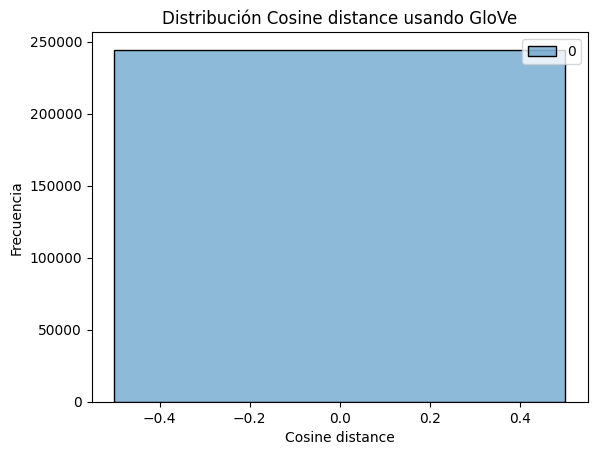

In [ ]:
sns.histplot(normalizar(distance_34['distancia']))#, kde=True)
plt.title('Distribución Cosine distance usando GloVe')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Obtener el top 5 de distancias mínimas

df1_result, df2_result = obtener_top5_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', distance_34)

# df1_result[['settlement', 'top_settlement']]

In [ ]:
# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', 'd_asenta_original', distance_34)

df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

         Asignación_d_asenta_original  distancia_minima  
rownames                                                 
1457739            Guadalajara Centro               1.0  
1241193            Guadalajara Centro               1.0  
1040098            Guadalajara Centro               1.0  
1497931            Guadalajara Centro               1.0  
1371246            Guadalajara Centro               1.0  
1512418            Guadalajara Centro               1.0  
1269461            Guadalajara Centro               1.0  
1022118            Guadalajara Centro               

In [ ]:
# metricas_resultados = []

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_34',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075
22  Asignación_d_asenta_original_23   0.358491  0.339623  0.345912  0.339623
23  Asignación_d_asenta_original_24   0.358491  0.339623  0.345912  0.339623
24  Asignación_d_asenta_original_25   0.377358  0.358491  0.364780  0.358491
25  Asignación_d_asenta_original_26   0.245283  0.207547  0.220126  0.207547
26  Asignación_d_asenta_original_27   0.641509  0.622642  0.628931  0.622642
27  Asignación_d_asenta_original_28   0.471698  0.433962  0.446541  0.433962
28  Asignación_d_asenta_original_29   0.396226  0.377358  0.383648  0.377358
29  Asignación_d_asenta_original_30   0.433962  0.415094  0.421384  0.415094
30  Asignación_d_asenta_original_31   0.415094  0.415094  0.415094  0.415094
31  Asignación_d_asenta_original_32   0.254717  0.245283  0.245283  0.245283
32  Asignación_d_asenta_original_33   0.000000  0.000000  0.000000  0.000000
33  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
34  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000

In [ ]:
# Se les aplica una limpieza y minúculas a las columnas de colonias

# aplicar_limpieza_puntuacion(SHF_train, 'settlement_split_sin_stopwords')
# minusculas(SHF_train, 'settlement_split_sin_stopwords')

# aplicar_limpieza_puntuacion(SEPOMEX_subset, 'd_asenta_split_sin_stopwords')
# minusculas(SEPOMEX_subset, 'd_asenta_split_sin_stopwords')

# Convertir nombres de colonias a vectores usando GloVe
SHF_train['settlement_split_sin_stopwords_embedding'] = SHF_train['settlement_split_sin_stopwords'].apply(lambda x: text_to_glove_vector(x, glove_vectors))
SEPOMEX_subset['d_asenta_split_sin_stopwords_embedding'] = SEPOMEX_subset['d_asenta_split_sin_stopwords'].apply(lambda x: text_to_glove_vector(x, glove_vectors))

<ipython-input-178-94fa8e2b1406>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['d_asenta_split_sin_stopwords_embedding'] = SEPOMEX_subset['d_asenta_split_sin_stopwords'].apply(lambda x: text_to_glove_vector(x, glove_vectors))


In [ ]:
# Ejemplo de uso
# Asegúrate de que df1[col1] y df2[col2] tienen las columnas de embeddings ya calculadas y en formato de lista de vectores

# Calcula la matriz de distancias del coseno
distance_35 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_embedding', 'settlement', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_embedding', 'd_asenta', cosine_similarity)


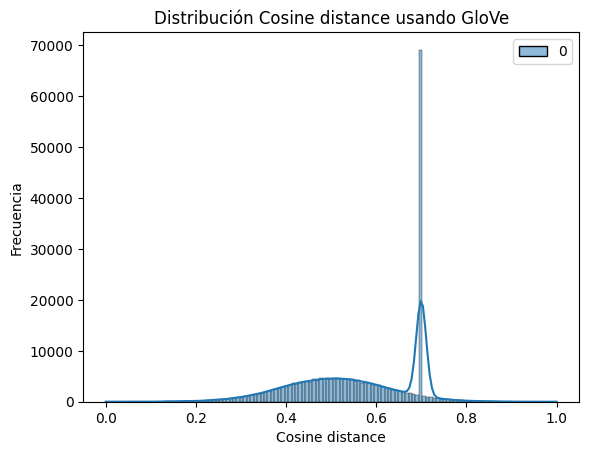

In [ ]:
sns.histplot(normalizar(distance_35['distancia']), kde=True)
plt.title('Distribución Cosine distance usando GloVe')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Obtener el top 5 de distancias mínimas
#
df1_result, df2_result = obtener_top5_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', distance_35)

df1_result[['settlement', 'top_settlement']]

settlement  \
rownames                                                      
1457739   fracc residencial las villas condominio real d...   
1241193                                   aurea residencial   
1040098                             colonia sector libertad   
1497931   fraccionamiento valle de cincuenta sol etapa d...   
1371246                                  senderosdesantiago   
1512418                accion ubanistica parque de las aves   
1269461                                   lomas san agustin   
1022118                                coordenada lafayette   
1336099         residencial san pedro colonia rancho blanco   
1306791                 fresnos dos etapa cinco sub etapa e   
1486871   valle de los molinos dos etapa tres condominio...   
1459233                unidad habitacional arcos de zapopan   
1390524                   fraccionamiento hacienda del real   
1266710           lomas de san agustin cuatro segunda etapa   
1225849                     chulavista doce o doceava etapa   
1438208                     condominio rinconada del hipico   
1347275   desarrollo geovillas los olivos condominio brezos   
1463496   colonia desarrollo habitacional y unifamiliar ...   
1042534          san miguel de huentitan el alto dos a secc   
1228327                 fracc hacienda santa fe sexta etapa   
1364127   parques san martin de las flores etapa seis y ...   
1383606   mirador de los conejos colonia san jose condom...   
1282686               desarrollo geovillas la arbolada plus   
1520644    fraccionamiento el campestre condominio mascardi   
1035083                                   fracc verde valle   
1038596                                           la huerta   
1036838                   italia providencia sector hidalgo   
1233516   valle de las flores condominio valle de las az...   
1338965   exejido san martin de las flores lomas del tap...   
1525252         residencial del bosque condominio el bosque   
1500860   fraccionamiento accion urbanistica al viento r...   
1347724                                            la bella   
1363232                                           tateposco   
1254326   fraccionamiento valle de los encinos tres etap...   
1262482                                  las trojes paq uno   
1044975   fraccionamiento villas del nilo condominio man...   
1286323                          geovillas la arbolada cien   
1375255                                  paseo de la canada   
1226022                   rancho los ocampo cond los ocampo   
1224343                      chulavista diecisieteava etapa   
1034164            fraccionamiento el alamo segunda seccion   
1038325          rinconada santa rita condominio santa rita   
1371428                                colonia la hortaliza   
1278798   fraccionamiento hacienda santa fe treinta y oc...   
1036720           providencia fraccionamiento lomas colomos   
1473666   fraccionamiento valle esmeralda condominio val...   
1456260                                          zotogrande   
1500534               los molinos cinco cinco primera etapa   
1044935   villas del nilo del sector reforma condominio ...   
1254676                        fraccionamiento los abedules   
1333511                                           silos dos   
1333781   paseo de los agaves etapa cinco cinco b condom...   
1442176   residencial plaza guadalupe dos a seccion cond...   

                                             top_settlement  
rownames                                                     
1457739   {'villa del real': 0.17151236534118652, 'hacie...  
1241193   {'aurea residencial': 0.0, 'jardines de santa ...  
1040098   {'la colonia': 0.27549344301223755, 'colonia l...  
1497931   {'nuevo valle exhacienda del valle': 0.1174889...  
1371246   {'guadalajara centro': 1.0, 'vallarta poniente...  
1512418   {'parque de las aves': 0.09583795070648193, 'r...  
1269461   {'lomas de san agustin': 0.0, 'lomas de san go...  
1022118   {'lafayette': 0

In [ ]:
# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', 'd_asenta_original', distance_35)

# df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_35',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075
22  Asignación_d_asenta_original_23   0.358491  0.339623  0.345912  0.339623
23  Asignación_d_asenta_original_24   0.358491  0.339623  0.345912  0.339623
24  Asignación_d_asenta_original_25   0.377358  0.358491  0.364780  0.358491
25  Asignación_d_asenta_original_26   0.245283  0.207547  0.220126  0.207547
26  Asignación_d_asenta_original_27   0.641509  0.622642  0.628931  0.622642
27  Asignación_d_asenta_original_28   0.471698  0.433962  0.446541  0.433962
28  Asignación_d_asenta_original_29   0.396226  0.377358  0.383648  0.377358
29  Asignación_d_asenta_original_30   0.433962  0.415094  0.421384  0.415094
30  Asignación_d_asenta_original_31   0.415094  0.415094  0.415094  0.415094
31  Asignación_d_asenta_original_32   0.254717  0.245283  0.245283  0.245283
32  Asignación_d_asenta_original_33   0.000000  0.000000  0.000000  0.000000
33  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
34  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
35  Asignación_d_asenta_original_35   0.471698  0.415094  0.433962  0.415094

In [ ]:
# Se les aplica una limpieza y minúculas a las columnas de colonias

# aplicar_limpieza_puntuacion(SHF_train, 'settlement_split_sin_stopwords_stemmed')
# minusculas(SHF_train, 'settlement_split_sin_stopwords_stemmed')

# aplicar_limpieza_puntuacion(SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed')
# minusculas(SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed')

# Convertir nombres de colonias a vectores usando GloVe
SHF_train['settlement_split_sin_stopwords_stemmed_embedding'] = SHF_train['settlement_split_sin_stopwords_stemmed'].apply(lambda x: text_to_glove_vector(x, glove_vectors))
SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed_embedding'] = SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed'].apply(lambda x: text_to_glove_vector(x, glove_vectors))

<ipython-input-184-cba9349999dc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed_embedding'] = SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed'].apply(lambda x: text_to_glove_vector(x, glove_vectors))


In [ ]:
# Ejemplo de uso
# Asegúrate de que df1[col1] y df2[col2] tienen las columnas de embeddings ya calculadas y en formato de lista de vectores

# Calcula la matriz de distancias del coseno
distance_36 = calcular_matriz_distancias(SHF_train, 'settlement_split_sin_stopwords_stemmed_embedding', 'settlement', SEPOMEX_subset, 'd_asenta_split_sin_stopwords_stemmed_embedding', 'd_asenta', cosine_similarity)


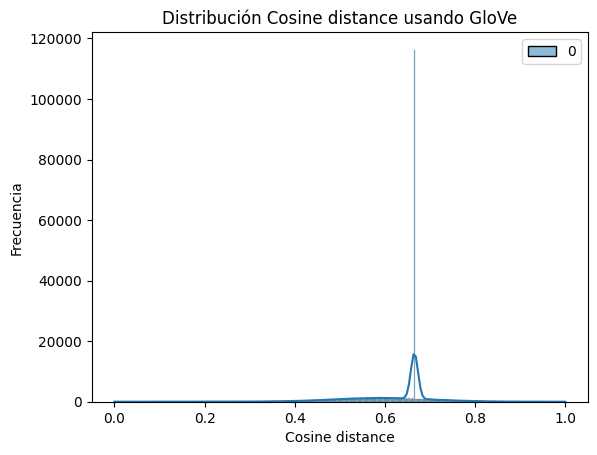

In [ ]:
sns.histplot(normalizar(distance_36['distancia']), kde=True)
plt.title('Distribución Cosine distance usando GloVe')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Obtener el top 5 de distancias mínimas

df1_result, df2_result = obtener_top5_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', distance_36)

df1_result[['settlement', 'top_settlement']]

settlement  \
rownames                                                      
1457739   fracc residencial las villas condominio real d...   
1241193                                   aurea residencial   
1040098                             colonia sector libertad   
1497931   fraccionamiento valle de cincuenta sol etapa d...   
1371246                                  senderosdesantiago   
1512418                accion ubanistica parque de las aves   
1269461                                   lomas san agustin   
1022118                                coordenada lafayette   
1336099         residencial san pedro colonia rancho blanco   
1306791                 fresnos dos etapa cinco sub etapa e   
1486871   valle de los molinos dos etapa tres condominio...   
1459233                unidad habitacional arcos de zapopan   
1390524                   fraccionamiento hacienda del real   
1266710           lomas de san agustin cuatro segunda etapa   
1225849                     chulavista doce o doceava etapa   
1438208                     condominio rinconada del hipico   
1347275   desarrollo geovillas los olivos condominio brezos   
1463496   colonia desarrollo habitacional y unifamiliar ...   
1042534          san miguel de huentitan el alto dos a secc   
1228327                 fracc hacienda santa fe sexta etapa   
1364127   parques san martin de las flores etapa seis y ...   
1383606   mirador de los conejos colonia san jose condom...   
1282686               desarrollo geovillas la arbolada plus   
1520644    fraccionamiento el campestre condominio mascardi   
1035083                                   fracc verde valle   
1038596                                           la huerta   
1036838                   italia providencia sector hidalgo   
1233516   valle de las flores condominio valle de las az...   
1338965   exejido san martin de las flores lomas del tap...   
1525252         residencial del bosque condominio el bosque   
1500860   fraccionamiento accion urbanistica al viento r...   
1347724                                            la bella   
1363232                                           tateposco   
1254326   fraccionamiento valle de los encinos tres etap...   
1262482                                  las trojes paq uno   
1044975   fraccionamiento villas del nilo condominio man...   
1286323                          geovillas la arbolada cien   
1375255                                  paseo de la canada   
1226022                   rancho los ocampo cond los ocampo   
1224343                      chulavista diecisieteava etapa   
1034164            fraccionamiento el alamo segunda seccion   
1038325          rinconada santa rita condominio santa rita   
1371428                                colonia la hortaliza   
1278798   fraccionamiento hacienda santa fe treinta y oc...   
1036720           providencia fraccionamiento lomas colomos   
1473666   fraccionamiento valle esmeralda condominio val...   
1456260                                          zotogrande   
1500534               los molinos cinco cinco primera etapa   
1044935   villas del nilo del sector reforma condominio ...   
1254676                        fraccionamiento los abedules   
1333511                                           silos dos   
1333781   paseo de los agaves etapa cinco cinco b condom...   
1442176   residencial plaza guadalupe dos a seccion cond...   

                                             top_settlement  
rownames                                                     
1457739   {'villa del real': 0.0, 'villas camino real de...  
1241193   {'aurea residencial': 0.0, 'las garzas': 0.429...  
1040098   {'parque industrial prologis arrayanes': 0.478...  
1497931   {'valle del sol': 0.1074448823928833, 'bosques...  
1371246   {'guadalajara centro': 1.0, 'vallarta poniente...  
1512418   {'aves del paraiso': 0.23735064268112183, 'par...  
1269461   {'lomas de san agustin': 0.0, 'hacienda san ag...  
1022118   {'guadalajara c

In [ ]:
# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', 'd_asenta_original', distance_36)

# df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_36',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075
22  Asignación_d_asenta_original_23   0.358491  0.339623  0.345912  0.339623
23  Asignación_d_asenta_original_24   0.358491  0.339623  0.345912  0.339623
24  Asignación_d_asenta_original_25   0.377358  0.358491  0.364780  0.358491
25  Asignación_d_asenta_original_26   0.245283  0.207547  0.220126  0.207547
26  Asignación_d_asenta_original_27   0.641509  0.622642  0.628931  0.622642
27  Asignación_d_asenta_original_28   0.471698  0.433962  0.446541  0.433962
28  Asignación_d_asenta_original_29   0.396226  0.377358  0.383648  0.377358
29  Asignación_d_asenta_original_30   0.433962  0.415094  0.421384  0.415094
30  Asignación_d_asenta_original_31   0.415094  0.415094  0.415094  0.415094
31  Asignación_d_asenta_original_32   0.254717  0.245283  0.245283  0.245283
32  Asignación_d_asenta_original_33   0.000000  0.000000  0.000000  0.000000
33  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
34  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
35  Asignación_d_asenta_original_35   0.471698  0.415094  0.433962  0.415094
36  Asignación_d_asenta_original_36   0.207547  0.188679  0.194969  0.188679

De esta tabla se concluye que la mejor con colonias con preprocesamiento sería cosine distance usando TF-IDF para embeddings, con un presicion-score es de 63.88%.

In [ ]:
# metricas_df.to_csv('metricas_preprocesadas+glove.csv', index=False)

### GloVe con traducción y usando cosine distance

Como están los vectores en inglés será conveniente traducir los nombres de las colonias

In [ ]:
# ! pip install googletrans==4.0.0-rc1
! pip install --upgrade googletrans==3.1.0a0


In [ ]:
import googletrans

In [ ]:
# Inicializar el traductor
translator = Translator()

# Función para traducir texto
def translate_text(text, src='es', dest='en'):
    translation = translator.translate(text, src=src, dest=dest)
    return translation.text

In [ ]:
# Ejemplo

translate_text('hola')

'hello'

In [ ]:
# Se les aplica una limpieza y minúculas a las columanas de colonias

# SHF_train = aplicar_limpieza_puntuacion(SHF_train, 'settlement')
# SHF_train = minusculas(SHF_train, 'settlement')

# SEPOMEX = aplicar_limpieza_puntuacion(SEPOMEX, 'd_asenta')
# SEPOMEX = minusculas(SEPOMEX, 'd_asenta')

In [ ]:
traduction = []

for i,text in enumerate(SHF_train["settlement"]):
    translated_text = translate_text(text)
    traduction.append(translated_text)

In [ ]:
import time

In [ ]:
time.sleep(1)
SHF_train['settlement_traduction'] = SHF_train['settlement'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))

In [ ]:
SHF_train.loc[:, 'traduccion']  = traduction

In [ ]:
SHF_train['traduccion']

rownames
1457739    residential fraction las villas condominium re...
1241193                                    residential aurea
1040098                                freedom sector colony
1497931    subdivision Valle de Fifty Sol Stage Ten Condo...
1371246                                     trailsdesantiago
1512418                               urban action bird park
1269461                                    lomas san agustin
1022118                                 lafayette coordinate
1336099           residential san pedro colony rancho blanco
1306791                 ash trees two stage five sub stage e
1486871    valley of the mills two stage three quartzite ...
1459233                        Arcos de Zapopan housing unit
1390524                        hacienda del real subdivision
1266710               Lomas de San Agustin Four Second Stage
1225849                  chulavista twelfth or twelfth stage
1438208                     rinconada del hipico condominium
1347275    deve

In [ ]:
# SEPOMEX['traduccion'] = SEPOMEX['d_asenta'].apply(translator.translate, src='es', dest='en')#.apply(getattr, args=('text',))
traduction = []

for i,text in enumerate(SEPOMEX_subset["d_asenta"]):
    translator = Translator()
    translated_text = translate_text(text)
    traduction.append(translated_text)

In [ ]:
SEPOMEX_subset.loc[:, 'traduccion']  = traduction

<ipython-input-202-91118ff5cbeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset.loc[:, 'traduccion']  = traduction


In [ ]:
SEPOMEX_subset['traduccion']

0                guadalajara center
1                     west vallarta
2                   vallarta arches
3                              bows
4                     worker center
                   ...             
6063    the arreguines tio arreguin
6064            Santa Maria del Oro
6067       villa morelos el carrizo
6069                         zipoco
6071      abandoned the other house
Name: traduccion, Length: 4611, dtype: object

In [ ]:
# Convertir nombres de colonias traducidos a vectores usando GloVe
SHF_train['settlement_traduccion_embedding'] = SHF_train['traduccion'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))
SEPOMEX_subset['d_asenta_traduccion_embedding'] = SEPOMEX_subset['traduccion'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))



<ipython-input-204-d7411a37e7b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['d_asenta_traduccion_embedding'] = SEPOMEX_subset['traduccion'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))


In [ ]:
SEPOMEX_subset

d_codigo                     d_asenta    d_tipo_asenta  \
0       44100           guadalajara centro          Colonia   
1       44110            vallarta poniente  Fraccionamiento   
2       44130               arcos vallarta          Colonia   
3       44130                        arcos  Fraccionamiento   
4       44140                obrera centro          Colonia   
...       ...                          ...              ...   
6063    49970  los arreguines tio arreguin          Colonia   
6064    49970          santa maria del oro           Pueblo   
6067    49990     villa morelos el carrizo        Ranchería   
6069    49994                       zipoco        Ranchería   
6071    49996         abasolo la otra casa        Ranchería   

                  D_mnpio d_estado     d_ciudad   d_CP  c_estado  c_oficina  \
0             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
1             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
2             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
3             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
4             Guadalajara  Jalisco  Guadalajara  44101        14      44101   
...                   ...      ...          ...    ...       ...        ...   
6063  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6064  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6067  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6069  Santa María del Oro  Jalisco          NaN  49541        14      49541   
6071  Santa María del Oro  Jalisco          NaN  49541        14      49541   

      c_CP  ...  c_cve_ciudad              d_asenta_original  \
0      NaN  ...           3.0             Guadalajara Centro   
1      NaN  ...           3.0              Vallarta Poniente   
2      NaN  ...           3.0                 Arcos Vallarta   
3      NaN  ...           3.0                          Arcos   
4      NaN  ...           3.0                  Obrera Centro   
...    ...  ...           ...                            ...   
6063   NaN  ...           NaN  Los Arreguines (Tío Arreguín)   
6064   NaN  ...           NaN            Santa Maria Del Oro   
6067   NaN  ...           NaN     Villa Morelos (El Carrizo)   
6069   NaN  ...           NaN                         Zipoco   
6071   NaN  ...           NaN         Abasolo (La Otra Casa)   

                        d_asenta_split d_asenta_split_sin_stopwords  \
0                [guadalajara, centro]           guadalajara centro   
1                 [vallarta, poniente]            vallarta poniente   
2                    [arcos, vallarta]               arcos vallarta   
3                              [arcos]                        arcos   
4                     [obrera, centro]                obrera centro   
...                                ...                          ...   
6063  [los, arreguines, tio, arreguin]      arreguines tio arreguin   
6064          [santa, maria, del, oro]                    maria oro   
6067     [villa, morelos, el, carrizo]        villa morelos carrizo   
6069                          [zipoco]                       zipoco   
6071         [abasolo, la, otra, casa]                 abasolo casa   

      d_asenta_split_sin_stopwords_stemmed  \
0                           guadalaj centr   
1                          vallart ponient   
2                            arcos vallart   
3                                    arcos   
4                              obrer centr   
...                                    ...   
6063                 arreguin tio arreguin   
6064                              mari oro   
6067                     vill morel carriz   
6069                                 zipoc   
6071                            abasol cas   

                                  d_asenta_embedding_ok  \
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1     

In [ ]:
# Ejemplo de uso
# Asegúrate de que df1[col1] y df2[col2] tienen las columnas de embeddings ya calculadas y en formato de lista de vectores

# Calcula la matriz de distancias del coseno
distance_37 = calcular_matriz_distancias(SHF_train, 'settlement_traduccion_embedding', 'settlement', SEPOMEX_subset, 'd_asenta_traduccion_embedding', 'd_asenta', cosine_similarity)


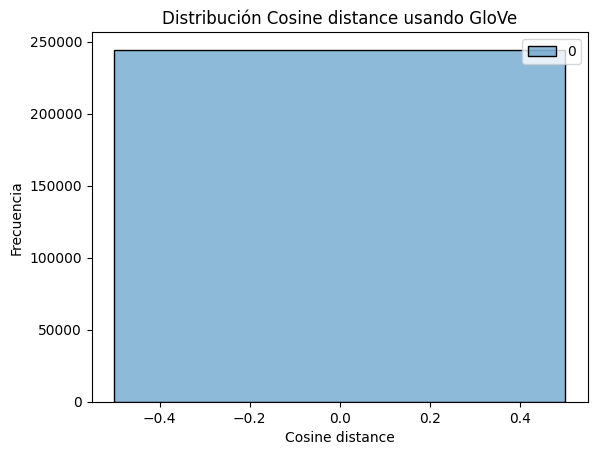

In [ ]:
sns.histplot(normalizar(distance_37['distancia']))#, kde=True)
plt.title('Distribución Cosine distance usando GloVe')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
distance_37

index_df1  index_df2  \
0        1457739          0   
1        1457739          1   
2        1457739          2   
3        1457739          3   
4        1457739          4   
...          ...        ...   
244378   1442176       6063   
244379   1442176       6064   
244380   1442176       6067   
244381   1442176       6069   
244382   1442176       6071   

                                               settlement  \
0       fracc residencial las villas condominio real d...   
1       fracc residencial las villas condominio real d...   
2       fracc residencial las villas condominio real d...   
3       fracc residencial las villas condominio real d...   
4       fracc residencial las villas condominio real d...   
...                                                   ...   
244378  residencial plaza guadalupe dos a seccion cond...   
244379  residencial plaza guadalupe dos a seccion cond...   
244380  residencial plaza guadalupe dos a seccion cond...   
244381  residencial plaza guadalupe dos a seccion cond...   
244382  residencial plaza guadalupe dos a seccion cond...   

                           d_asenta  distancia  
0                guadalajara centro        1.0  
1                 vallarta poniente        1.0  
2                    arcos vallarta        1.0  
3                             arcos        1.0  
4                     obrera centro        1.0  
...                             ...        ...  
244378  los arreguines tio arreguin        1.0  
244379          santa maria del oro        1.0  
244380     villa morelos el carrizo        1.0  
244381                       zipoco        1.0  
244382         abasolo la otra casa        1.0  

[244383 rows x 5 columns]

In [ ]:
# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_37)

df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

         Asignación_d_asenta_original  distancia_minima  
rownames                                                 
1457739            Guadalajara Centro               1.0  
1241193            Guadalajara Centro               1.0  
1040098            Guadalajara Centro               1.0  
1497931            Guadalajara Centro               1.0  
1371246            Guadalajara Centro               1.0  
1512418            Guadalajara Centro               1.0  
1269461            Guadalajara Centro               1.0  
1022118            Guadalajara Centro               

In [ ]:
# metricas_resultados = []

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente
# metricas_resultados = []

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_37',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

In [ ]:
# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075
22  Asignación_d_asenta_original_23   0.358491  0.339623  0.345912  0.339623
23  Asignación_d_asenta_original_24   0.358491  0.339623  0.345912  0.339623
24  Asignación_d_asenta_original_25   0.377358  0.358491  0.364780  0.358491
25  Asignación_d_asenta_original_26   0.245283  0.207547  0.220126  0.207547
26  Asignación_d_asenta_original_27   0.641509  0.622642  0.628931  0.622642
27  Asignación_d_asenta_original_28   0.471698  0.433962  0.446541  0.433962
28  Asignación_d_asenta_original_29   0.396226  0.377358  0.383648  0.377358
29  Asignación_d_asenta_original_30   0.433962  0.415094  0.421384  0.415094
30  Asignación_d_asenta_original_31   0.415094  0.415094  0.415094  0.415094
31  Asignación_d_asenta_original_32   0.254717  0.245283  0.245283  0.245283
32  Asignación_d_asenta_original_33   0.000000  0.000000  0.000000  0.000000
33  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
34  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
35  Asignación_d_asenta_original_35   0.471698  0.415094  0.433962  0.415094
36  Asignación_d_asenta_original_36   0.207547  0.188679  0.194969  0.188679
37  Asignación_d_asenta_original_37   0.000000  0.000000  0.000000  0.000000

In [ ]:
SHF_train_homologadas.to_csv('SHF_train_homologadas+glove+traduccion.csv', index=False)
# SHF_train_homologadas.to_csv('SHF_train_homologadas_s.csv', index=False)

In [ ]:
traduction = []

for i,text in enumerate(SHF_train["settlement_split_sin_stopwords"]):
    translated_text = translate_text(text)
    traduction.append(translated_text)

In [ ]:
SHF_train.loc[:, 'traduccion_sin_stopwords']  = traduction

In [ ]:
# SEPOMEX['traduccion'] = SEPOMEX['d_asenta'].apply(translator.translate, src='es', dest='en')#.apply(getattr, args=('text',))
traduction = []

for i,text in enumerate(SEPOMEX_subset["d_asenta_split_sin_stopwords"]):
    translator = Translator()
    translated_text = translate_text(text)
    traduction.append(translated_text)

In [ ]:
SEPOMEX_subset.loc[:, 'traduccion_sin_stopwords']  = traduction

<ipython-input-217-e00e188b4657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset.loc[:, 'traduccion_sin_stopwords']  = traduction


In [ ]:
# Convertir nombres de colonias traducidos a vectores usando GloVe
SHF_train['settlement_traduccion_sin_stopwords_embedding'] = SHF_train['traduccion_sin_stopwords'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))
SEPOMEX_subset['d_asenta_traduccion_sin_stopwords_embedding'] = SEPOMEX_subset['traduccion_sin_stopwords'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))



<ipython-input-218-3a19970f8ed1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['d_asenta_traduccion_sin_stopwords_embedding'] = SEPOMEX_subset['traduccion_sin_stopwords'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))


In [ ]:
# Ejemplo de uso
# Asegúrate de que df1[col1] y df2[col2] tienen las columnas de embeddings ya calculadas y en formato de lista de vectores

# Calcula la matriz de distancias del coseno
distance_38 = calcular_matriz_distancias(SHF_train, 'settlement_traduccion_sin_stopwords_embedding', 'settlement', SEPOMEX_subset, 'd_asenta_traduccion_sin_stopwords_embedding', 'd_asenta', cosine_similarity)


In [ ]:
distance_38

index_df1  index_df2  \
0        1457739          0   
1        1457739          1   
2        1457739          2   
3        1457739          3   
4        1457739          4   
...          ...        ...   
244378   1442176       6063   
244379   1442176       6064   
244380   1442176       6067   
244381   1442176       6069   
244382   1442176       6071   

                                               settlement  \
0       fracc residencial las villas condominio real d...   
1       fracc residencial las villas condominio real d...   
2       fracc residencial las villas condominio real d...   
3       fracc residencial las villas condominio real d...   
4       fracc residencial las villas condominio real d...   
...                                                   ...   
244378  residencial plaza guadalupe dos a seccion cond...   
244379  residencial plaza guadalupe dos a seccion cond...   
244380  residencial plaza guadalupe dos a seccion cond...   
244381  residencial plaza guadalupe dos a seccion cond...   
244382  residencial plaza guadalupe dos a seccion cond...   

                           d_asenta  distancia  
0                guadalajara centro        1.0  
1                 vallarta poniente        1.0  
2                    arcos vallarta        1.0  
3                             arcos        1.0  
4                     obrera centro        1.0  
...                             ...        ...  
244378  los arreguines tio arreguin        1.0  
244379          santa maria del oro        1.0  
244380     villa morelos el carrizo        1.0  
244381                       zipoco        1.0  
244382         abasolo la otra casa        1.0  

[244383 rows x 5 columns]

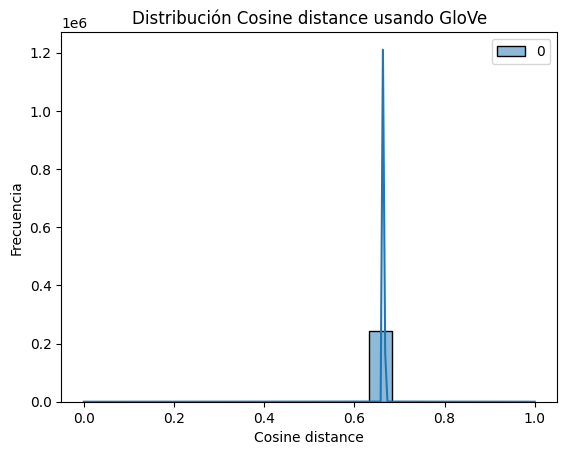

In [ ]:
sns.histplot(normalizar(distance_38['distancia']), kde=True)
plt.title('Distribución Cosine distance usando GloVe')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_38)

df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

         Asignación_d_asenta_original  distancia_minima  
rownames                                                 
1457739            Guadalajara Centro      1.000000e+00  
1241193             Áurea Residencial      0.000000e+00  
1040098            Guadalajara Centro      1.000000e+00  
1497931            Guadalajara Centro      1.000000e+00  
1371246            Guadalajara Centro      1.000000e+00  
1512418            Guadalajara Centro      1.000000e+00  
1269461            Guadalajara Centro      1.000000e+00  
1022118            Guadalajara Centro      1.000000e

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente
# metricas_resultados = []

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_38',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

In [ ]:
# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075
22  Asignación_d_asenta_original_23   0.358491  0.339623  0.345912  0.339623
23  Asignación_d_asenta_original_24   0.358491  0.339623  0.345912  0.339623
24  Asignación_d_asenta_original_25   0.377358  0.358491  0.364780  0.358491
25  Asignación_d_asenta_original_26   0.245283  0.207547  0.220126  0.207547
26  Asignación_d_asenta_original_27   0.641509  0.622642  0.628931  0.622642
27  Asignación_d_asenta_original_28   0.471698  0.433962  0.446541  0.433962
28  Asignación_d_asenta_original_29   0.396226  0.377358  0.383648  0.377358
29  Asignación_d_asenta_original_30   0.433962  0.415094  0.421384  0.415094
30  Asignación_d_asenta_original_31   0.415094  0.415094  0.415094  0.415094
31  Asignación_d_asenta_original_32   0.254717  0.245283  0.245283  0.245283
32  Asignación_d_asenta_original_33   0.000000  0.000000  0.000000  0.000000
33  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
34  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
35  Asignación_d_asenta_original_35   0.471698  0.415094  0.433962  0.415094
36  Asignación_d_asenta_original_36   0.207547  0.188679  0.194969  0.188679
37  Asignación_d_asenta_original_37   0.000000  0.000000  0.000000  0.000000
38  Asignación_d_asenta_original_38   0.056604  0.056604  0.056604  0.056604

In [ ]:
SHF_train_homologadas.to_csv('SHF_train_homologadas+glove+traduccion_sin_stopwords.csv', index=False)
# SHF_train_homologadas.to_csv('SHF_train_homologadas_s.csv', index=False)

In [ ]:
traduction = []

for i,text in enumerate(SHF_train["settlement_split_sin_stopwords_stemmed"]):
    translated_text = translate_text(text)
    traduction.append(translated_text)

In [ ]:
SHF_train.loc[:, 'traduccion_sin_stopwords_stemmed']  = traduction

In [ ]:
# SEPOMEX['traduccion'] = SEPOMEX['d_asenta'].apply(translator.translate, src='es', dest='en')#.apply(getattr, args=('text',))
traduction = []

for i,text in enumerate(SEPOMEX_subset["d_asenta_split_sin_stopwords_stemmed"]):
    translator = Translator()
    translated_text = translate_text(text)
    traduction.append(translated_text)

In [ ]:
SEPOMEX_subset.loc[:, 'traduccion_stemmed']  = traduction

<ipython-input-229-1a5afd25f99c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset.loc[:, 'traduccion_stemmed']  = traduction


In [ ]:
# Convertir nombres de colonias traducidos a vectores usando GloVe
SHF_train['settlement_traduccion_stemmed_embedding'] = SHF_train['traduccion_sin_stopwords_stemmed'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))
SEPOMEX_subset['d_asenta_traduccion_stemmed_embedding'] = SEPOMEX_subset['traduccion_stemmed'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))



<ipython-input-230-26fe2373fbaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['d_asenta_traduccion_stemmed_embedding'] = SEPOMEX_subset['traduccion_stemmed'].apply(lambda x: obtener_embedding_glove(x, glove_vectors))


In [ ]:
# Ejemplo de uso
# Asegúrate de que df1[col1] y df2[col2] tienen las columnas de embeddings ya calculadas y en formato de lista de vectores

# Calcula la matriz de distancias del coseno
distance_39 = calcular_matriz_distancias(SHF_train, 'settlement_traduccion_stemmed_embedding', 'settlement', SEPOMEX_subset, 'd_asenta_traduccion_stemmed_embedding', 'd_asenta', cosine_similarity)


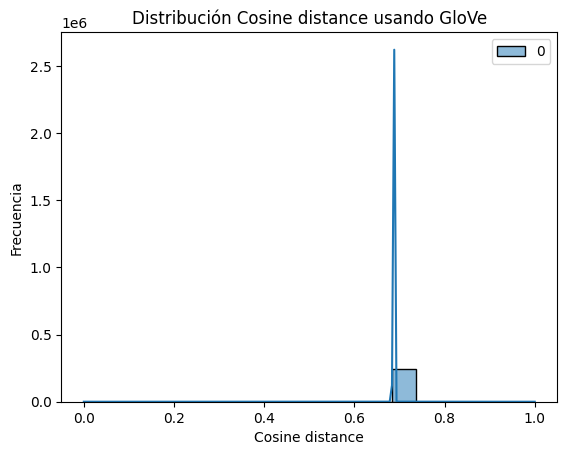

In [ ]:
sns.histplot(normalizar(distance_39['distancia']), kde=True)
plt.title('Distribución Cosine distance usando GloVe')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_39)

df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

         Asignación_d_asenta_original  distancia_minima  
rownames                                                 
1457739            Guadalajara Centro               1.0  
1241193             Áurea Residencial               0.0  
1040098            Guadalajara Centro               1.0  
1497931            Guadalajara Centro               1.0  
1371246            Guadalajara Centro               1.0  
1512418            Guadalajara Centro               1.0  
1269461            Guadalajara Centro               1.0  
1022118            Guadalajara Centro               

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente
# metricas_resultados = []

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_39',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

In [ ]:
# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0    Asignación_d_asenta_original_1   0.421384  0.396226  0.399371  0.396226
1    Asignación_d_asenta_original_2   0.421384  0.396226  0.399371  0.396226
2    Asignación_d_asenta_original_3   0.433962  0.396226  0.408805  0.396226
3    Asignación_d_asenta_original_4   0.230189  0.207547  0.207547  0.207547
4    Asignación_d_asenta_original_5   0.603774  0.584906  0.591195  0.584906
5    Asignación_d_asenta_original_6   0.455975  0.452830  0.445642  0.452830
6    Asignación_d_asenta_original_7   0.471698  0.490566  0.477987  0.490566
7    Asignación_d_asenta_original_8   0.490566  0.471698  0.477987  0.471698
8    Asignación_d_asenta_original_9   0.528302  0.547170  0.534591  0.547170
9   Asignación_d_asenta_original_10   0.150943  0.150943  0.150943  0.150943
10  Asignación_d_asenta_original_11   0.811321  0.773585  0.786164  0.773585
11  Asignación_d_asenta_original_12   0.396226  0.377358  0.383648  0.377358
12  Asignación_d_asenta_original_13   0.396226  0.377358  0.383648  0.377358
13  Asignación_d_asenta_original_14   0.396226  0.377358  0.383648  0.377358
14  Asignación_d_asenta_original_15   0.264151  0.226415  0.238994  0.226415
15  Asignación_d_asenta_original_16   0.660377  0.641509  0.647799  0.641509
16  Asignación_d_asenta_original_17   0.490566  0.471698  0.477987  0.471698
17  Asignación_d_asenta_original_18   0.396226  0.377358  0.383648  0.377358
18  Asignación_d_asenta_original_19   0.471698  0.471698  0.471698  0.471698
19  Asignación_d_asenta_original_20   0.462264  0.471698  0.465409  0.471698
20  Asignación_d_asenta_original_21   0.283019  0.264151  0.270440  0.264151
21  Asignación_d_asenta_original_22   0.132075  0.132075  0.132075  0.132075
22  Asignación_d_asenta_original_23   0.358491  0.339623  0.345912  0.339623
23  Asignación_d_asenta_original_24   0.358491  0.339623  0.345912  0.339623
24  Asignación_d_asenta_original_25   0.377358  0.358491  0.364780  0.358491
25  Asignación_d_asenta_original_26   0.245283  0.207547  0.220126  0.207547
26  Asignación_d_asenta_original_27   0.641509  0.622642  0.628931  0.622642
27  Asignación_d_asenta_original_28   0.471698  0.433962  0.446541  0.433962
28  Asignación_d_asenta_original_29   0.396226  0.377358  0.383648  0.377358
29  Asignación_d_asenta_original_30   0.433962  0.415094  0.421384  0.415094
30  Asignación_d_asenta_original_31   0.415094  0.415094  0.415094  0.415094
31  Asignación_d_asenta_original_32   0.254717  0.245283  0.245283  0.245283
32  Asignación_d_asenta_original_33   0.000000  0.000000  0.000000  0.000000
33  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
34  Asignación_d_asenta_original_34   0.000000  0.000000  0.000000  0.000000
35  Asignación_d_asenta_original_35   0.471698  0.415094  0.433962  0.415094
36  Asignación_d_asenta_original_36   0.207547  0.188679  0.194969  0.188679
37  Asignación_d_asenta_original_37   0.000000  0.000000  0.000000  0.000000
38  Asignación_d_asenta_original_38   0.056604  0.056604  0.056604  0.056604
39  Asignación_d_asenta_original_39   0.056604  0.056604  0.056604  0.056604

In [ ]:
SHF_train_homologadas.to_csv('SHF_train_homologadas+glove+traduccion_stemmed.csv', index=False)
# SHF_train_homologadas.to_csv('SHF_train_homologadas_s.csv', index=False)

Se observa que las métricas de cosine distance usando embedding GloVe no mejora respecto a cosine usando TF-IDF, GloVe está en inglés, haciendo traducción sobre los datos directos disminuye la precision-score de 48.14% a 25.93%.

Cómo ya vimos antes hacerlo sobre preprocesamiento de los nombre disminuirá el accuracy y todas las métricas.

De esta tabla se concluye que la mejor con colonias sin preprocesar sería cosine distance usando TF-IDF para embeddings.

### Fast Text Español

Uso en Español

Uno de los recursos disponibles para vectores GloVe en español es SBWCE (Spanish Billion Words Corpus and Embeddings).

Es un embedding en Español


In [ ]:
! pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227137 sha256=0aff2a27d1d1f40ea3b4a28620f98033ec4f0d9df2002bc46b29fc32e2a03465
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext
import fasttext.util

In [ ]:
# Cargar los vectores de FastText preentrenados en español
fasttext.util.download_model('es', if_exists='ignore')
ft = fasttext.load_model('cc.es.300.bin')

In [ ]:
# Función para obtener el embedding de una palabra o frase
def obtener_embedding_fast(texto):
    return ft.get_sentence_vector(texto)

# Agregar los embeddings a los DataFrames
SHF_train['embedding_fast'] = SHF_train['settlement'].apply(obtener_embedding_fast)
SEPOMEX_subset['embedding_fast'] = SEPOMEX_subset['d_asenta'].apply(obtener_embedding_fast)

# Calcular la matriz de distancias
distance_40 = calcular_matriz_distancias(SHF_train, 'embedding_fast', 'settlement', SEPOMEX_subset, 'embedding_fast', 'd_asenta', cosine_similarity)



<ipython-input-105-75c7d6215fbd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['embedding_fast'] = SEPOMEX_subset['d_asenta'].apply(obtener_embedding_fast)


In [ ]:
# Obtener las distancias mínimas
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', 'd_asenta_original', distance_40)


In [ ]:
df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                               Asignación_d_asenta_original  distancia_minima  
rownames                                                                       
1457739                              Residencial Las Villas      1.781393e-01  
1241193                                   Áurea Residencial      0.000000e+00  
1040098                                     Colonia del Sur      3.238891e-01  
1497931                              Valle de Tonantzin III      1.924902e-01  
1371246                                          Charapuato      5.211352e-01  
1512418       

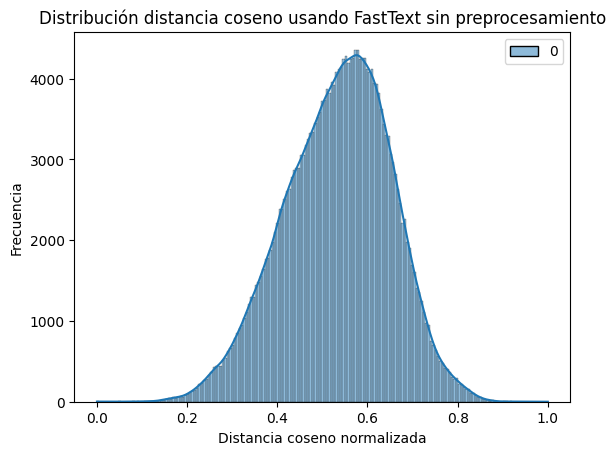

In [ ]:
sns.histplot(normalizar(distance_40['distancia']), kde=True)
plt.title('Distribución distancia coseno usando FastText sin preprocesamiento')
plt.xlabel('Distancia coseno normalizada')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# metricas_resultados = []

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente
# metricas_resultados = []

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_40',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

In [ ]:
# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0  Asignación_d_asenta_original_40   0.679245  0.622642  0.641509  0.622642

In [ ]:
# Función para obtener el embedding de una palabra o frase
def obtener_embedding_fast(texto):
    return ft.get_sentence_vector(texto)

# Agregar los embeddings a los DataFrames
SHF_train['embedding_fast_split_sin_stopwords'] = SHF_train['settlement_split_sin_stopwords'].apply(obtener_embedding_fast)
SEPOMEX_subset['embedding_fast_split_sin_stopwords'] = SEPOMEX_subset['d_asenta_split_sin_stopwords'].apply(obtener_embedding_fast)

# Calcular la matriz de distancias
distance_41 = calcular_matriz_distancias(SHF_train, 'embedding_fast_split_sin_stopwords', 'settlement', SEPOMEX_subset, 'embedding_fast_split_sin_stopwords', 'd_asenta', cosine_similarity)



<ipython-input-122-b1356f482fd4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['embedding_fast_split_sin_stopwords'] = SEPOMEX_subset['d_asenta_split_sin_stopwords'].apply(obtener_embedding_fast)


In [ ]:
# Obtener las distancias mínimas
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', 'd_asenta_original', distance_41)


In [ ]:
df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                     Asignación_d_asenta_original  distancia_minima  
rownames                                                             
1457739                         Real del Camichin      2.332132e-01  
1241193                         Áurea Residencial      4.172325e-07  
1040098                                La Colonia      2.909083e-01  
1497931                             Valle del Sol      2.082297e-01  
1371246                      Senderos de Santiago      4.444851e-01  
1512418                        Parque de las Aves      2.409992e-01  
1269461       

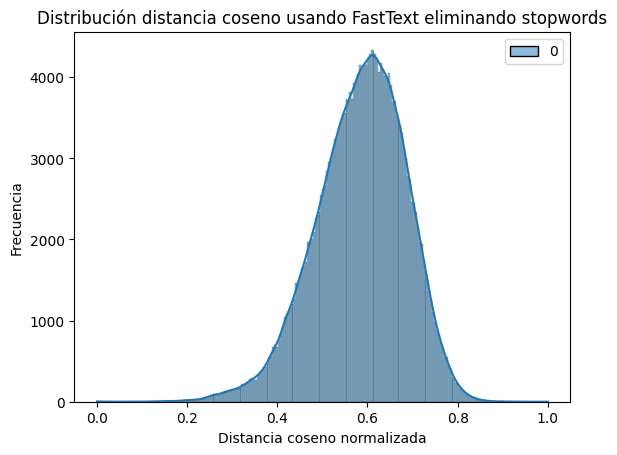

In [ ]:
sns.histplot(normalizar(distance_41['distancia']), kde=True)
plt.title('Distribución distancia coseno usando FastText eliminando stopwords')
plt.xlabel('Distancia coseno normalizada')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente
# metricas_resultados = []

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_41',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

In [ ]:
# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0  Asignación_d_asenta_original_40   0.679245  0.622642  0.641509  0.622642
1  Asignación_d_asenta_original_41   0.735849  0.679245  0.698113  0.679245

In [ ]:
# Función para obtener el embedding de una palabra o frase
def obtener_embedding_fast(texto):
    return ft.get_sentence_vector(texto)

# Agregar los embeddings a los DataFrames
SHF_train['embedding_fast_stemmed'] = SHF_train['settlement_split_sin_stopwords_stemmed'].apply(obtener_embedding_fast)
SEPOMEX_subset['embedding_fast_stemmed'] = SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed'].apply(obtener_embedding_fast)

# Calcular la matriz de distancias
distance_42 = calcular_matriz_distancias(SHF_train, 'embedding_fast_stemmed', 'settlement', SEPOMEX_subset, 'embedding_fast_stemmed', 'd_asenta', cosine_similarity)



<ipython-input-128-c1c971f0e43e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEPOMEX_subset['embedding_fast_stemmed'] = SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed'].apply(obtener_embedding_fast)


In [ ]:
# Obtener las distancias mínimas
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX, 'd_asenta', 'd_asenta_original', distance_42)


In [ ]:
df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                          Asignación_d_asenta_original  distancia_minima  
rownames                                                                  
1457739                                 Villa del Real      2.093785e-01  
1241193                              Áurea Residencial      0.000000e+00  
1040098                                     La Colonia      3.186831e-01  
1497931                                  Valle del Sol      2.052049e-01  
1371246                                  Los Santiagos      3.332791e-01  
1512418                             Parque de las

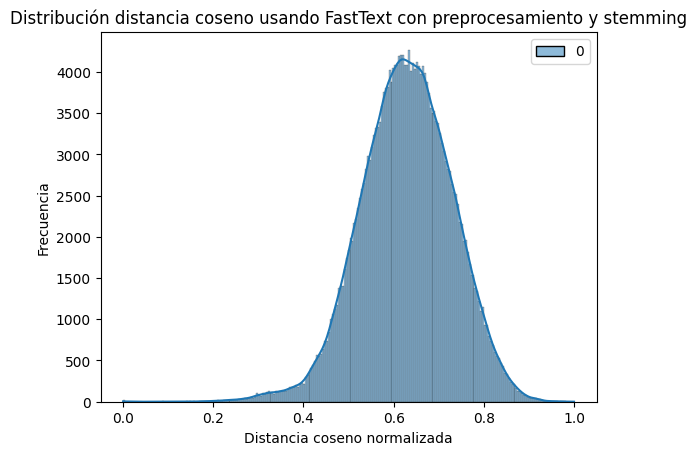

In [ ]:
sns.histplot(normalizar(distance_42['distancia']), kde=True)
plt.title('Distribución distancia coseno usando FastText con preprocesamiento y stemming')
plt.xlabel('Distancia coseno normalizada')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente
# metricas_resultados = []

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
        'Asignación': 'Asignación_d_asenta_original_42',
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy
    })

In [ ]:
# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

Asignación  Precision    Recall  F1-score  Accuracy
0  Asignación_d_asenta_original_40   0.679245  0.622642  0.641509  0.622642
1  Asignación_d_asenta_original_41   0.735849  0.679245  0.698113  0.679245
2  Asignación_d_asenta_original_42   0.641509  0.603774  0.616352  0.603774

### SBWCE

In [233]:
def cosine_similarity(vec1, vec2):
    vector = np.array([vec1, vec2])
    return cosine_distances(vector)[0,1]

In [3]:
# Leer el archivo de embeddings comprimido
df_embeddings = pd.read_csv('SBW-vectors-300-min5.txt.bz2', sep=" ", header=None, skiprows=1, index_col=0, quoting=3)

# Convertir a un diccionario para facilitar la carga en gensim
embeddings_index = {word: values for word, values in df_embeddings.T.items()}

# Guardar en un formato que gensim pueda leer
with open('SBW-vectors-300-min5.txt', 'w') as f:
    f.write(f"{len(embeddings_index)} {len(next(iter(embeddings_index.values())))}\n")
    for word, values in embeddings_index.items():
        f.write(f"{word} {' '.join(map(str, values))}\n")


In [5]:
# Cargar los embeddings preentrenados de SBWCE
sbwce_model = gensim.models.KeyedVectors.load_word2vec_format('SBW-vectors-300-min5.txt', binary=False)

# Función para obtener el embedding de una palabra o frase utilizando SBWCE
def obtener_embedding_sbwce(texto):
    palabras = texto.split()
    embeddings = [sbwce_model[word] for word in palabras if word in sbwce_model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(sbwce_model.vector_size)


In [ ]:
# Agregar los embeddings a los DataFrames utilizando SBWCE
SHF_train['embedding_sbwce'] = SHF_train['settlement'].apply(obtener_embedding_sbwce)
SEPOMEX_subset['embedding_sbwce'] = SEPOMEX_subset['d_asenta'].apply(obtener_embedding_sbwce)

In [ ]:

# # Función para calcular la matriz de distancias
# def calcular_matriz_distancias(df1, embedding_col1, id_col1, df2, embedding_col2, id_col2, metric):
#     embeddings1 = np.vstack(df1[embedding_col1])
#     embeddings2 = np.vstack(df2[embedding_col2])
#     distances = metric(embeddings1, embeddings2)
#     return pd.DataFrame(distances, index=df1[id_col1], columns=df2[id_col2])

# Calcular la matriz de distancias usando SBWCE
distance_43 = calcular_matriz_distancias(SHF_train, 'embedding_sbwce', 'settlement', SEPOMEX_subset, 'embedding_sbwce', 'd_asenta', cosine_similarity)


In [ ]:

# Obtener las distancias mínimas
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_43)

# Visualización de la distribución de distancias
sns.histplot(normalizar(distance_43['distancia']), kde=True)
plt.title('Distribución Cosine distance usando SBWCE')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()



In [ ]:
metricas_resultados = []
y_true = SHF_train_ytrue['y_true']

In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
    'Asignación': 'Asignación_d_asenta_original_43',
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Accuracy': accuracy
})

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

In [ ]:
# Agregar los embeddings a los DataFrames utilizando SBWCE
SHF_train['embedding_sbwce_sin_stopwords'] = SHF_train['settlement_split_sin_stopwords'].apply(obtener_embedding_sbwce)
SEPOMEX_subset['embedding_sbwce_sin_stopwords'] = SEPOMEX_subset['d_asenta_split_sin_stopwords'].apply(obtener_embedding_sbwce)

In [ ]:

# # Función para calcular la matriz de distancias
# def calcular_matriz_distancias(df1, embedding_col1, id_col1, df2, embedding_col2, id_col2, metric):
#     embeddings1 = np.vstack(df1[embedding_col1])
#     embeddings2 = np.vstack(df2[embedding_col2])
#     distances = metric(embeddings1, embeddings2)
#     return pd.DataFrame(distances, index=df1[id_col1], columns=df2[id_col2])

# Calcular la matriz de distancias usando SBWCE
distance_44 = calcular_matriz_distancias(SHF_train, 'embedding_sbwce_sin_stopwords', 'settlement', SEPOMEX_subset, 'embedding_sbwce_sin_stopwords', 'd_asenta', cosine_similarity)


In [ ]:

# Obtener las distancias mínimas
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_44)

# Visualización de la distribución de distancias
sns.histplot(normalizar(distance_44['distancia']), kde=True)
plt.title('Distribución Cosine distance usando SBWCE')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()



In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
    'Asignación': 'Asignación_d_asenta_original_44',
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Accuracy': accuracy
})

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

In [ ]:
# Agregar los embeddings a los DataFrames utilizando SBWCE
SHF_train['embedding_sbwce_stemmed'] = SHF_train['settlement_split_sin_stopwords_stemmed'].apply(obtener_embedding_sbwce)
SEPOMEX_subset['embedding_sbwce_stemmed'] = SEPOMEX_subset['d_asenta_split_sin_stopwords_stemmed'].apply(obtener_embedding_sbwce)

In [ ]:

# # Función para calcular la matriz de distancias
# def calcular_matriz_distancias(df1, embedding_col1, id_col1, df2, embedding_col2, id_col2, metric):
#     embeddings1 = np.vstack(df1[embedding_col1])
#     embeddings2 = np.vstack(df2[embedding_col2])
#     distances = metric(embeddings1, embeddings2)
#     return pd.DataFrame(distances, index=df1[id_col1], columns=df2[id_col2])

# Calcular la matriz de distancias usando SBWCE
distance_45 = calcular_matriz_distancias(SHF_train, 'embedding_sbwce_stemmed', 'settlement', SEPOMEX_subset, 'embedding_sbwce_stemmed', 'd_asenta', cosine_similarity)


In [ ]:

# Obtener las distancias mínimas
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_45)

# Visualización de la distribución de distancias
sns.histplot(normalizar(distance_45['distancia']), kde=True)
plt.title('Distribución Cosine distance usando SBWCE')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()



In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
    'Asignación': 'Asignación_d_asenta_original_45',
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Accuracy': accuracy
})

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

In [ ]:

# # Función para calcular la matriz de distancias
# def calcular_matriz_distancias(df1, embedding_col1, id_col1, df2, embedding_col2, id_col2, metric):
#     embeddings1 = np.vstack(df1[embedding_col1])
#     embeddings2 = np.vstack(df2[embedding_col2])
#     distances = metric(embeddings1, embeddings2)
#     return pd.DataFrame(distances, index=df1[id_col1], columns=df2[id_col2])

# Calcular la matriz de distancias usando SBWCE
distance_45 = calcular_matriz_distancias(SHF_train, 'embedding_sbwce', 'settlement', SEPOMEX_subset, 'embedding_sbwce', 'd_asenta', cosine_similarity)


In [ ]:

# Obtener las distancias mínimas
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_45)

# Visualización de la distribución de distancias
sns.histplot(normalizar(distance_45['distancia']), kde=True)
plt.title('Distribución Cosine distance usando SBWCE')
plt.xlabel('Cosine distance')
plt.ylabel('Frecuencia')
plt.show()



In [ ]:
# Obtener las predicciones y los verdaderos valores
y_pred = df1_result['Asignación_d_asenta_original']

# y_true ya se asignó o cargó previamente

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Ajustar el LabelEncoder en las etiquetas combinadas de y_true y y_pred
all_labels = np.concatenate((y_true, y_pred))
label_encoder.fit(all_labels)

# Transformar y_true y y_pred en etiquetas numéricas
y_true_encoded = label_encoder.transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Calcular precisión, recall, F1-score y exactitud
precision = precision_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
recall = recall_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
f1 = f1_score(y_true_encoded, y_pred_encoded, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

# Almacenar los resultados en la lista previa de métricas
metricas_resultados.append({
    'Asignación': 'Asignación_d_asenta_original_45',
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Accuracy': accuracy
})

# Convertir la lista de resultados a un DataFrame
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar los resultados
metricas_df

# Distribuciones de las mejores metricas para seleccionar umbral

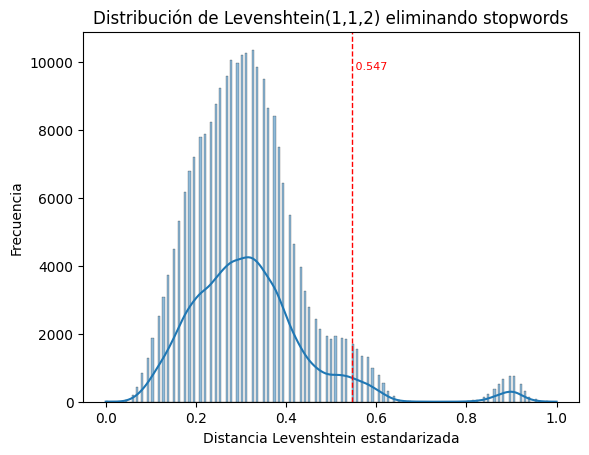

In [205]:
# KDE de Levenstein con mayor peso a sustitución y con preprocesamiento sin stopwords
sns.histplot(normalizar(distance_14['distancia']), kde=True)
plt.title('Distribución de Levenshtein(1,1,2) eliminando stopwords')
plt.xlabel('Distancia Levenshtein estandarizada')
plt.ylabel('Frecuencia')


# Agregar línea vertical en el percentil 95
percentile_95 = np.percentile(normalizar(distance_14['distancia']), 95)
plt.axvline(percentile_95, color='r', linestyle='dashed', linewidth=1)
plt.text(percentile_95, plt.ylim()[1] * 0.9, f' {percentile_95:.3f}', color='red', fontsize=8)

# Omitir la leyenda
plt.legend().set_visible(False)


plt.show()

In [206]:
percentile_95

0.5465116279069767

In [207]:
# Ejemplo de uso Levenstein 1

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement_split_sin_stopwords', SEPOMEX_subset, 'd_asenta_split_sin_stopwords', 'd_asenta_original', distance_14)

df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                     Asignación_d_asenta_original  distancia_minima  
rownames                                                             
1457739                         Real del Camichin                13  
1241193                         Áurea Residencial                 0  
1040098                           Colonia del Sur                14  
1497931                        Ignacio L Vallarta                26  
1371246                      Senderos de Santiago                 3  
1512418                        Parque de las Aves                18  
1269461       

In [208]:
1-normalizar(df1_result['distancia_minima'])

array([[0.8       ],
       [1.        ],
       [0.78461538],
       [0.6       ],
       [0.95384615],
       [0.72307692],
       [1.        ],
       [0.83076923],
       [0.78461538],
       [0.83076923],
       [0.72307692],
       [0.69230769],
       [1.        ],
       [0.76923077],
       [0.8       ],
       [0.92307692],
       [0.72307692],
       [0.        ],
       [1.        ],
       [0.81538462],
       [0.55384615],
       [0.67692308],
       [0.75384615],
       [0.87692308],
       [0.90769231],
       [1.        ],
       [0.76923077],
       [0.76923077],
       [0.69230769],
       [0.92307692],
       [0.67692308],
       [1.        ],
       [1.        ],
       [0.75384615],
       [0.87692308],
       [0.55384615],
       [0.92307692],
       [1.        ],
       [0.81538462],
       [0.78461538],
       [0.83076923],
       [0.92307692],
       [0.87692308],
       [0.53846154],
       [0.78461538],
       [0.41538462],
       [1.        ],
       [0.723

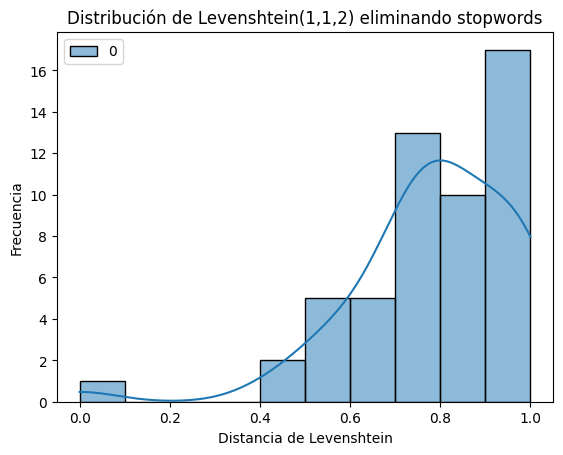

In [209]:
# KDE de Levenstein con mayor peso a sustitución y con preprocesamiento sin stopwords
sns.histplot(1-normalizar(df1_result['distancia_minima']), kde=True)
plt.title('Distribución de Levenshtein(1,1,2) eliminando stopwords')
plt.xlabel('Distancia de Levenshtein')
plt.ylabel('Frecuencia')
plt.show()

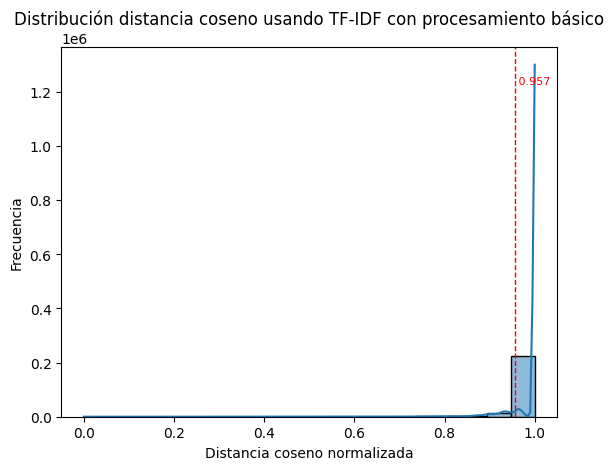

In [210]:
# KDE de Levenstein con mayor peso a sustitución y con preprocesamiento sin stopwords
sns.histplot(normalizar(distance_31['distancia']), kde=True)
plt.title('Distribución distancia coseno usando TF-IDF con procesamiento básico')
plt.xlabel('Distancia coseno normalizada')
plt.ylabel('Frecuencia')


# Agregar línea vertical en el percentil 95
percentile_95 = np.percentile(normalizar(distance_31['distancia']), 95)
plt.axvline(percentile_95, color='r', linestyle='dashed', linewidth=1)
plt.text(percentile_95, plt.ylim()[1] * 0.9, f' {percentile_95:.3f}', color='red', fontsize=8)


# Omitir la leyenda
plt.legend().set_visible(False)


plt.show()

In [211]:
percentile_95

0.9567125654461827

In [225]:
# Asignaciones TFIDF

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_31)

df3 = df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]
df3

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                               Asignación_d_asenta_original  distancia_minima  
rownames                                                                       
1457739                                   Real del Camichin          0.469710  
1241193                                   Áurea Residencial          0.000000  
1040098                                            Libertad          0.383112  
1497931                                       Valle del Sol          0.564013  
1371246                                  Guadalajara Centro          1.000000  
1512418       

In [226]:
1-normalizar(df3['distancia_minima'])

array([[0.53029022],
       [1.        ],
       [0.6168884 ],
       [0.43598721],
       [0.        ],
       [0.67180869],
       [0.96332764],
       [0.69015024],
       [0.61511577],
       [0.34078753],
       [0.55687573],
       [0.55839842],
       [0.76765274],
       [0.59424619],
       [0.50583048],
       [0.39406675],
       [0.63550054],
       [0.41595743],
       [1.        ],
       [0.59907819],
       [0.58337021],
       [0.53199933],
       [0.74336741],
       [0.51328956],
       [0.69727224],
       [1.        ],
       [0.70317121],
       [0.5545686 ],
       [0.63819286],
       [0.83098716],
       [0.32128854],
       [1.        ],
       [1.        ],
       [0.5664892 ],
       [0.65776192],
       [0.76134041],
       [0.82996037],
       [1.        ],
       [0.87957715],
       [0.58637976],
       [0.59027595],
       [0.90760182],
       [0.78666035],
       [0.37422674],
       [0.75765446],
       [0.75305203],
       [1.        ],
       [0.640

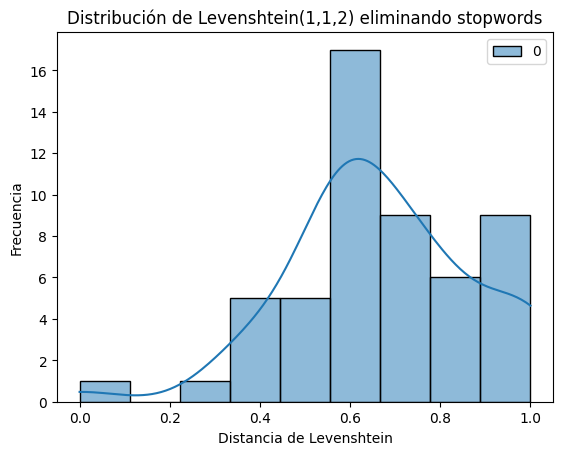

In [227]:
# KDE de Levenstein con mayor peso a sustitución y con preprocesamiento sin stopwords
sns.histplot(1-normalizar(df3['distancia_minima']), kde=True)
plt.title('Distribución de Levenshtein(1,1,2) eliminando stopwords')
plt.xlabel('Distancia de Levenshtein')
plt.ylabel('Frecuencia')
plt.show()

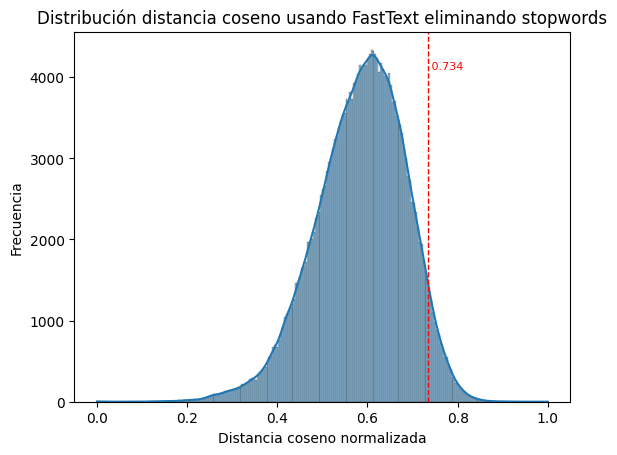

In [216]:
# KDE
sns.histplot(normalizar(distance_41['distancia']), kde=True)
plt.title('Distribución distancia coseno usando FastText eliminando stopwords')
plt.xlabel('Distancia coseno normalizada')
plt.ylabel('Frecuencia')


# Agregar línea vertical en el percentil 95
percentile_95 = np.percentile(normalizar(distance_41['distancia']), 95)
plt.axvline(percentile_95, color='r', linestyle='dashed', linewidth=1)
plt.text(percentile_95, plt.ylim()[1] * 0.9, f' {percentile_95:.3f}', color='red', fontsize=8)


# Omitir la leyenda
plt.legend().set_visible(False)


plt.show()

In [217]:
percentile_95

0.7337731003761291

In [229]:
# Ejemplo de uso Levenstein 1

# Añadimos una columna "settlement" y "d_asenta" a los DataFrames originales
df1_result, df2_result = obtener_top1_distancias(SHF_train, 'settlement', SEPOMEX_subset, 'd_asenta', 'd_asenta_original', distance_41)

df4 = df1_result[['settlement_original','Asignación_d_asenta_original', 'distancia_minima']]
df4

settlement_original  \
rownames                                                      
1457739   FRACC RESIDENCIAL LAS VILLAS CONDOMINIO REAL D...   
1241193                                   AUREA RESIDENCIAL   
1040098                             Colonia Sector Libertad   
1497931   FRACCIONAMIENTO VALLE DE L SOL ETAPA 10 CONDOM...   
1371246                                  SENDEROSDESANTIAGO   
1512418                ACCION UBANISTICA PARQUE DE LAS AVES   
1269461                                   LOMAS SAN AGUSTIN   
1022118                                COORDENADA LAFAYETTE   
1336099         RESIDENCIAL SAN PEDRO COLONIA RANCHO BLANCO   
1306791                      FRESNOS II ETAPA 5 SUB ETAPA E   
1486871   VALLE DE LOS MOLINOS II ETAPA 3 CONDOMINIO CUA...   
1459233                UNIDAD HABITACIONAL ARCOS DE ZAPOPAN   
1390524                   FRACCIONAMIENTO HACIENDA DEL REAL   
1266710               Lomas de San Agustin IV Segunda Etapa   
1225849                        CHULAVISTA 12º DOCEAVA ETAPA   
1438208                     CONDOMINIO RINCONADA DEL HIPICO   
1347275   DESARROLLO GEOVILLAS LOS OLIVOS CONDOMINIO BREZOS   
1463496   Colonia Desarrollo Habitacional y Unifamiliar ...   
1042534             SAN MIGUEL DE HUENTITAN EL ALTO 2A SECC   
1228327                FRACC. HACIENDA SANTA FE SEXTA ETAPA   
1364127   PARQUES SAN MARTIN DE LAS FLORES ETAPA VI Y O ...   
1383606   MIRADOR DE LOS CONEJOS COLONIA SAN JOSE CONDOM...   
1282686               DESARROLLO GEOVILLAS LA ARBOLADA PLUS   
1520644    Fraccionamiento El Campestre Condominio Mascardi   
1035083                                  FRACC. VERDE VALLE   
1038596                                           LA HUERTA   
1036838                   ITALIA PROVIDENCIA SECTOR HIDALGO   
1233516   VALLE DE LAS FLORES CONDOMINIO VALLE DE LAS AZ...   
1338965   "EX-EJIDO, SAN MARTIN DE LAS FLORES, LOMAS DEL...   
1525252         Residencial Del Bosque Condominio El Bosque   
1500860   Fraccionamiento Acción Urbanística Al Viento R...   
1347724                                            LA BELLA   
1363232                                           TATEPOSCO   
1254326   Fraccionamiento  Valle de los Encinos  III  Et...   
1262482                                    LAS TROJES PAQ 1   
1044975   FRACCIONAMIENTO VILLAS DEL NILO, CONDOMINIO MA...   
1286323                             Geovillas La Arbolada C   
1375255                                  PASEO DE LA CAÑADA   
1226022                   RANCHO LOS OCAMPO COND LOS OCAMPO   
1224343                      CHULAVISTA DIECISIETEAVA ETAPA   
1034164           Fraccionamiento El Alamo  segunda seccion   
1038325          Rinconada Santa Rita Condominio Santa Rita   
1371428                                Colonia La Hortaliza   
1278798   FRACCIONAMIENTO HACIENDA SANTA FE XXXVIII TREI...   
1036720           PROVIDENCIA FRACCIONAMIENTO LOMAS COLOMOS   
1473666   "Fraccionamiento Valle Esmeralda Condominio Va...   
1456260                                          ZOTOGRANDE   
1500534                   Los Molinos V Cinco Primera Etapa   
1044935   VILLAS DEL NILO DEL SECTOR REFORMA CONDOMINIO ...   
1254676                        FRACCIONAMIENTO LOS ABEDULES   
1333511                                            SILOS II   
1333781   PASEO DE LOS AGAVES ETAPA 5 5B CONDOMINIO AMAT...   
1442176   Residencial Plaza Guadalupe 2a sección Condomi...   

                     Asignación_d_asenta_original  distancia_minima  
rownames                                                             
1457739                         Real del Camichin      2.332132e-01  
1241193                         Áurea Residencial      4.172325e-07  
1040098                                La Colonia      2.909083e-01  
1497931                             Valle del Sol      2.082297e-01  
1371246                      Senderos de Santiago      4.444851e-01  
1512418                        Parque de las Aves      2.409992e-01  
1269461       

In [231]:
normalizar(df4['distancia_minima'])

array([[5.2468163e-01],
       [9.3868721e-07],
       [6.5448385e-01],
       [4.6847397e-01],
       [1.0000000e+00],
       [5.4219860e-01],
       [0.0000000e+00],
       [6.4172089e-01],
       [3.9925680e-01],
       [3.3364442e-01],
       [5.0207913e-01],
       [6.1822838e-01],
       [1.3409817e-07],
       [3.5316911e-01],
       [8.1393862e-01],
       [3.7925175e-01],
       [3.5177758e-01],
       [6.9931489e-01],
       [9.3868721e-07],
       [4.8178241e-01],
       [4.0386185e-01],
       [4.5734236e-01],
       [5.3066766e-01],
       [4.4898790e-01],
       [2.5459543e-01],
       [1.3409817e-07],
       [5.0298321e-01],
       [9.3056083e-02],
       [4.4113874e-01],
       [0.0000000e+00],
       [7.9884076e-01],
       [0.0000000e+00],
       [1.3409817e-07],
       [4.5398775e-01],
       [7.7939790e-01],
       [1.8573938e-01],
       [3.2602391e-01],
       [1.3409817e-07],
       [2.0869605e-01],
       [4.9009624e-01],
       [4.2152527e-01],
       [6.216375

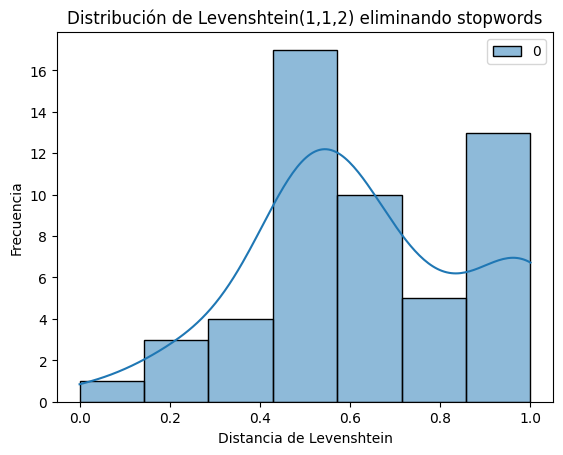

In [232]:
# KDE de Levenstein con mayor peso a sustitución y con preprocesamiento sin stopwords
sns.histplot(1-normalizar(df4['distancia_minima']), kde=True)
plt.title('Distribución de Levenshtein(1,1,2) eliminando stopwords')
plt.xlabel('Distancia de Levenshtein')
plt.ylabel('Frecuencia')
plt.show()

## Uso de CP y mapas

Considerando códigos postales alrededor, ejercicio mapeando los códigos postales en Tequila

In [ ]:
# importing geopy library
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# Ruta al archivo SHP o GeoJSON descargado
ruta_archivo = '140940001a.shp'  # Reemplaza con la ruta correcta #JALISCO a. Area geoestadística básica AGEB

# Cargar el archivo en un DataFrame geoespacial Área Geoestadística Básica
gdf_jalisco = gpd.read_file(ruta_archivo)

# Ruta al archivo SHP o GeoJSON descargado
ruta_archivo = '140940001fm.shp'  # Reemplaza con la ruta correcta #JALISCO a. Area geoestadística básica AGEB

# Cargar el archivo en un DataFrame geoespacial Frente de manzana
gdf_jalisco_fm = gpd.read_file(ruta_archivo) # Contiene CP


In [ ]:
gdf_jalisco_fm['CP'].unique()

In [ ]:
# Tabla con los nombres de las colonias
colonias_data = {
    'CVEGEO': gdf_jalisco['CVEGEO'],  # Agrega todos tus códigos CVEGEO
    'NOMBRE_COLONIA':['La Mojonera', 'El', 'San José \n de las Flores', 'Las Glorias',
                      '5', 'Miguel de La Madrid', 'Obrera', 'Josefa Ortíz de Domínguez',
                      'Ojo de Agua', 'La Mezcalera','Cofradía', 'Chulavista',
                      'Sauza y Centro', '14', 'Trapiche', 'Ex Hacienda de Abajo',
                      'El Guamúchil', 'Potrero de la Mula (Luis Donaldo Colosio)', 'Obrera 2', 'Texcalame',
                      'La Puerta de San Pedro (La Puerta de Enmedio)', 'La Villa', '23', '24', 'El Ranchito',
                      'La Estación e INFONAVIT','El Malvaste', 'IPROVIPE', 'La Escondida',
                      'Obrera 1', 'Santa Cruz de los Espinos'],  # Agrega todos los nombres de las colonias
}

colonias_df = pd.DataFrame(colonias_data)

# Realizar la fusión (merge) entre el GeoDataFrame y la tabla de colonias
gdf_merged = pd.merge(gdf_jalisco, colonias_df, on='CVEGEO', how='left')

In [ ]:
# Visualizar el mapa de Jalisco con nombres de colonias
fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.boundary.plot(ax=ax, linewidth=0.8)  # Dibujar los límites del GeoDataFrame
gdf_merged.apply(lambda x: ax.annotate(text=x['NOMBRE_COLONIA'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.boundary.plot(ax=ax, linewidth=0.8)  # Dibujar los límites del GeoDataFrame
gdf_merged.apply(lambda x: ax.annotate(text=x['IDENTIFICA'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)

plt.show()

In [ ]:
# Corta las columnas CVEGEO para contener solo los primeros 12 caracteres
gdf_jalisco_fm['CVEGEO'] = gdf_jalisco_fm['CVEGEO'].str[:12]
gdf_merged['CVEGEO'] = gdf_merged['CVEGEO'].str[:12]

In [ ]:
gdf_merged

In [ ]:
# Realiza la fusión basándote en la columna CVEGEO
gdf_merged_cp = pd.merge(gdf_merged, gdf_jalisco_fm[['CVEGEO', 'CP']], left_on=gdf_merged['CVEGEO'], right_on=gdf_jalisco_fm['CVEGEO'], how='left')

# Visualiza el resultado
print(gdf_merged_cp.head())

In [ ]:
gdf_merged_cp[['CVEGEO_x', 'CP']]

In [ ]:
# Visualizar el mapa de Jalisco

fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.boundary.plot(ax=ax, linewidth=0.8)  # Dibujar los límites del GeoDataFrame
gdf_merged_cp.apply(lambda x: ax.annotate(text=x['CP'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=7), axis=1)

plt.show()

In [ ]:
gdf_merged_cp

In [ ]:
# Suponiendo que 'codigo_postal' es el nombre de la columna que contiene el código postal
fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged_cp.plot(column='CP', cmap='summer', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

gdf_merged.boundary.plot(ax=ax, linewidth=0.8)  # Dibujar los límites del GeoDataFrame

# Anotar el identificador en el centro de cada polígono
gdf_merged.apply(lambda x: ax.annotate(text=x['NOMBRE_COLONIA'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8), axis=1)

# Añadir título y etiquetas
plt.title('Municipio Tequila Jalisco, segmentado por CP')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()